<주제>

"한 번은 우연, 두 번은 전략: 재방문율 기반 외래관광객 타겟팅 전략"

<역할>

Cluster 1 국가(프랑스, 독일, 호주, 인도네시아, 베트남) 방문 행태 분석

<핵심 포인트>

재방문율은 낮고 인구대비 방문 비율도 낮은 국가들

신규 유입 및 충성도 유도 전략이 필요

<참고>

- 프랑스 / 독일 : 유럽
- 호주: 오세아니아
- 인도네시아 / 베트남: 아시아

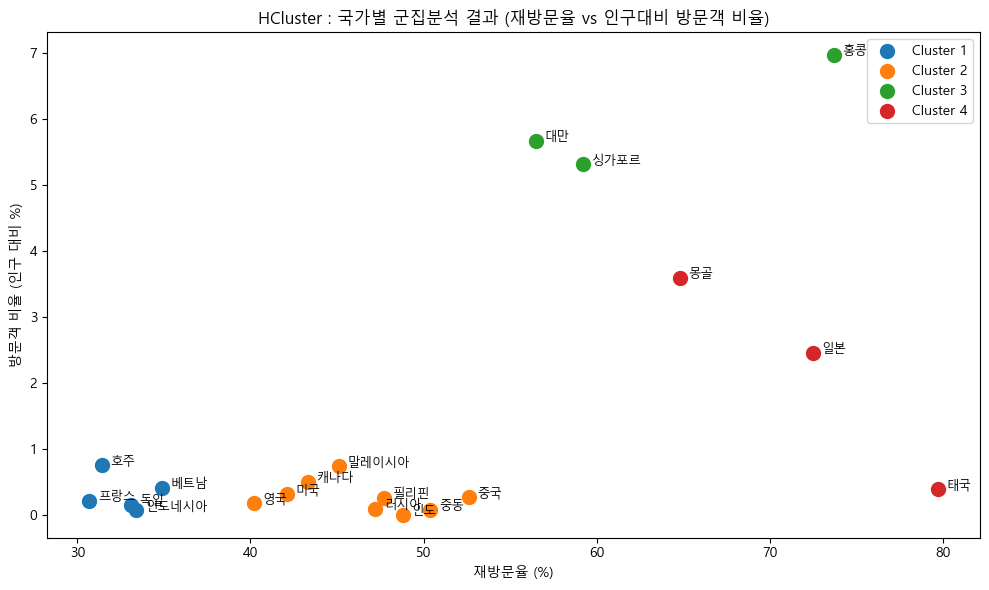

| 분석 항목  | 질문                        | 분석 목적                |
| ------ | ---------------------------- | -------------------- |
| 관심 계기  | 어떤 매체나 콘텐츠가 관심 유발했나?         | 마케팅 트리거 파악           |
| 체류 특성  | 체류 기간은 짧은가? 수도권만 방문하나?       | 지역별 분산 전략 제시         |
| 활동/소비  | 어떤 활동에 참여했나? 소비는 어떤 항목에 많은가? | 산업 연계 전략 도출          |
| 정보 접근  | 어떤 채널로 정보를 얻고, 어떤 정보가 부족했나?  | 정보제공 개선 방안           |
| 만족도/의향 | 무엇에 만족/불만족했는가? 재방문 의향은?      | 개선 포인트 및 충성 고객 전환 전략 |


In [3]:
import pandas as pd

df = pd.read_excel('2024 외래관광객조사_Data.xlsx')

In [4]:
import matplotlib.pyplot as plt
# 그래프 한글 깨짐
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## 1. 여행 형태

`TYP`

### (1) 클러스터1 국가별

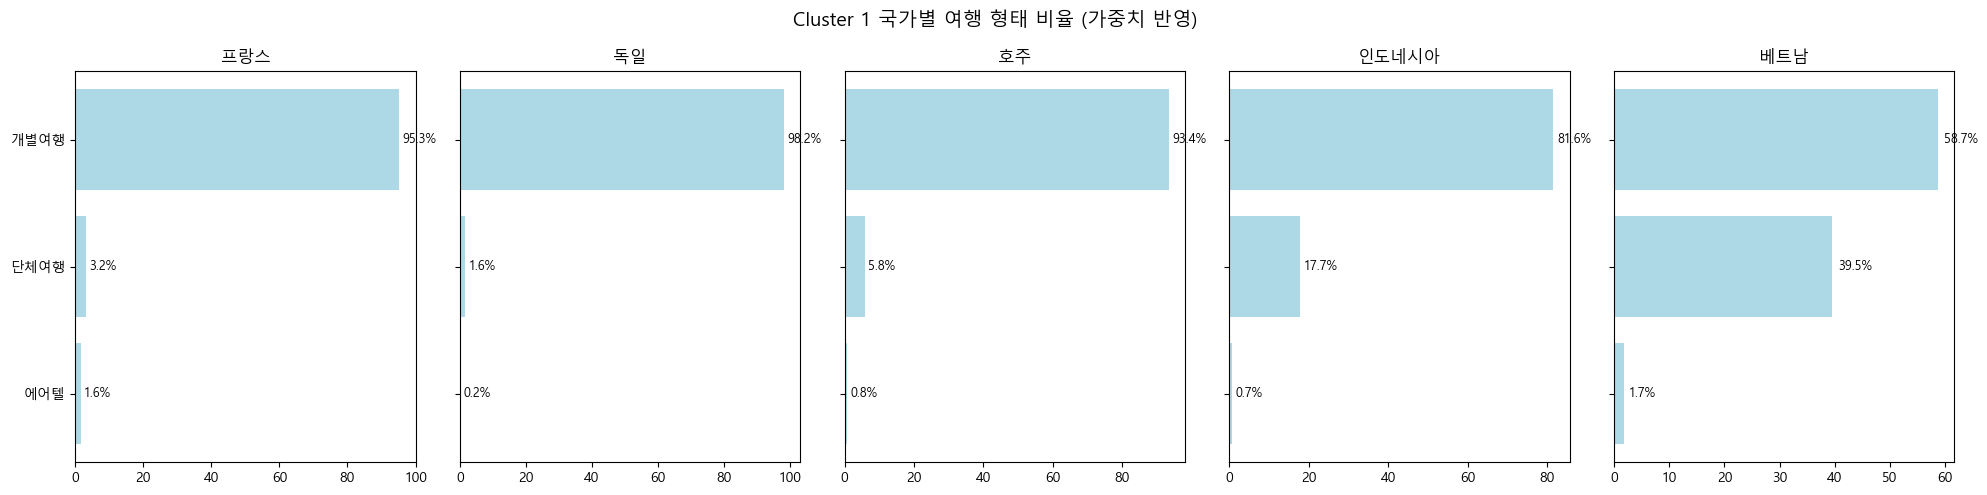

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Cluster 1 국가 코드
cluster1_codes = {
    '프랑스': 19,
    '독일': 18,
    '호주': 15,
    '인도네시아': 13,
    '베트남': 7
}

# 여행형태 코드 → 설명
trip_type_map = {
    1: '개별여행',
    2: '에어텔',
    3: '단체여행'
}

# Cluster 1 데이터 필터링
df_cluster1 = df[df['D_NAT'].isin(cluster1_codes.values())].copy()
df_cluster1['국가명'] = df_cluster1['D_NAT'].map({v: k for k, v in cluster1_codes.items()})
df_cluster1['여행형태'] = df_cluster1['TYP'].map(trip_type_map)

# 시각화
fig, axs = plt.subplots(1, len(cluster1_codes), figsize=(20, 5), sharey=True)

for i, country in enumerate(cluster1_codes.keys()):
    sub_df = df_cluster1[df_cluster1['국가명'] == country]

    # 가중치 기준 여행형태별 비율 계산
    weighted = sub_df.groupby('여행형태')['weight'].sum()
    ratio = (weighted / weighted.sum()) * 100
    ratio = ratio.sort_values(ascending=False)

    # 시각화
    bars = axs[i].barh(ratio.index, ratio.values, color='lightblue')
    axs[i].set_title(country)
    axs[i].invert_yaxis()

    # 비율 수치 표시
    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 1, y, f"{width:.1f}%", va='center', ha='left', fontsize=9)

plt.suptitle('Cluster 1 국가별 여행 형태 비율 (가중치 반영)', fontsize=14)
plt.tight_layout()
plt.show()


#### 결과

대체로 `개별여행`이 압도적으로 많음.

#### 특이한 점

`베트남`에서 `단체여행`이 40% 정도를 차지하며 다른 모습을 보였다.

왤까? 나중에 원인을 찾아보자 ~

### (2) 클러스터별

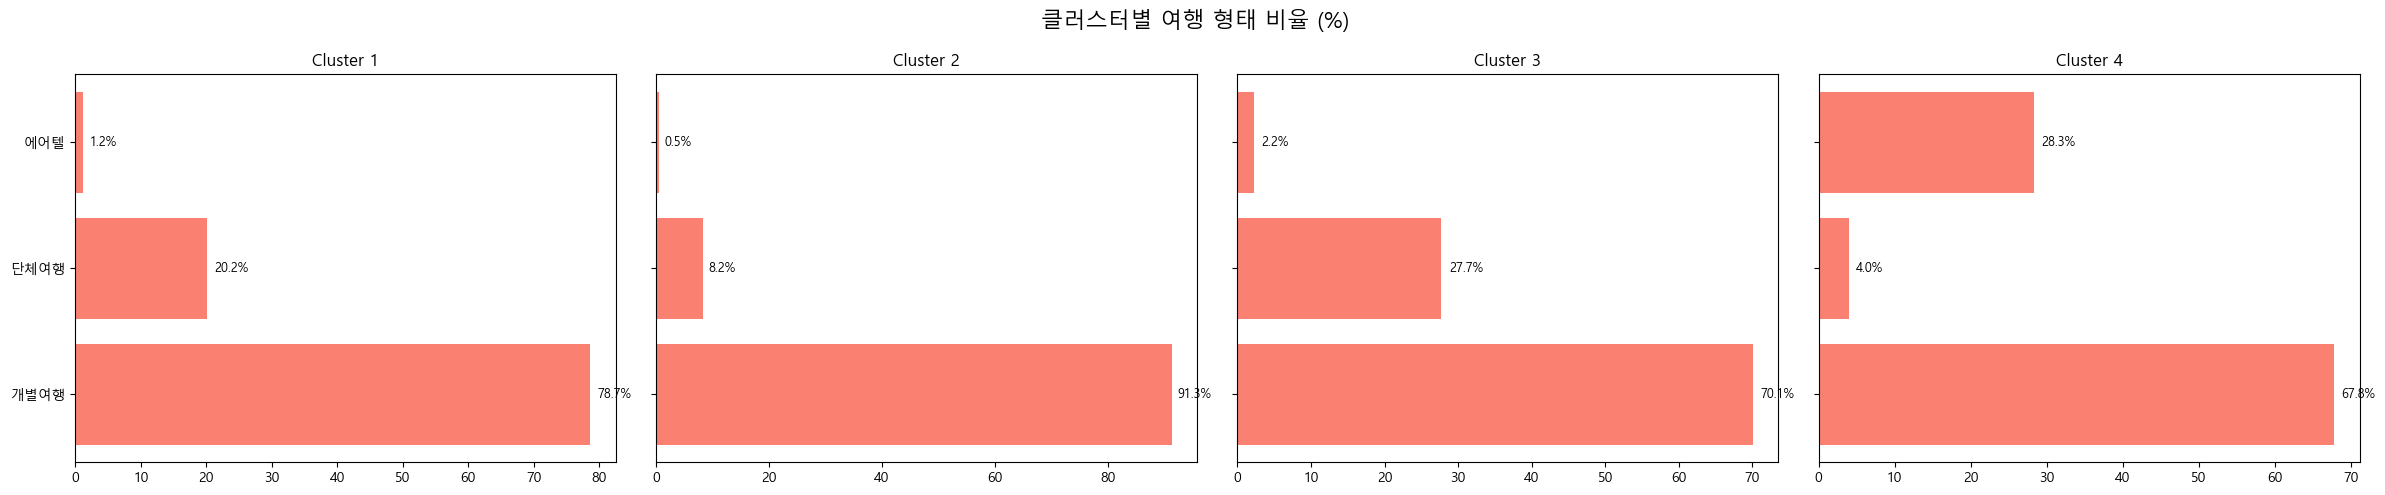

In [6]:
# 클러스터별 국가 코드
clusters = {
    'Cluster 1': [19, 18, 15, 13, 7],
    'Cluster 2': [4, 8, 9, 10, 11, 12, 14, 16],
    'Cluster 3': [3, 5, 10],
    'Cluster 4': [2, 6, 17]
}

# 여행형태 매핑
trip_type_map = {
    1: '개별여행',
    2: '에어텔',
    3: '단체여행'
}

# 클러스터별 가중치 반영 비율 계산
cluster_trip_ratios = {}

for cluster_name, country_codes in clusters.items():
    sub_df = df[df['D_NAT'].isin(country_codes)].copy()
    sub_df['여행형태'] = sub_df['TYP'].map(trip_type_map)

    # 여행형태별 가중합 계산
    weighted = sub_df.groupby('여행형태')['weight'].sum()
    ratio = (weighted / weighted.sum()) * 100
    cluster_trip_ratios[cluster_name] = ratio.sort_values(ascending=False)


# 시각화
fig, axs = plt.subplots(1, len(clusters), figsize=(24, 5), sharey=True)

for i, (cluster, ratio_series) in enumerate(cluster_trip_ratios.items()):
    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='salmon')
    axs[i].set_title(cluster)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 1, y, f"{width:.1f}%", va='center', ha='left', fontsize=9)

plt.suptitle('클러스터별 여행 형태 비율 (%)', fontsize=16)
plt.tight_layout()
plt.show()


#### 결과

클러스터 별로 보았을 때도 `개별여행`이 압도적으로 많다.

클러스터1에서 개별여행 비율이 높게 나타난것이 특이점은 아니라는 것.

## 2. 한국여행 관심계기
`Q1_1a1` ~ `Q1_1a3` (3개까지 복수응답 가능)

### (1) 클러스터1 국가별

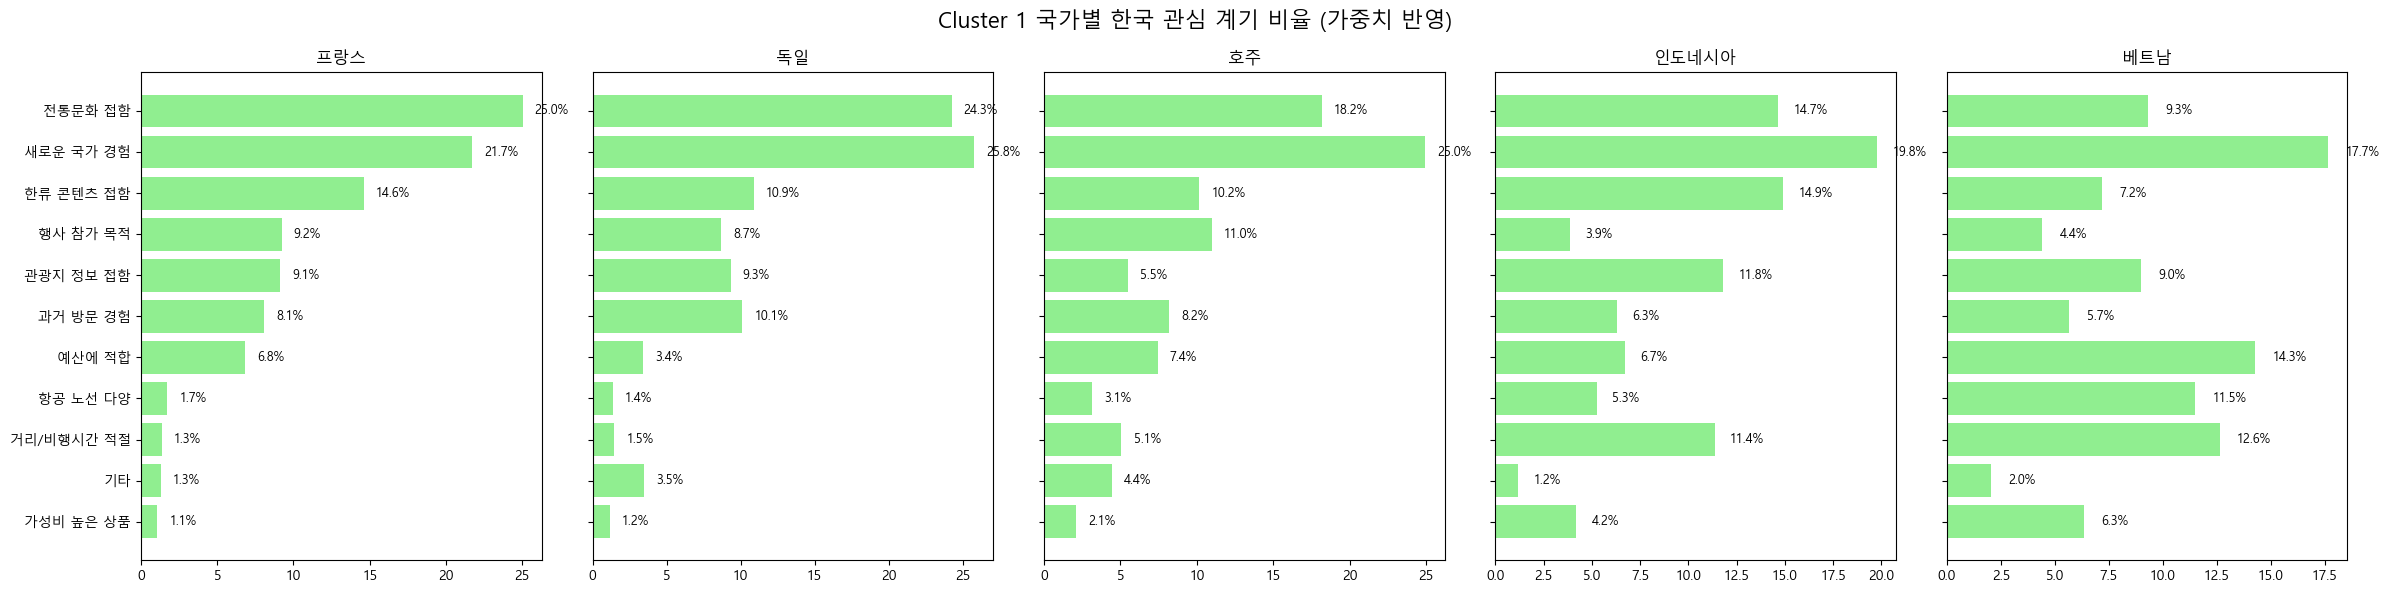

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 관심 계기 코드 → 설명 매핑
interest_reason_map = {
    1: '새로운 국가 경험',
    2: '과거 방문 경험',
    3: '행사 참가 목적',
    4: '예산에 적합',
    5: '거리/비행시간 적절',
    6: '항공 노선 다양',
    7: '한류 콘텐츠 접함',
    8: '전통문화 접함',
    9: '관광지 정보 접함',
    10: '가성비 높은 상품',
    11: '기타'
}

interest_cols = ['Q1_1a1', 'Q1_1a2', 'Q1_1a3']

# Cluster 1 국가 데이터 필터링
df_cluster1 = df[df['D_NAT'].isin(cluster1_codes.values())].copy()
df_cluster1['국가명'] = df_cluster1['D_NAT'].map({v: k for k, v in cluster1_codes.items()})

# 국가별 가중치 기반 비율 계산
interest_ratios_by_country = {}

for country_name in cluster1_codes:
    country_df = df_cluster1[df_cluster1['국가명'] == country_name].copy()
    
    weighted_counts = {k: 0 for k in interest_reason_map.keys()}
    total_weight = 0

    for _, row in country_df.iterrows():
        selected = [row[col] for col in interest_cols if pd.notnull(row[col])]
        if len(selected) == 0:
            continue

        weight_per_item = row['weight'] / len(selected)
        total_weight += row['weight']

        for item in selected:
            if item in weighted_counts:
                weighted_counts[item] += weight_per_item

    # 비율 계산
    ratio = {interest_reason_map[k]: (v / total_weight) * 100 for k, v in weighted_counts.items()}
    interest_ratios_by_country[country_name] = ratio

# 시각화
fig, axs = plt.subplots(1, len(cluster1_codes), figsize=(24, 6), sharey=True)

for i, (country, ratio_dict) in enumerate(interest_ratios_by_country.items()):
    ratio_series = pd.Series(ratio_dict).sort_values(ascending=False)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='lightgreen')
    axs[i].set_title(f"{country}")
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.8, y, f"{width:.1f}%", va='center', ha='left', fontsize=9)

plt.suptitle('Cluster 1 국가별 한국 관심 계기 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


#### 결과

`새로운 국가 경험`이 전반적으로 높은 비율을 차지.

#### 특이한 점

프랑스, 독일, 호주는 `전통문화 접함`, `새로운 국가 경험`이 40%이상의 비율을 차지함.

반면에 인도네시아와 베트남에서는 다른 나라에 비해 10% 이상 되는 부문이 더 많이 존재. 특히 베트남은 일관적이지 않는 모습.

### + 히트맵으로 두가지 조합 선택 비율 보기
중복응답을 어떤 조합으로 했는지 봄으로써, 비슷한 관심을 표하는 계기를 알 수 있다. 이를 사용하여 융합된 전략 가능함.

조건부 비율이므로 A를 선택하고 B를 선택한 사람과 B를 선택하고 A를 선택한 사람의 비율이 다름.

아래 히트맵에서 행이 기준항목, 열이 함께 선택된 항목이다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 관심 계기 코드 → 설명 매핑
interest_reason_map = {
    1: '새로운 국가 경험',
    2: '과거 방문 경험',
    3: '행사 참가 목적',
    4: '예산에 적합',
    5: '거리/비행시간 적절',
    6: '항공 노선 다양',
    7: '한류 콘텐츠 접함',
    8: '전통문화 접함',
    9: '관광지 정보 접함',
    10: '가성비 높은 상품',
    11: '기타'
}

interest_cols = ['Q1_1a1', 'Q1_1a2', 'Q1_1a3']
codes = list(interest_reason_map.keys())

# Cluster 1 데이터 필터링
df_cluster1 = df[df['D_NAT'].isin(cluster1_codes.values())].copy()

# 관심 계기 선택 정보를 정리
rows = []

for _, row in df_cluster1.iterrows():
    selected = [row[col] for col in interest_cols if pd.notnull(row[col])]
    if not selected:
        continue

    weight_per_item = row['weight'] / len(selected)
    for code in selected:
        rows.append({'응답자ID': row.name, '선택항목': code, 'weight': weight_per_item, '전체선택': selected})

# DataFrame 변환
flat_df = pd.DataFrame(rows)

# 조합 비율 계산: i를 선택한 사람 중 j도 선택한 비율
co_occur_matrix = pd.DataFrame(0.0, index=codes, columns=codes)

for i in codes:
    # i를 선택한 응답자의 weight 합
    sub_df = flat_df[flat_df['선택항목'] == i]
    total_weight_i = sub_df['weight'].sum()

    for j in codes:
        if total_weight_i == 0:
            continue
        # i를 선택한 응답자 중, j도 선택한 경우의 가중치 합
        co_weight = sub_df[sub_df['전체선택'].apply(lambda x: j in x)]['weight'].sum()
        co_occur_matrix.loc[i, j] = co_weight / total_weight_i * 100  # 비율 (%)

# 코드명을 설명으로 치환
co_occur_matrix.index = co_occur_matrix.index.map(interest_reason_map)
co_occur_matrix.columns = co_occur_matrix.columns.map(interest_reason_map)


In [ ]:
# 예: '새로운 국가 경험'을 선택한 사람 기준으로 다른 항목 함께 선택한 비율
co_occur_matrix.loc['새로운 국가 경험'].sort_values(ascending=False)

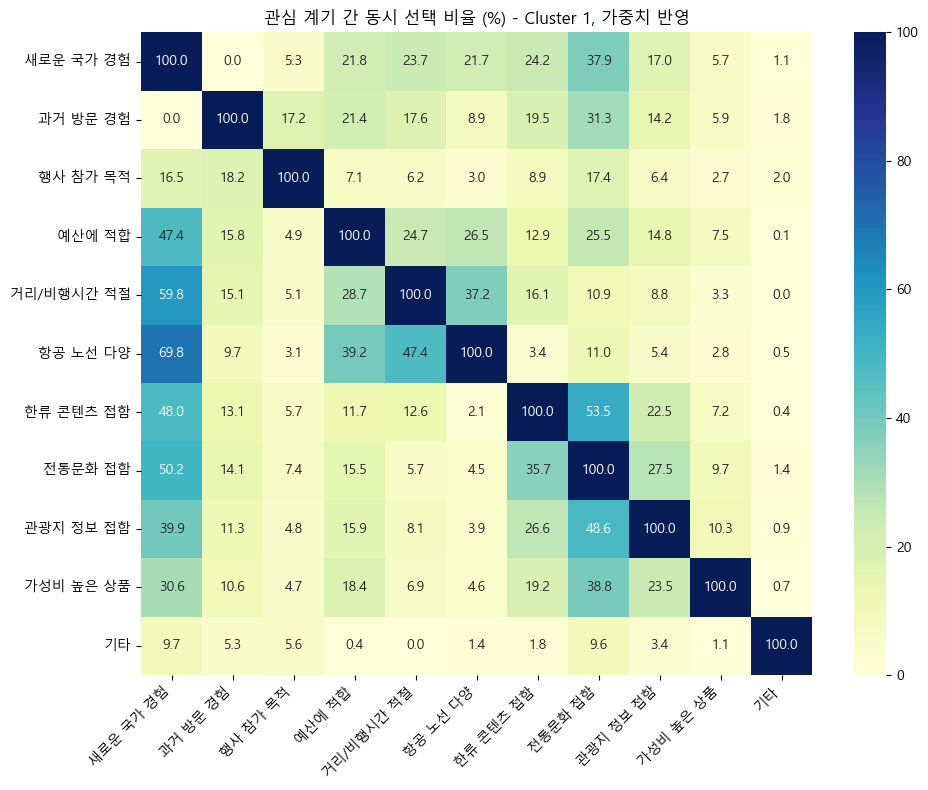

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(co_occur_matrix, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('관심 계기 간 동시 선택 비율 (%) - Cluster 1, 가중치 반영')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### 특이한 점

(1) 새로운 국가 경험 - 항공 노선 다양, 거리/비행시간 적절

이는 새로운 국가로 여행올때 이는 여행 편의성이 중요한 요소로 작용한다는 것.

또 한류 콘텢트 접함, 전통문화 접함도 50% 정도 같이 선택되었는데, 새로운 국가로 오면서 국가의 특징적인 것을 경험하길 원하는 것으로 보임.

(2) 전통문화 접함 - 한류 콘텐츠 접함, 관광지 정보 접함

문화에 대한 흥미가 생긴 사람은 한류에도 비슷한 흥미를 보이는 듯. 또 전통 문화를 관광지 정보로 아는 사람이 절반이나 차지한다는 것.


### + 교집합 선택 개수로 보기

위 히트맵은 조건부에 따라 비율이 달라지기 때문에 그에 맞는 분석할 수 있다.

여기서는 단순히 A와 B를 함께 선택한 사람 수로 봄으로써 어떤 조합이 전체 응답자의 몇 퍼센트를 차지한다를 알 수 있다.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# 관심 계기 코드 → 설명 매핑
interest_reason_map = {
    1: '새로운 국가 경험',
    2: '과거 방문 경험',
    3: '행사 참가 목적',
    4: '예산에 적합',
    5: '거리/비행시간 적절',
    6: '항공 노선 다양',
    7: '한류 콘텐츠 접함',
    8: '전통문화 접함',
    9: '관광지 정보 접함',
    10: '가성비 좋은 상품',
    11: '기타'
}

interest_cols = ['Q1_1a1', 'Q1_1a2', 'Q1_1a3']
codes = list(interest_reason_map.keys())

# Cluster 1 데이터 필터링
df_cluster1 = df[df['D_NAT'].isin(cluster1_codes.values())].copy()

# 응답자별 선택 항목 리스트 및 weight
combo_data = []

for _, row in df_cluster1.iterrows():
    selected = [row[col] for col in interest_cols if pd.notnull(row[col])]
    if selected:
        combo_data.append((set(selected), row['weight']))

# 전체 가중치 합
total_weight = sum(w for _, w in combo_data)

# 지지도 계산용 행렬 초기화
support_matrix = pd.DataFrame(0.0, index=codes, columns=codes)

# 지지도 계산: 각 (A,B) 조합이 동시에 등장한 경우의 weight 합
for selected_set, weight in combo_data:
    for a, b in combinations(sorted(selected_set), 2):
        support_matrix.loc[a, b] += weight
        support_matrix.loc[b, a] += weight  # 대칭 행렬

# 비율화
support_matrix = support_matrix / total_weight * 100
support_matrix.index = support_matrix.index.map(interest_reason_map)
support_matrix.columns = support_matrix.columns.map(interest_reason_map)


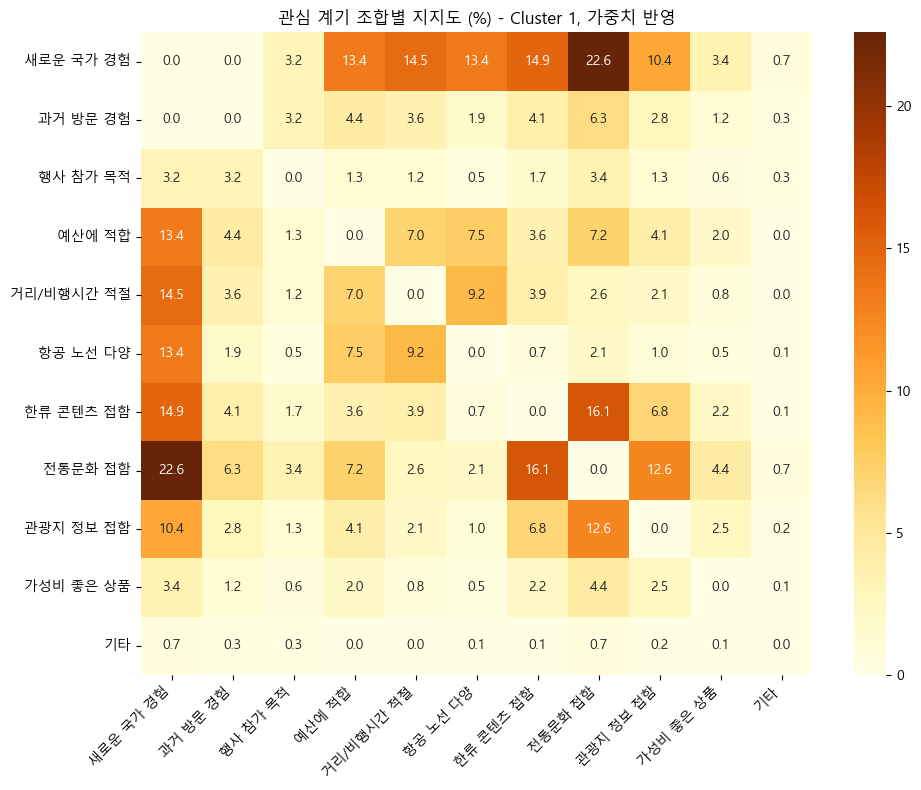

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(support_matrix, annot=True, fmt=".1f", cmap='YlOrBr')
plt.title('관심 계기 조합별 지지도 (%) - Cluster 1, 가중치 반영')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### 결과

위 히트맵과 비슷한 결과. 참고적으로 볼 것.

### (2) 클러스터별

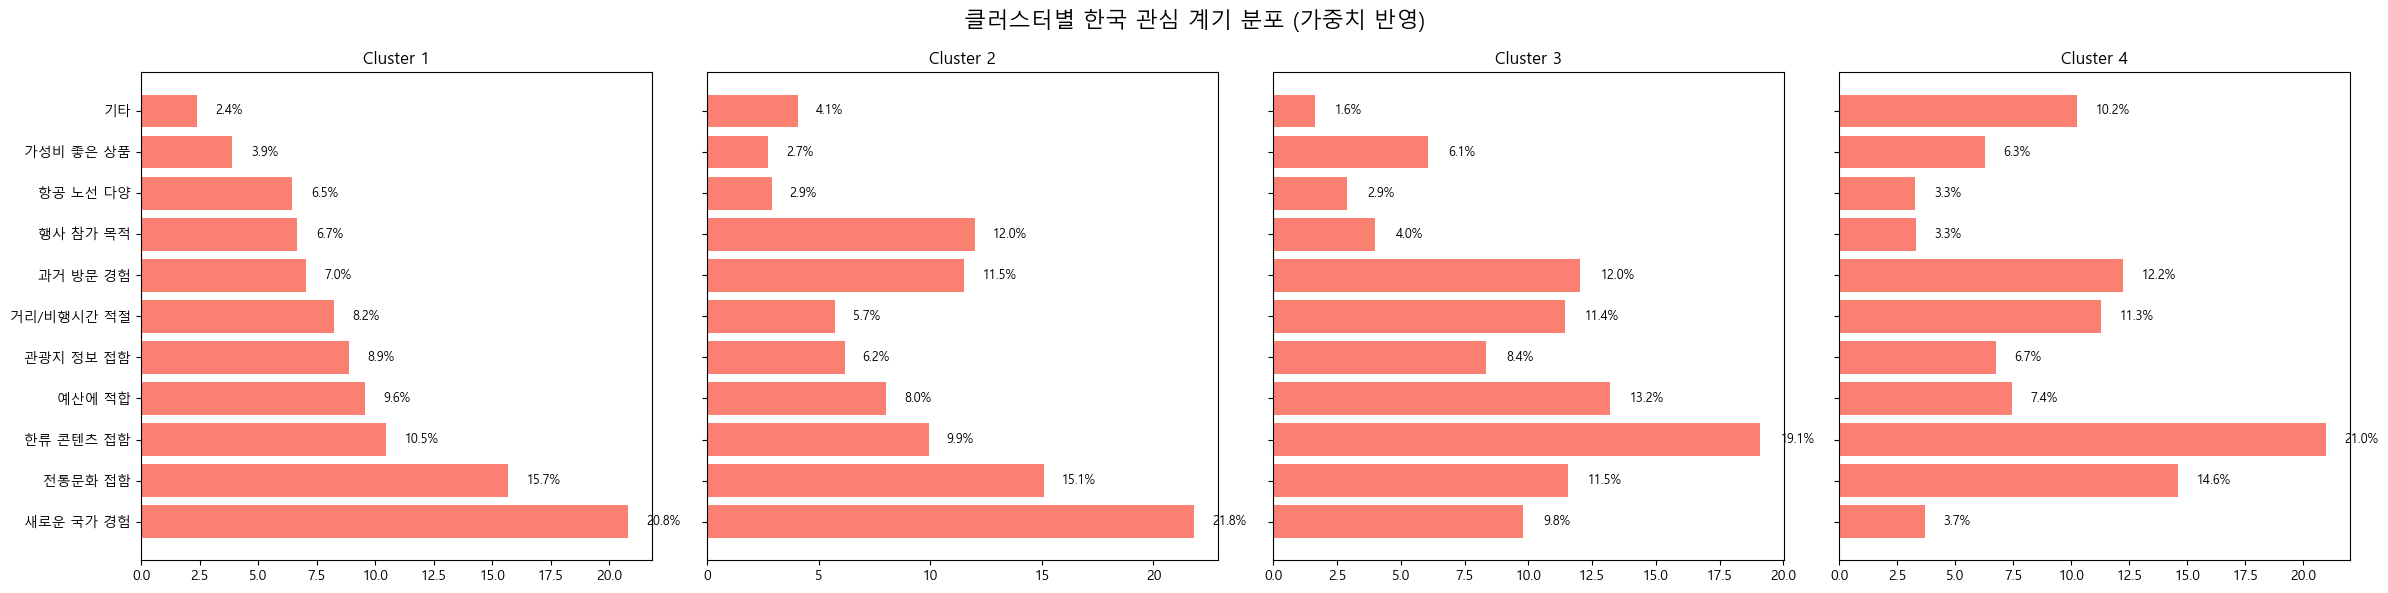

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# 관심 계기 코드 → 설명 매핑
interest_reason_map = {
    1: '새로운 국가 경험',
    2: '과거 방문 경험',
    3: '행사 참가 목적',
    4: '예산에 적합',
    5: '거리/비행시간 적절',
    6: '항공 노선 다양',
    7: '한류 콘텐츠 접함',
    8: '전통문화 접함',
    9: '관광지 정보 접함',
    10: '가성비 좋은 상품',
    11: '기타'
}

interest_cols = ['Q1_1a1', 'Q1_1a2', 'Q1_1a3']

# 클러스터별 가중치 기반 관심 계기 비율 계산
cluster_ratios = {}

for cluster_name, country_codes in clusters.items():
    df_cluster = df[df['D_NAT'].isin(country_codes)].copy()

    weighted_counts = {k: 0 for k in interest_reason_map.keys()}
    total_weight = 0

    for _, row in df_cluster.iterrows():
        selected = [row[col] for col in interest_cols if pd.notnull(row[col])]
        if len(selected) == 0:
            continue

        weight_per_item = row['weight'] / len(selected)
        total_weight += row['weight']

        for item in selected:
            if item in weighted_counts:
                weighted_counts[item] += weight_per_item

    # 비율 계산
    ratio = {interest_reason_map[k]: (v / total_weight) * 100 for k, v in weighted_counts.items()}
    cluster_ratios[cluster_name] = ratio

# 시각화
fig, axs = plt.subplots(1, len(clusters), figsize=(24, 6), sharey=True)

for i, (cluster_name, ratio_dict) in enumerate(cluster_ratios.items()):
    ratio_series = pd.Series(ratio_dict).sort_values(ascending=False)
    
    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='salmon')
    axs[i].set_title(cluster_name)
    axs[i].invert_yaxis()
    
    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.8, y, f"{width:.1f}%", va='center', ha='left', fontsize=9)

plt.suptitle('클러스터별 한국 관심 계기 분포 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


#### 결과

방문객 수도 적고, 재방문율도 적은 나라라서 그런지 예상했던대로 다른 클러스터와 비교했을 때, 새로운 국가 경험이 가장 높은 비율을 차지.

#### 참고

클러스터별로 꽤 다른 결과가 나왔다.

클러스터 1,2에서는 새로운 국가 경험이 20%이상 차지하였으나 클러스터 3,4는 전혀 다른 양상.

이 부분 함께 보면 조을듯 !!

### + 선택 개수 비율

그냥 단순히 몇개 선택했는지 궁금해서

In [14]:
# Cluster 1 응답자 대상
df_cluster1 = df[df['D_NAT'].isin(cluster1_codes.values())].copy()

# 선택한 항목 수 계산
df_cluster1['선택개수'] = df_cluster1[interest_cols].notnull().sum(axis=1)

# 선택개수별 가중치 합산
weight_by_count = df_cluster1.groupby('선택개수')['weight'].sum()

# 전체 가중치 합
total_weight = df_cluster1['weight'].sum()

# 비율 계산
ratio_by_count = (weight_by_count / total_weight * 100).round(1)

# 출력
print("🧾 Cluster 1 관심 계기 선택 개수별 비율 (가중치 반영):")
for count in sorted(ratio_by_count.index):
    print(f"  ▶ {count}개 선택: {ratio_by_count[count]:.1f}%")


🧾 Cluster 1 관심 계기 선택 개수별 비율 (가중치 반영):
  ▶ 0개 선택: 23.5%
  ▶ 1개 선택: 9.8%
  ▶ 2개 선택: 10.4%
  ▶ 3개 선택: 56.3%


### + 세 개 조합으로도 보기

두개 조합(히트맵)을 위주로 보고, 이건 참고용!

In [15]:
from itertools import combinations
from collections import defaultdict

# 3개 항목 조합 지지도 저장
triplet_support = defaultdict(float)

# 응답자별 선택 항목 set과 가중치 수집
combo_data = []
for _, row in df[df['D_NAT'].isin(cluster1_codes.values())].iterrows():
    selected = [row[col] for col in interest_cols if pd.notnull(row[col])]
    if selected:
        combo_data.append((set(selected), row['weight']))

# 전체 가중치 합 (분모)
total_weight = sum(w for _, w in combo_data)

# 3개 항목 조합을 돌면서 지지도 계산
for selected_set, weight in combo_data:
    for triplet in combinations(sorted(selected_set), 3):
        triplet_support[triplet] += weight

# 결과 정리
triplet_support_percent = {
    tuple(interest_reason_map[i] for i in triplet): v / total_weight * 100
    for triplet, v in triplet_support.items()
}

# 지지도 상위 조합 10개 출력
top_triplets = sorted(triplet_support_percent.items(), key=lambda x: x[1], reverse=True)[:10]

print("🔺 Cluster 1 관심 계기 3개 조합별 지지도 상위 10개 (가중치 반영):\n")
for triplet, support in top_triplets:
    print(f"  {triplet}: {support:.2f}%")


🔺 Cluster 1 관심 계기 3개 조합별 지지도 상위 10개 (가중치 반영):

  ('새로운 국가 경험', '한류 콘텐츠 접함', '전통문화 접함'): 7.52%
  ('새로운 국가 경험', '거리/비행시간 적절', '항공 노선 다양'): 6.58%
  ('새로운 국가 경험', '전통문화 접함', '관광지 정보 접함'): 5.12%
  ('새로운 국가 경험', '예산에 적합', '항공 노선 다양'): 4.82%
  ('새로운 국가 경험', '예산에 적합', '전통문화 접함'): 2.95%
  ('한류 콘텐츠 접함', '전통문화 접함', '관광지 정보 접함'): 2.85%
  ('새로운 국가 경험', '거리/비행시간 적절', '한류 콘텐츠 접함'): 2.79%
  ('새로운 국가 경험', '예산에 적합', '거리/비행시간 적절'): 2.49%
  ('과거 방문 경험', '한류 콘텐츠 접함', '전통문화 접함'): 2.20%
  ('새로운 국가 경험', '한류 콘텐츠 접함', '관광지 정보 접함'): 1.85%


## 3. 주요 방한 목적

`Q1`

### (1) 클러스터1 국가별

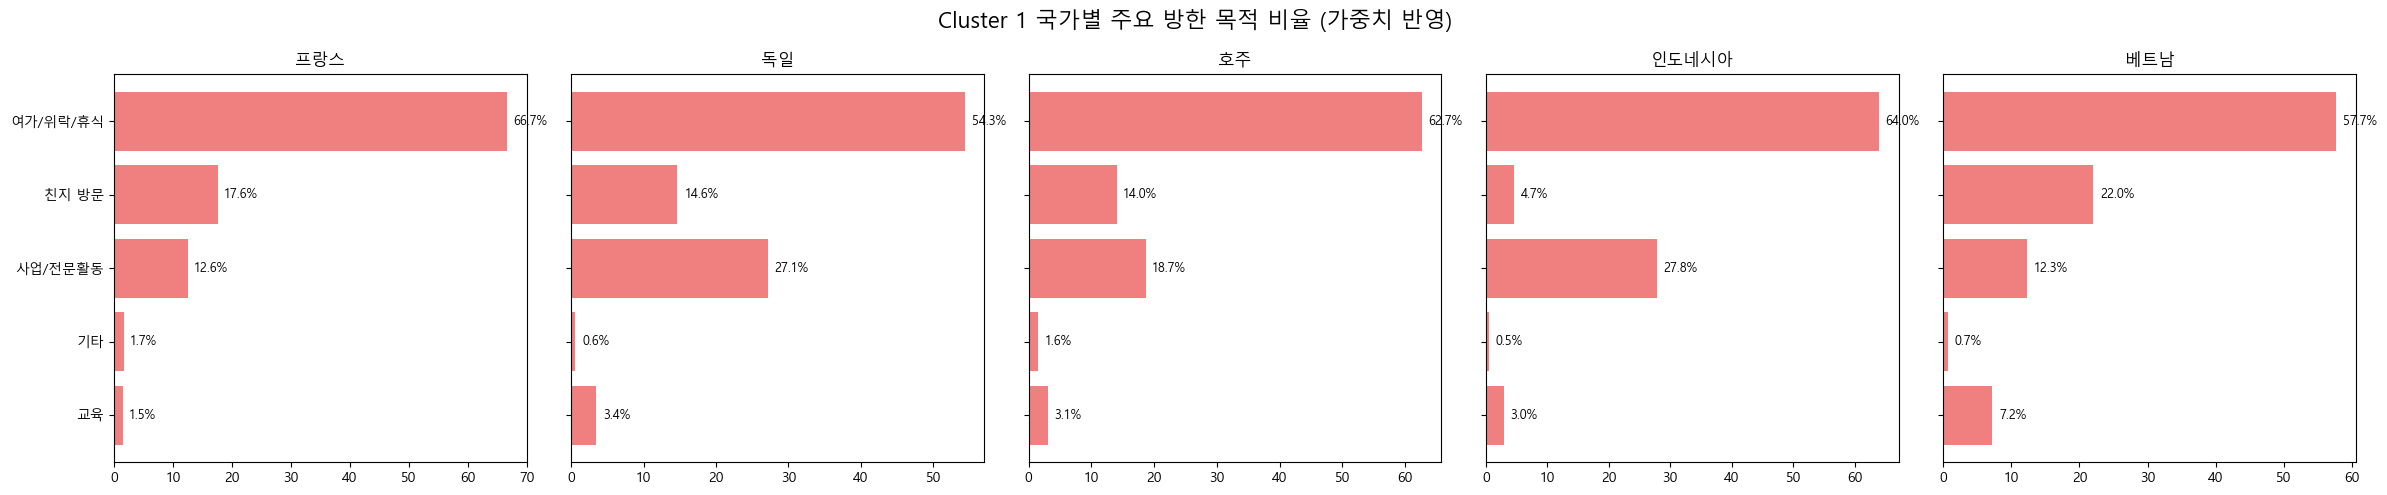

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# 주요 목적 매핑
purpose_map = {
    1: '여가/위락/휴식',
    2: '친지 방문',
    3: '사업/전문활동',
    4: '교육',
    5: '기타'
}

# 데이터 필터링
df_cluster1 = df[df['D_NAT'].isin(cluster1_codes.values())].copy()
df_cluster1['국가명'] = df_cluster1['D_NAT'].map({v: k for k, v in cluster1_codes.items()})
df_cluster1['방한목적'] = df_cluster1['Q1'].map(purpose_map)

# 시각화
fig, axs = plt.subplots(1, len(cluster1_codes), figsize=(24, 5), sharey=True)

for i, country in enumerate(cluster1_codes.keys()):
    sub_df = df_cluster1[df_cluster1['국가명'] == country]
    
    weighted = sub_df.groupby('방한목적')['weight'].sum()
    ratio = (weighted / weighted.sum() * 100).sort_values(ascending=False)

    bars = axs[i].barh(ratio.index, ratio.values, color='lightcoral')
    axs[i].set_title(country)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 1, y, f"{width:.1f}%", va='center', ha='left', fontsize=9)

plt.suptitle('Cluster 1 국가별 주요 방한 목적 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()

#### 결과

여가 목적이 다수. 

#### 특이한 점

독일/호주/인도네시아는 사업이 20%~27%정도를 차지하며 2등.

베트남은 친지 방문이 22%로 2등. (뭐지 국제결혼..? 뭐 이런거 때문인가?)

### (2) 클러스터별

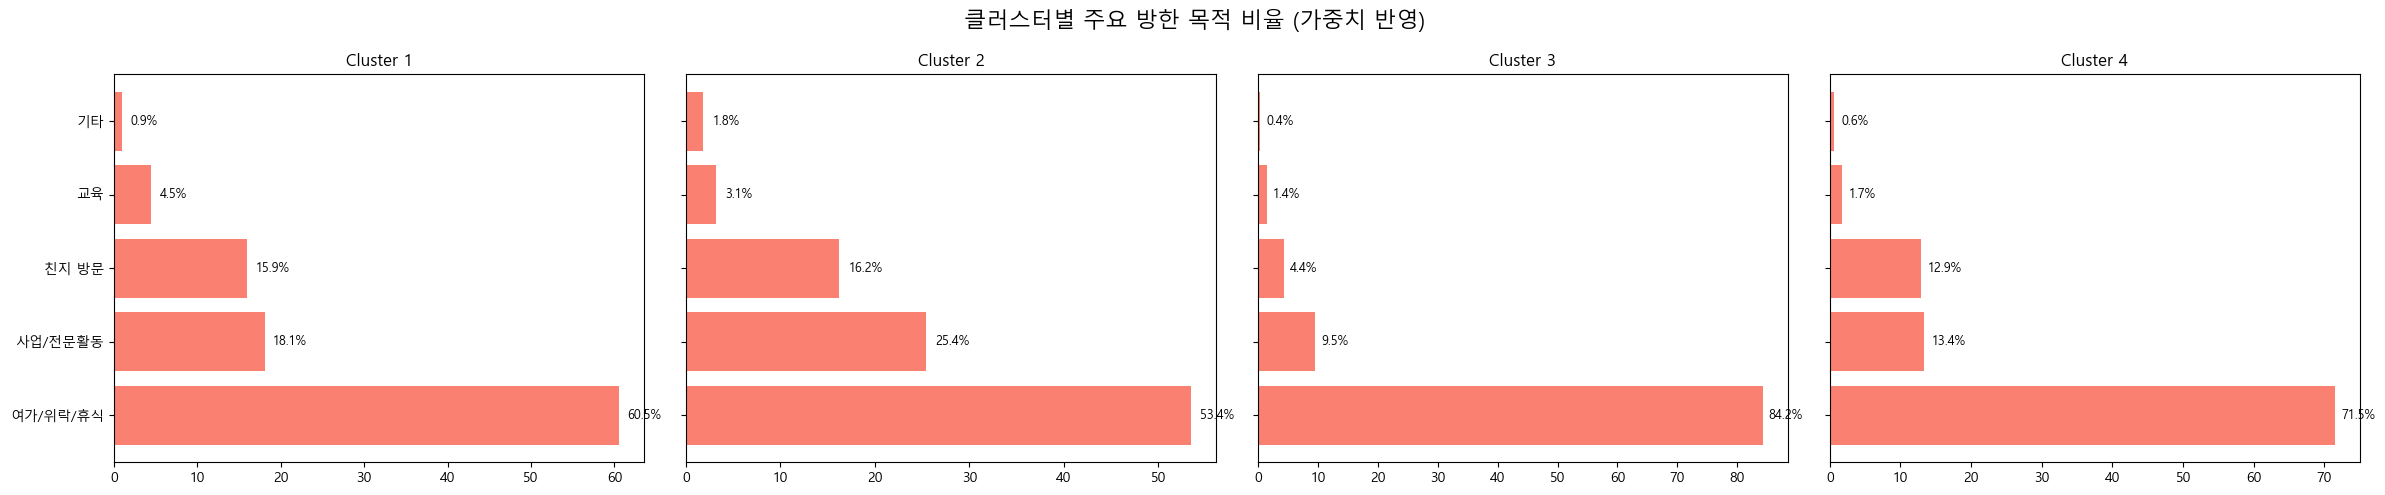

In [20]:
# 클러스터별 목적 비율 계산
cluster_purpose_ratios = {}

for cluster_name, country_codes in clusters.items():
    sub_df = df[df['D_NAT'].isin(country_codes)].copy()
    sub_df['방한목적'] = sub_df['Q1'].map(purpose_map)

    weighted = sub_df.groupby('방한목적')['weight'].sum()
    ratio = (weighted / weighted.sum() * 100).sort_values(ascending=False)

    cluster_purpose_ratios[cluster_name] = ratio

# 시각화
fig, axs = plt.subplots(1, len(clusters), figsize=(24, 5), sharey=True)

for i, (cluster_name, ratio_series) in enumerate(cluster_purpose_ratios.items()):
    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='salmon')
    axs[i].set_title(cluster_name)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 1, y, f"{width:.1f}%", va='center', ha='left', fontsize=9)

plt.suptitle('클러스터별 주요 방한 목적 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


#### 결과

클러스터별로도 비슷한 결과. 클러스터1에서 여가목적이 다수인게 특이하지 않음.

## 4. 방문을 고려한 아시아 국가

`Q2a1` ~ `Q2a_dk` (0개~4개 선택가능)

In [ ]:
q2_country_code_map = {
    1: '일본',
    2: '중국',
    3: '대만',
    4: '홍콩',
    5: '싱가포르',
    6: '태국',
    7: '말레이시아',
    8: '마카오',
    9: '인도',
    10: '인도네시아',
    11: '필리핀',
    12: '베트남',
    13: '캄보디아',
    14: '기타',
    15: '없다'
}

q2_code_cols = ['Q2a1', 'Q2a2', 'Q2a3']


### (1) 클러스터1 국가별

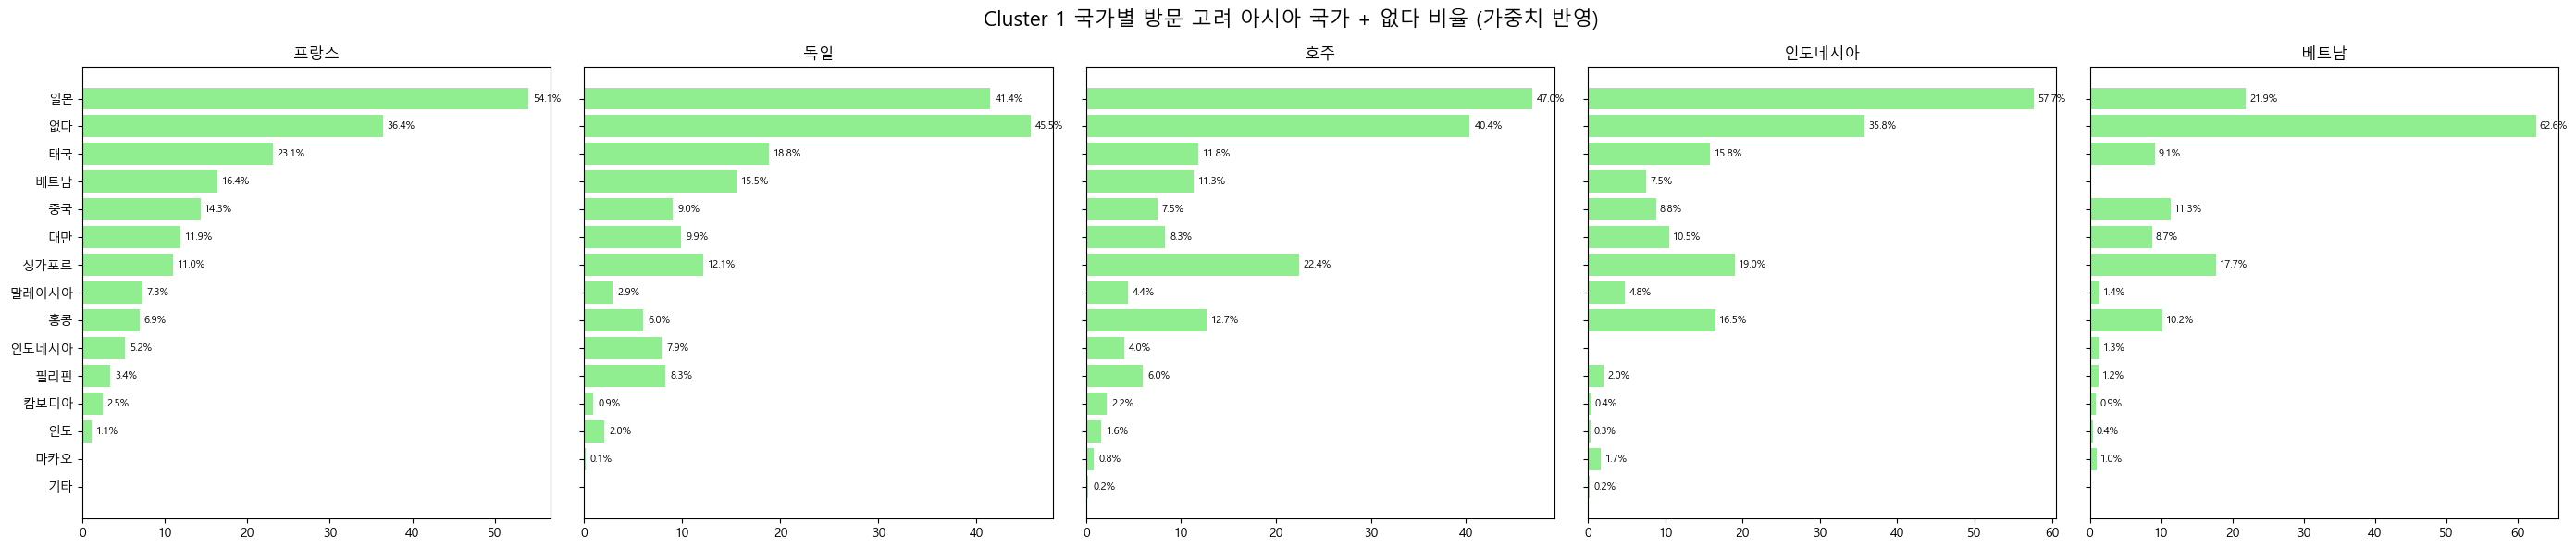

In [27]:
from collections import defaultdict

fig, axs = plt.subplots(1, len(cluster1_codes), figsize=(28, 6), sharey=True)

for i, country in enumerate(cluster1_codes.keys()):
    sub_df = df_cluster1[df_cluster1['국가명'] == country]
    total_weight = sub_df['weight'].sum()
    
    country_weights = defaultdict(float)

    for _, row in sub_df.iterrows():
        selected = [row[col] for col in q2_code_cols if pd.notnull(row[col])]
        if row.get('Q2a_dk') == 15 and not selected:
            country_weights['없다'] += row['weight']
        else:
            for code in selected:
                if code in q2_country_code_map:
                    country_weights[q2_country_code_map[code]] += row['weight']

    ratio_series = pd.Series(country_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='lightgreen')
    axs[i].set_title(country)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.5, y, f"{width:.1f}%", va='center', ha='left', fontsize=8)

plt.suptitle('Cluster 1 국가별 방문 고려 아시아 국가 + 없다 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


#### 결과
고려한 아시아 국가 중 1순위는 모두 일본.

#### 특이한 점
대체로 없거나 일본 비율이 높음. 특히 베트남은 없다가 60%정도로 한국만 고려한 비율이 매우 높게 나왔다는 것.

### (2) 클러스터별

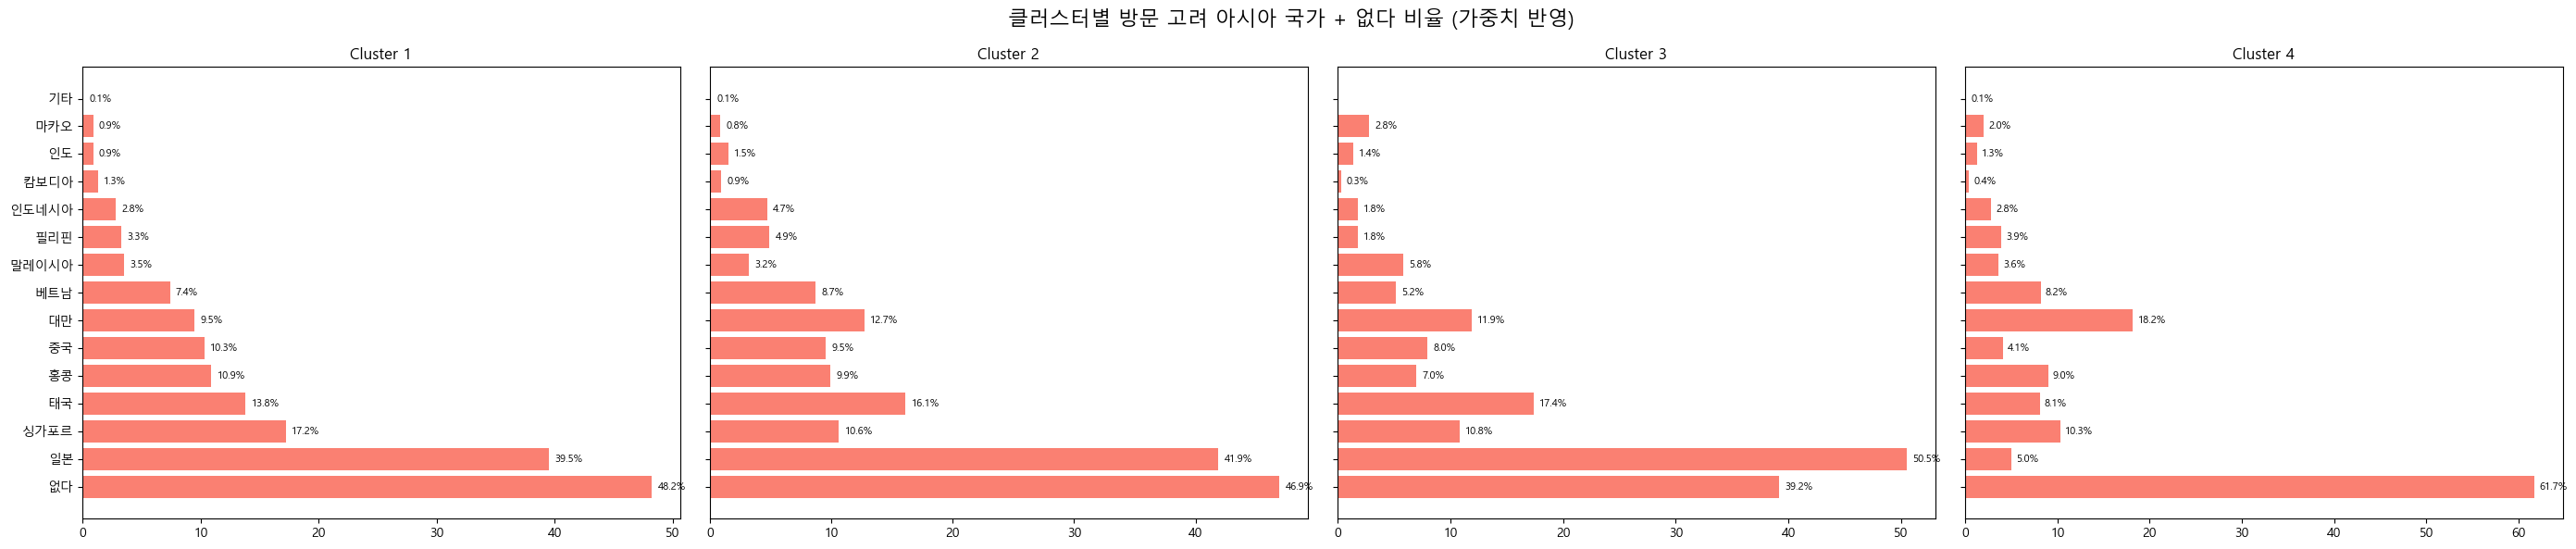

In [28]:
fig, axs = plt.subplots(1, len(clusters), figsize=(28, 6), sharey=True)

for i, (cluster_name, country_codes) in enumerate(clusters.items()):
    sub_df = df[df['D_NAT'].isin(country_codes)].copy()
    total_weight = sub_df['weight'].sum()
    
    country_weights = defaultdict(float)

    for _, row in sub_df.iterrows():
        selected = [row[col] for col in q2_code_cols if pd.notnull(row[col])]
        if row.get('Q2a_dk') == 15 and not selected:
            country_weights['없다'] += row['weight']
        else:
            for code in selected:
                if code in q2_country_code_map:
                    country_weights[q2_country_code_map[code]] += row['weight']

    ratio_series = pd.Series(country_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='salmon')
    axs[i].set_title(cluster_name)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.5, y, f"{width:.1f}%", va='center', ha='left', fontsize=8)

plt.suptitle('클러스터별 방문 고려 아시아 국가 + 없다 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


#### 결과

없다가 대체로 높은 비율을 보임. 

#### 특이한 점

없다랑 일본이 과반수인데 클러스터4는 완전 다른 양상. 참고!

## 5. 해당 국가 관심 계기

In [29]:
q2_interest_map = {
    1: '새로운 국가 경험',
    2: '과거 방문 경험',
    3: '행사 참가 목적',
    4: '예산에 적합',
    5: '거리/비행시간 적절',
    6: '항공 노선 다양',
    7: '문화 콘텐츠 접함',
    8: '전통문화 접함',
    9: '관광지 정보 접함',
    10: '가성비 좋은 상품',
    11: '기타'
}

q2_interest_cols = ['Q2_1a1', 'Q2_1a2', 'Q2_1a3']


### (1) 클러스터1 국가별

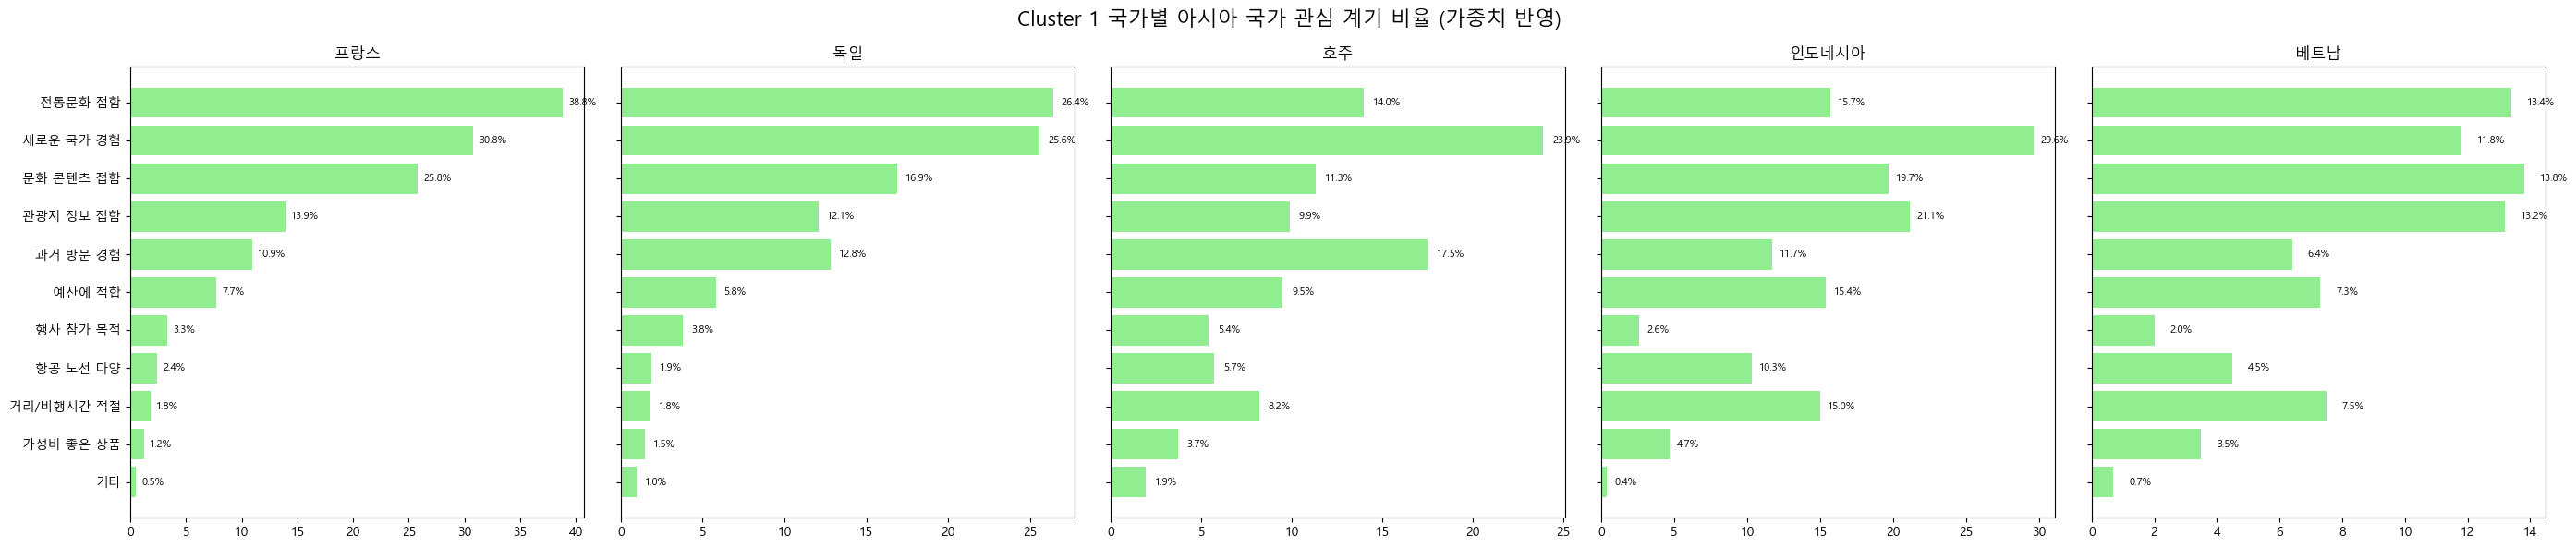

In [30]:
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

df_cluster1 = df[df['D_NAT'].isin(cluster1_codes.values())].copy()
df_cluster1['국가명'] = df_cluster1['D_NAT'].map({v: k for k, v in cluster1_codes.items()})

fig, axs = plt.subplots(1, len(cluster1_codes), figsize=(28, 6), sharey=True)

for i, country in enumerate(cluster1_codes.keys()):
    sub_df = df_cluster1[df_cluster1['국가명'] == country]
    total_weight = sub_df['weight'].sum()

    reason_weights = defaultdict(float)

    for _, row in sub_df.iterrows():
        selected = [row[col] for col in q2_interest_cols if pd.notnull(row[col])]
        for code in selected:
            if code in q2_interest_map:
                reason_weights[q2_interest_map[code]] += row['weight']

    ratio_series = pd.Series(reason_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='lightgreen')
    axs[i].set_title(country)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.5, y, f"{width:.1f}%", va='center', ha='left', fontsize=8)

plt.suptitle('Cluster 1 국가별 아시아 국가 관심 계기 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


#### 결과

새로운 국가 접함이 대체적으로 높은 비율

#### 특이한 점

프랑스 독일은 비슷한 순위. 아무래도 유럽대륙에서 아시아 국가 관심 계기 비율이니 비슷한 거라고 생각됨.

베트남 선택 비율이 되게 다양함.

### (2) 클러스터별

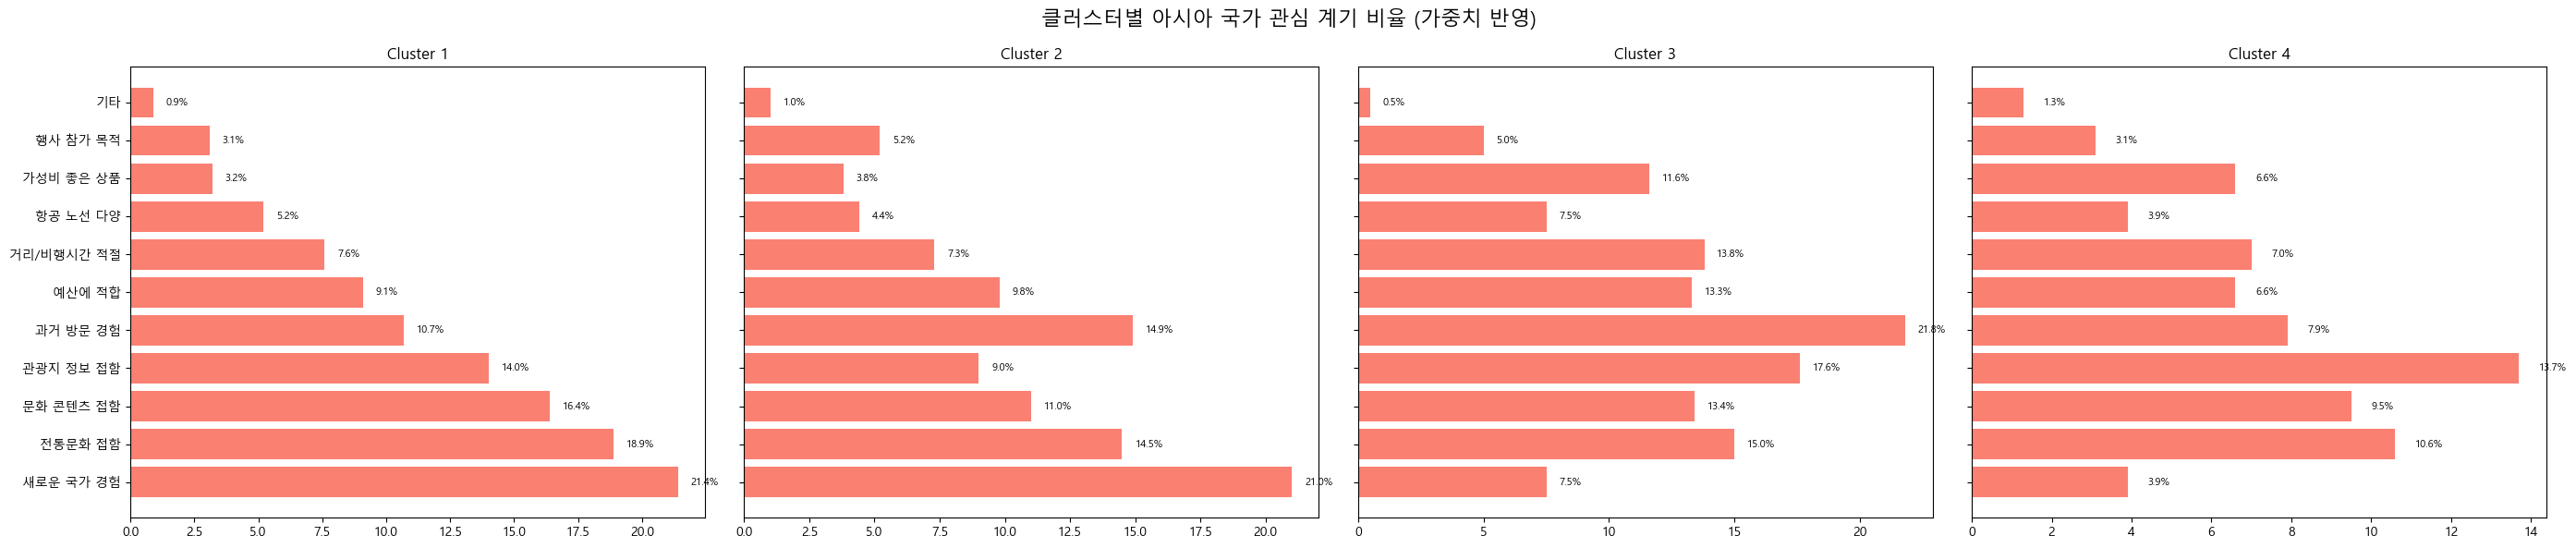

In [ ]:
fig, axs = plt.subplots(1, len(clusters), figsize=(28, 6), sharey=True)

for i, (cluster_name, country_codes) in enumerate(clusters.items()):
    sub_df = df[df['D_NAT'].isin(country_codes)].copy()
    total_weight = sub_df['weight'].sum()

    reason_weights = defaultdict(float)

    for _, row in sub_df.iterrows():
        selected = [row[col] for col in q2_interest_cols if pd.notnull(row[col])]
        for code in selected:
            if code in q2_interest_map:
                reason_weights[q2_interest_map[code]] += row['weight']

    ratio_series = pd.Series(reason_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='salmon')
    axs[i].set_title(cluster_name)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.5, y, f"{width:.1f}%", va='center', ha='left', fontsize=8)

plt.suptitle('클러스터별 아시아 국가 관심 계기 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


#### 결과
우리나라 선택 계기와 비슷하게 전통문화, 문화 콘텐츠 접한 경험이 타 아시아 국가에 관심을 갖게 되는 계기.

#### 특이한 점

cluster 1, 2 모두 cluster 3, 4에 비해 `새로운 국가 경험`이 많음.

## 6. 한국 방문 전 후 타 국가 방문

In [32]:
visit_seq_map = {
    1: '한국만 방문',
    2: '방문 직전',
    3: '방문 직후',
    4: '방문 전후'
}

zq_cols = ['ZQ2_31', 'ZQ2_32', 'ZQ2_33', 'ZQ2_34']


### (1) 클러스터1 국가별

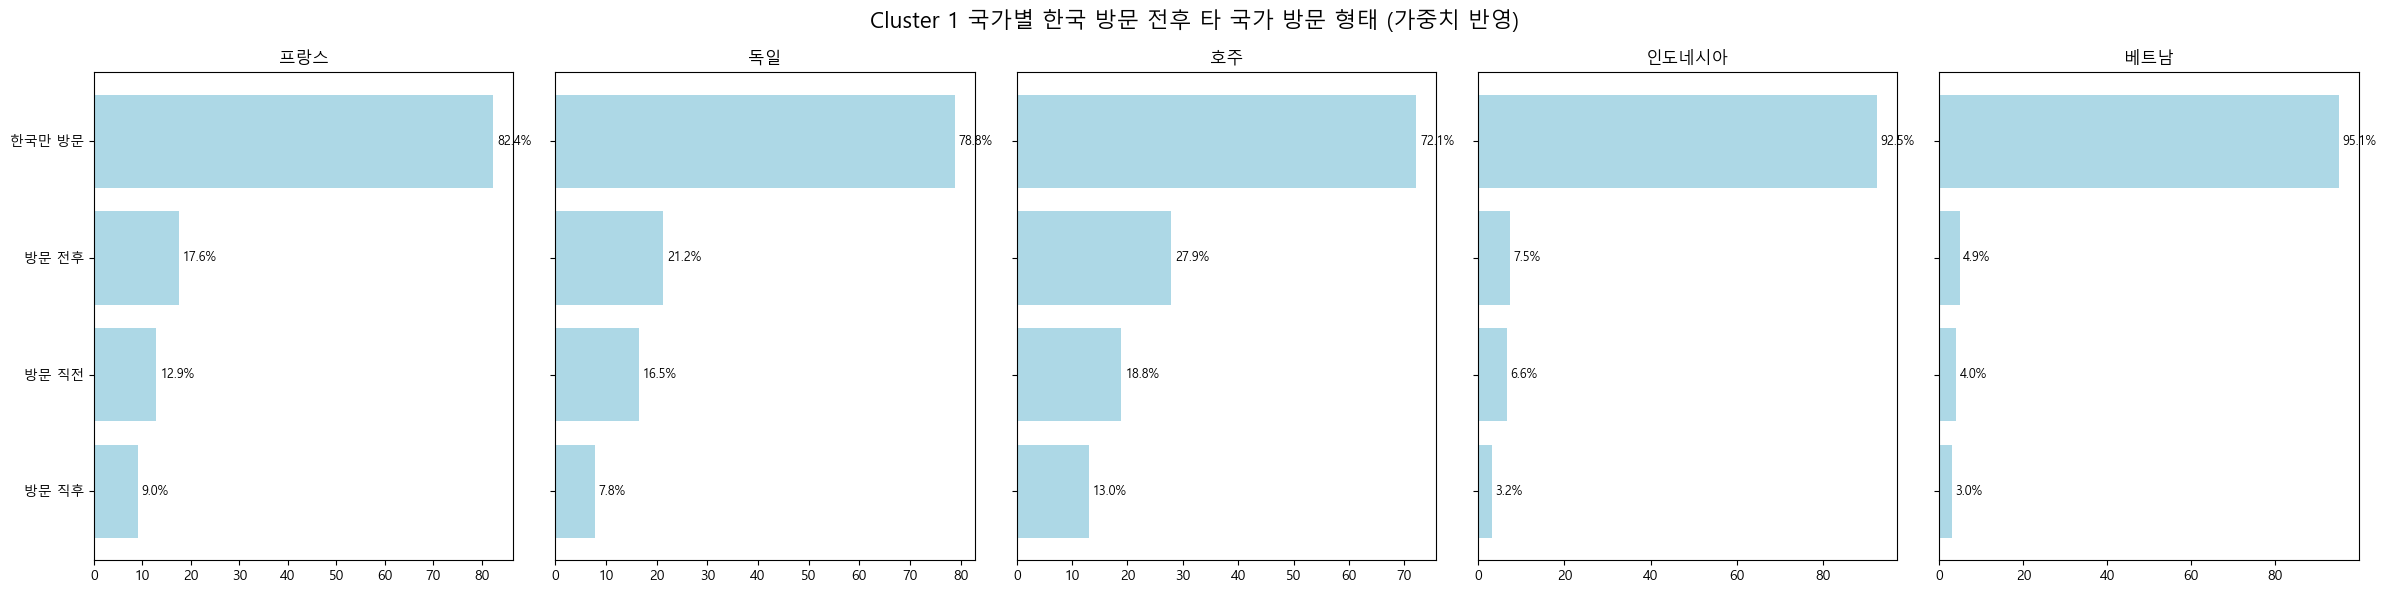

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

df_cluster1 = df[df['D_NAT'].isin(cluster1_codes.values())].copy()
df_cluster1['국가명'] = df_cluster1['D_NAT'].map({v: k for k, v in cluster1_codes.items()})

fig, axs = plt.subplots(1, len(cluster1_codes), figsize=(24, 6), sharey=True)

for i, country in enumerate(cluster1_codes.keys()):
    sub_df = df_cluster1[df_cluster1['국가명'] == country]
    total_weight = sub_df['weight'].sum()

    response_weights = {visit_seq_map[k]: 0.0 for k in visit_seq_map}

    for col in zq_cols:
        counts = sub_df.groupby(col)['weight'].sum()
        for code, weight in counts.items():
            if code in visit_seq_map:
                response_weights[visit_seq_map[code]] += weight

    ratio_series = pd.Series(response_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='lightblue')
    axs[i].set_title(country)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.8, y, f"{width:.1f}%", va='center', ha='left', fontsize=9)

plt.suptitle('Cluster 1 국가별 한국 방문 전후 타 국가 방문 형태 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


#### 결과

주로 한국만 방문.

#### 특이한 점

베트남은 한국만 방문 비율이 96%로 압도적, 인도네시아도 92%로 많음 => 아시아 대륙

반면에 유럽은 17%~27%까지 방문 전후로 타 국가를 방문했을음 알 수 있음. => 유럽 및 오세아니아 대륙

거리상?

### (2) 클러스터별

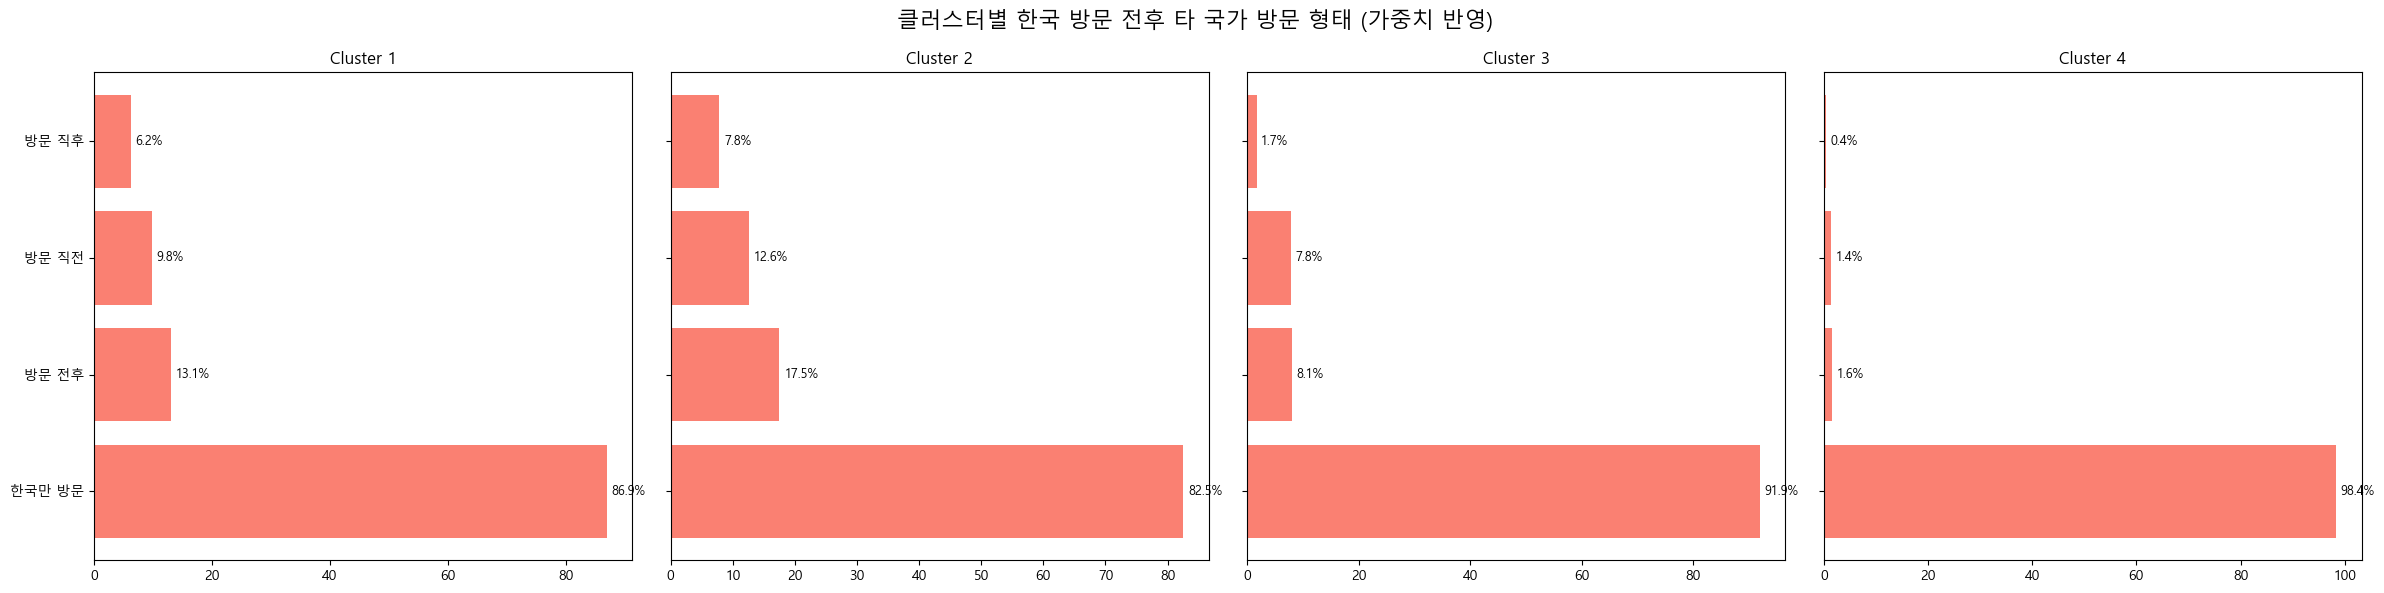

In [34]:
fig, axs = plt.subplots(1, len(clusters), figsize=(24, 6), sharey=True)

for i, (cluster_name, country_codes) in enumerate(clusters.items()):
    sub_df = df[df['D_NAT'].isin(country_codes)].copy()
    total_weight = sub_df['weight'].sum()

    response_weights = {visit_seq_map[k]: 0.0 for k in visit_seq_map}

    for col in zq_cols:
        counts = sub_df.groupby(col)['weight'].sum()
        for code, weight in counts.items():
            if code in visit_seq_map:
                response_weights[visit_seq_map[code]] += weight

    ratio_series = pd.Series(response_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='salmon')
    axs[i].set_title(cluster_name)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.8, y, f"{width:.1f}%", va='center', ha='left', fontsize=9)

plt.suptitle('클러스터별 한국 방문 전후 타 국가 방문 형태 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


#### 결과

한국만 방문이 가장 많고, 다른 클러스터와 비교했을 때도 순위에 있어 큰 차이가 없음.

#### 특이한 점

클러스터 4에서 가장 극명하게 한국만 방문하는 모습,, 역시 재방문율 1위 ~ 

## 7. 한국 방문 전후 국가

## 8. 한국방문 전후 숙박일수

## 9. 고려한 관광활동

`Q3_1a1` ~ `Q3_1a3`

In [37]:
from collections import defaultdict

q3_activity_map = {
    1: '식도락',
    2: '쇼핑',
    3: '자연경관',
    4: '휴양/웰니스',
    5: '역사유적',
    6: '전통문화체험',
    7: '박물관/전시관',
    8: '한류 콘텐츠',
    9: '공연 관람',
    10: '지역 축제',
    11: '유흥/카지노',
    12: '오락/테마파크',
    13: '뷰티/미용',
    14: '치료/검진',
    15: '스포츠 관람',
    16: '스포츠 참여',
    17: '기타'
}

q3_cols = ['Q3_1a1', 'Q3_1a2', 'Q3_1a3']


### (1) 클러스터1 국가별

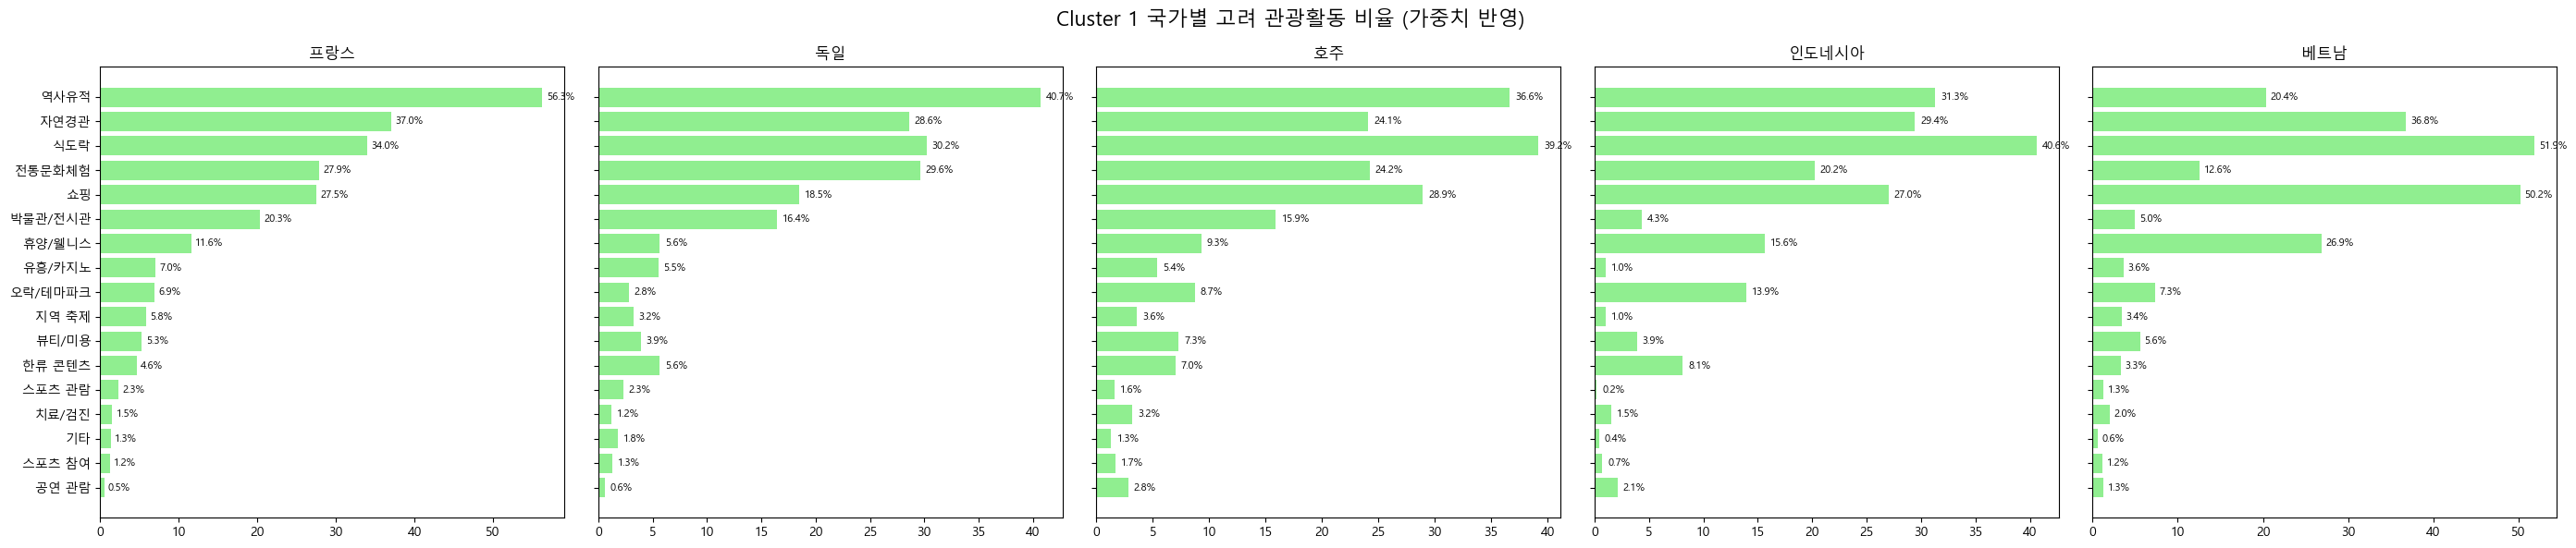

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

df_cluster1 = df[df['D_NAT'].isin(cluster1_codes.values())].copy()
df_cluster1['국가명'] = df_cluster1['D_NAT'].map({v: k for k, v in cluster1_codes.items()})

fig, axs = plt.subplots(1, len(cluster1_codes), figsize=(28, 6), sharey=True)

for i, country in enumerate(cluster1_codes.keys()):
    sub_df = df_cluster1[df_cluster1['국가명'] == country]
    total_weight = sub_df['weight'].sum()

    activity_weights = defaultdict(float)

    for _, row in sub_df.iterrows():
        selected = [row[col] for col in q3_cols if pd.notnull(row[col])]
        for code in selected:
            if code in q3_activity_map:
                activity_weights[q3_activity_map[code]] += row['weight']

    ratio_series = pd.Series(activity_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='lightgreen')
    axs[i].set_title(country)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.5, y, f"{width:.1f}%", va='center', ha='left', fontsize=8)

plt.suptitle('Cluster 1 국가별 고려 관광활동 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


#### 결과
유럽은 역사유적 고려한 사람이 다수.

아시아, 호주는 식도락이 가장 많음.

#### 특이한 점

같은 아시아지만 인도네시아는 역사유적이 2순위, 베트남은 자연경관이 2순위

### (2) 클러스터별

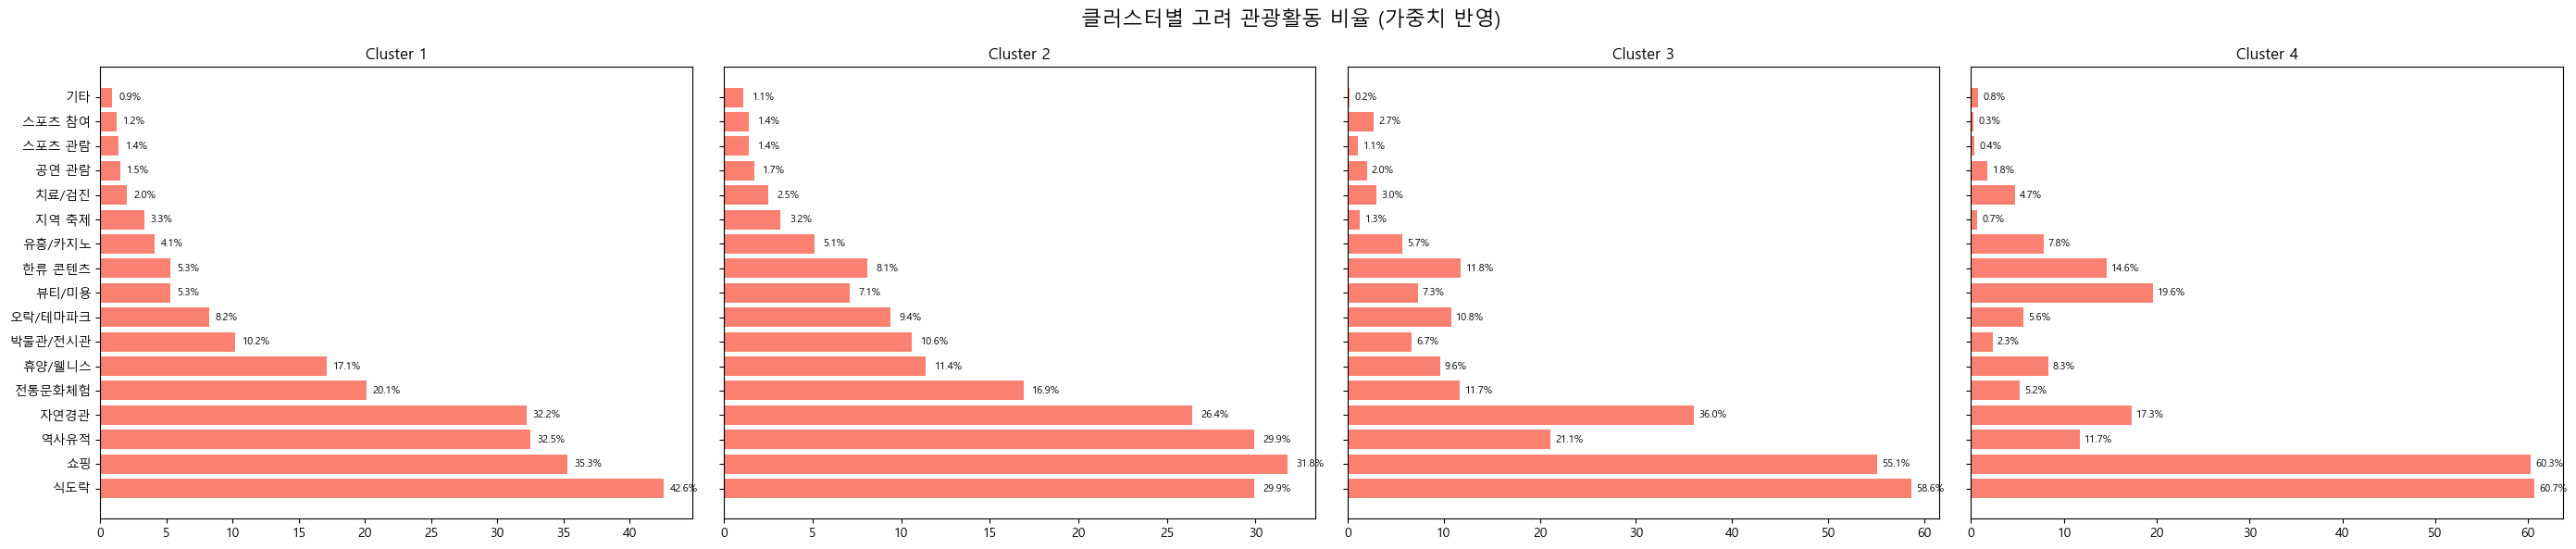

In [39]:
fig, axs = plt.subplots(1, len(clusters), figsize=(28, 6), sharey=True)

for i, (cluster_name, country_codes) in enumerate(clusters.items()):
    sub_df = df[df['D_NAT'].isin(country_codes)].copy()
    total_weight = sub_df['weight'].sum()

    activity_weights = defaultdict(float)

    for _, row in sub_df.iterrows():
        selected = [row[col] for col in q3_cols if pd.notnull(row[col])]
        for code in selected:
            if code in q3_activity_map:
                activity_weights[q3_activity_map[code]] += row['weight']

    ratio_series = pd.Series(activity_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='salmon')
    axs[i].set_title(cluster_name)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.5, y, f"{width:.1f}%", va='center', ha='left', fontsize=8)

plt.suptitle('클러스터별 고려 관광활동 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


#### 결과

식도락 비율이 가장 높고, 다른 클러스터와 비교했을 때 큰 차이점 없음.

## 10. 고려한 관광 인프라

`Q3_2a1` ~ `Q3_2a3`

In [40]:
from collections import defaultdict

q3_infra_map = {
    1: '출입국 절차',
    2: '언어소통',
    3: '치안',
    4: '경제적 경비',
    5: '숙박 시설',
    6: '대중교통',
    7: '의료/질병관리',
    8: '길찾기',
    9: '관광 안내',
    10: '모바일/인터넷',
    11: '디지털 정보',
    12: '기타'
}

q3_infra_cols = ['Q3_2a1', 'Q3_2a2', 'Q3_2a3']


### (1) 클러스터1 국가별

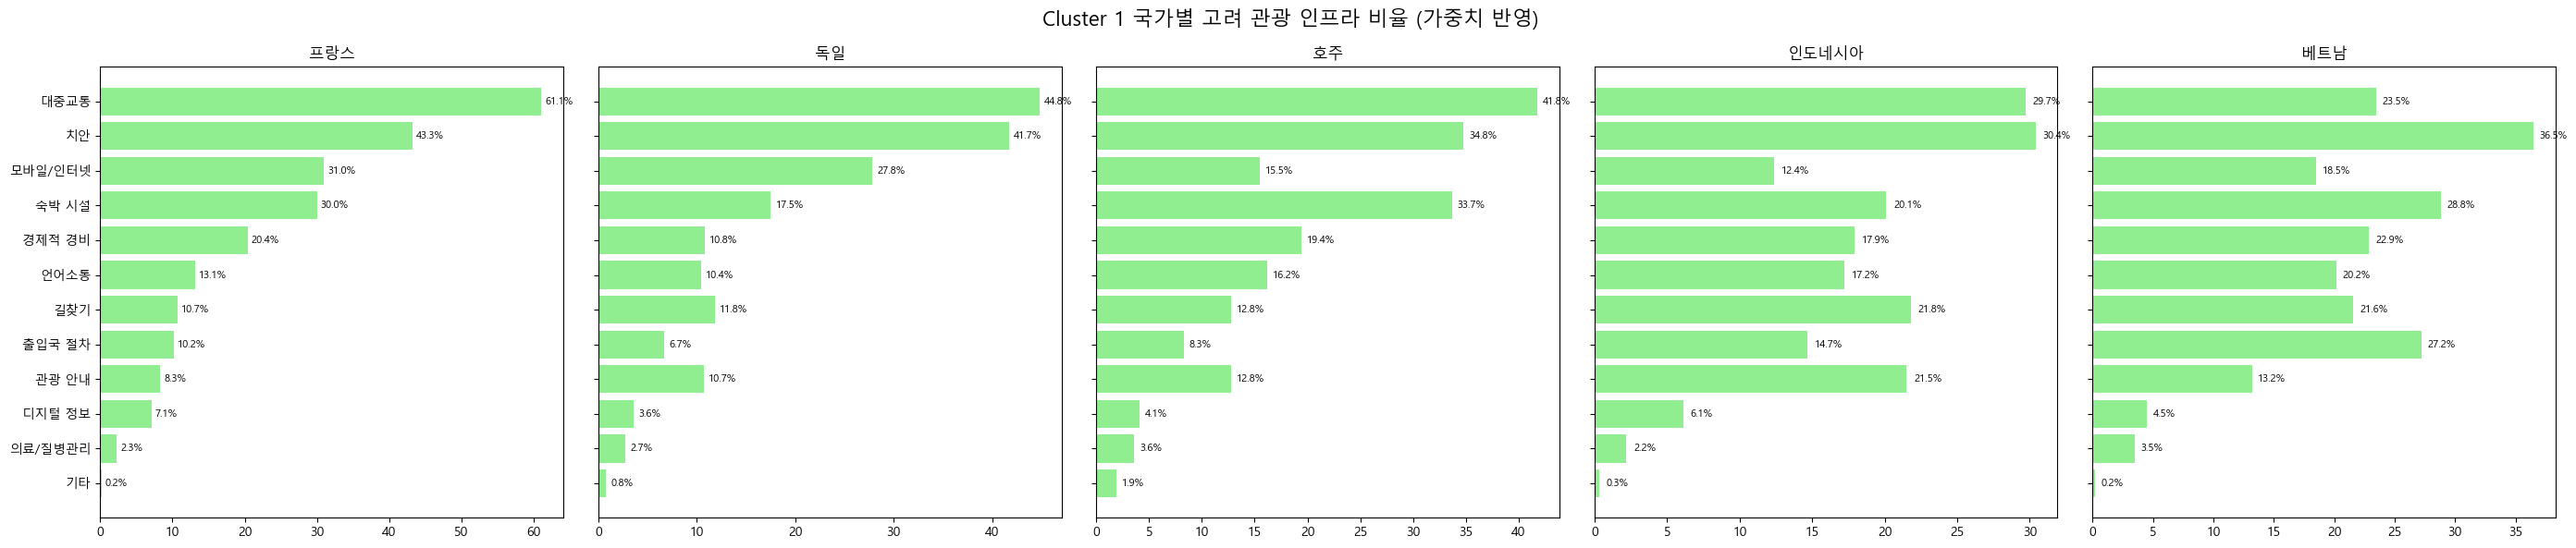

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

df_cluster1 = df[df['D_NAT'].isin(cluster1_codes.values())].copy()
df_cluster1['국가명'] = df_cluster1['D_NAT'].map({v: k for k, v in cluster1_codes.items()})

fig, axs = plt.subplots(1, len(cluster1_codes), figsize=(28, 6), sharey=True)

for i, country in enumerate(cluster1_codes.keys()):
    sub_df = df_cluster1[df_cluster1['국가명'] == country]
    total_weight = sub_df['weight'].sum()

    infra_weights = defaultdict(float)

    for _, row in sub_df.iterrows():
        selected = [row[col] for col in q3_infra_cols if pd.notnull(row[col])]
        for code in selected:
            if code in q3_infra_map:
                infra_weights[q3_infra_map[code]] += row['weight']

    ratio_series = pd.Series(infra_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='lightgreen')
    axs[i].set_title(country)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.5, y, f"{width:.1f}%", va='center', ha='left', fontsize=8)

plt.suptitle('Cluster 1 국가별 고려 관광 인프라 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


### 결과

아무래도 이동수단인 대중교통을 대체로 많이 고려하는 모습

### (2) 클러스터별

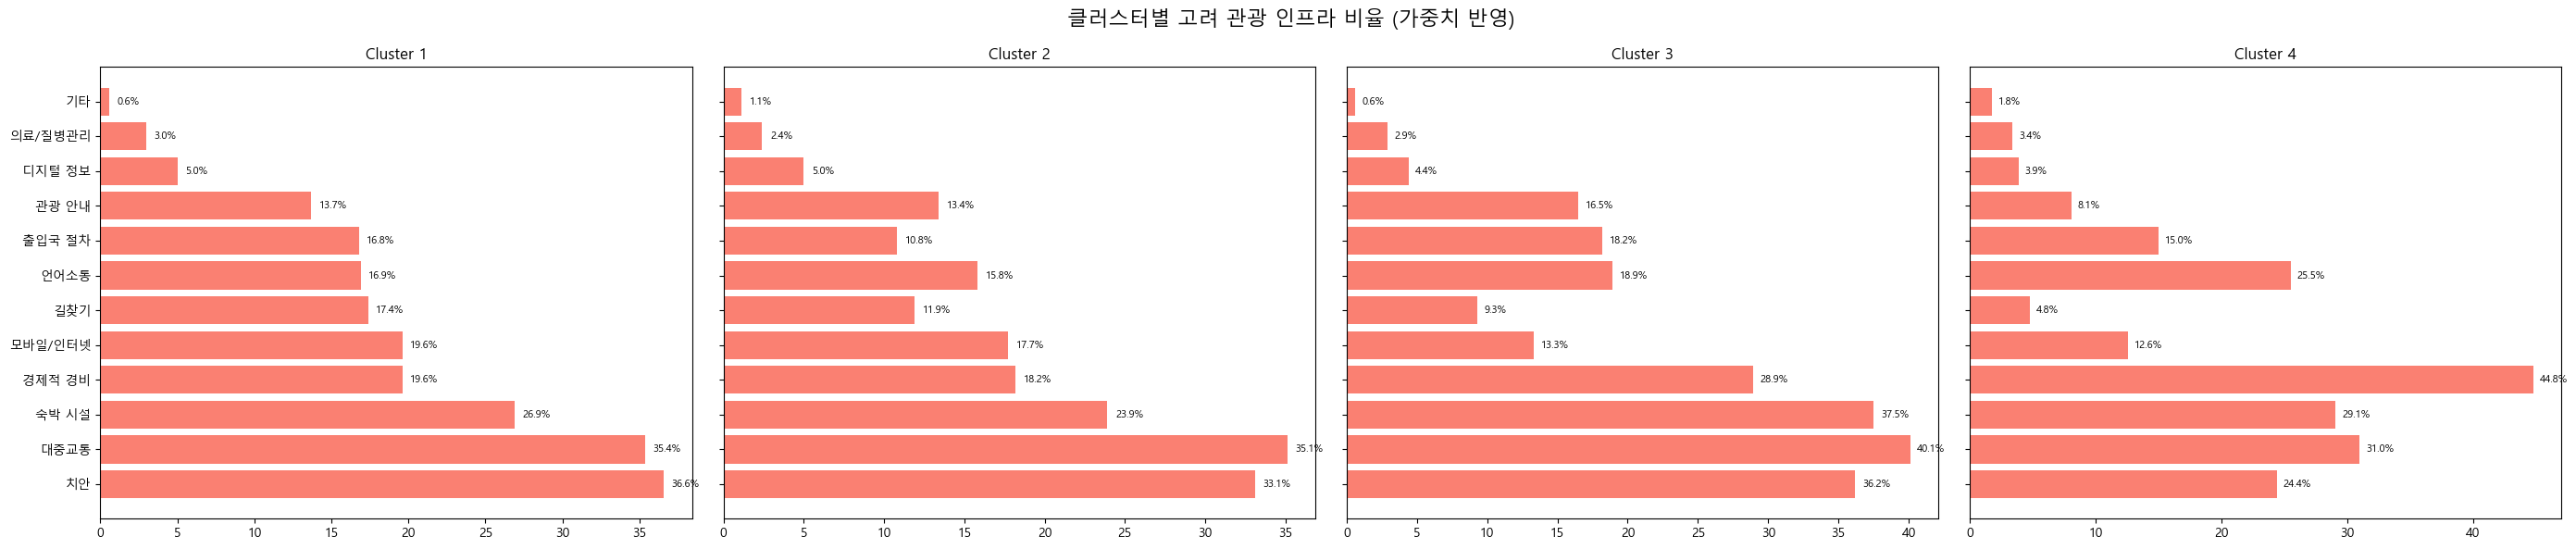

In [42]:
fig, axs = plt.subplots(1, len(clusters), figsize=(28, 6), sharey=True)

for i, (cluster_name, country_codes) in enumerate(clusters.items()):
    sub_df = df[df['D_NAT'].isin(country_codes)].copy()
    total_weight = sub_df['weight'].sum()

    infra_weights = defaultdict(float)

    for _, row in sub_df.iterrows():
        selected = [row[col] for col in q3_infra_cols if pd.notnull(row[col])]
        for code in selected:
            if code in q3_infra_map:
                infra_weights[q3_infra_map[code]] += row['weight']

    ratio_series = pd.Series(infra_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='salmon')
    axs[i].set_title(cluster_name)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.5, y, f"{width:.1f}%", va='center', ha='left', fontsize=8)

plt.suptitle('클러스터별 고려 관광 인프라 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


### 결과

대중교통과 치안이 가장 중요한 요소로 작용. 다음으로는 숙박시설인걸로 보아 위생 및 편의성을 챙기려는 것 같음.

## 11. 여행 전 한국 관련 정보 수집 경로

In [48]:
q4_source_map = {
    1: '인터넷/앱',
    2: '자국 여행사',
    3: '언론매체',
    4: '친지/동료',
    5: '관광 안내서적',
    6: '항공사/호텔',
    7: '한국 공공기관',
    8: '기타',
    9: '정보 없음'
}

q4_source_cols = ['Q4a1', 'Q4a2', 'Q4a3']


### (1) 클러스터1 국가별

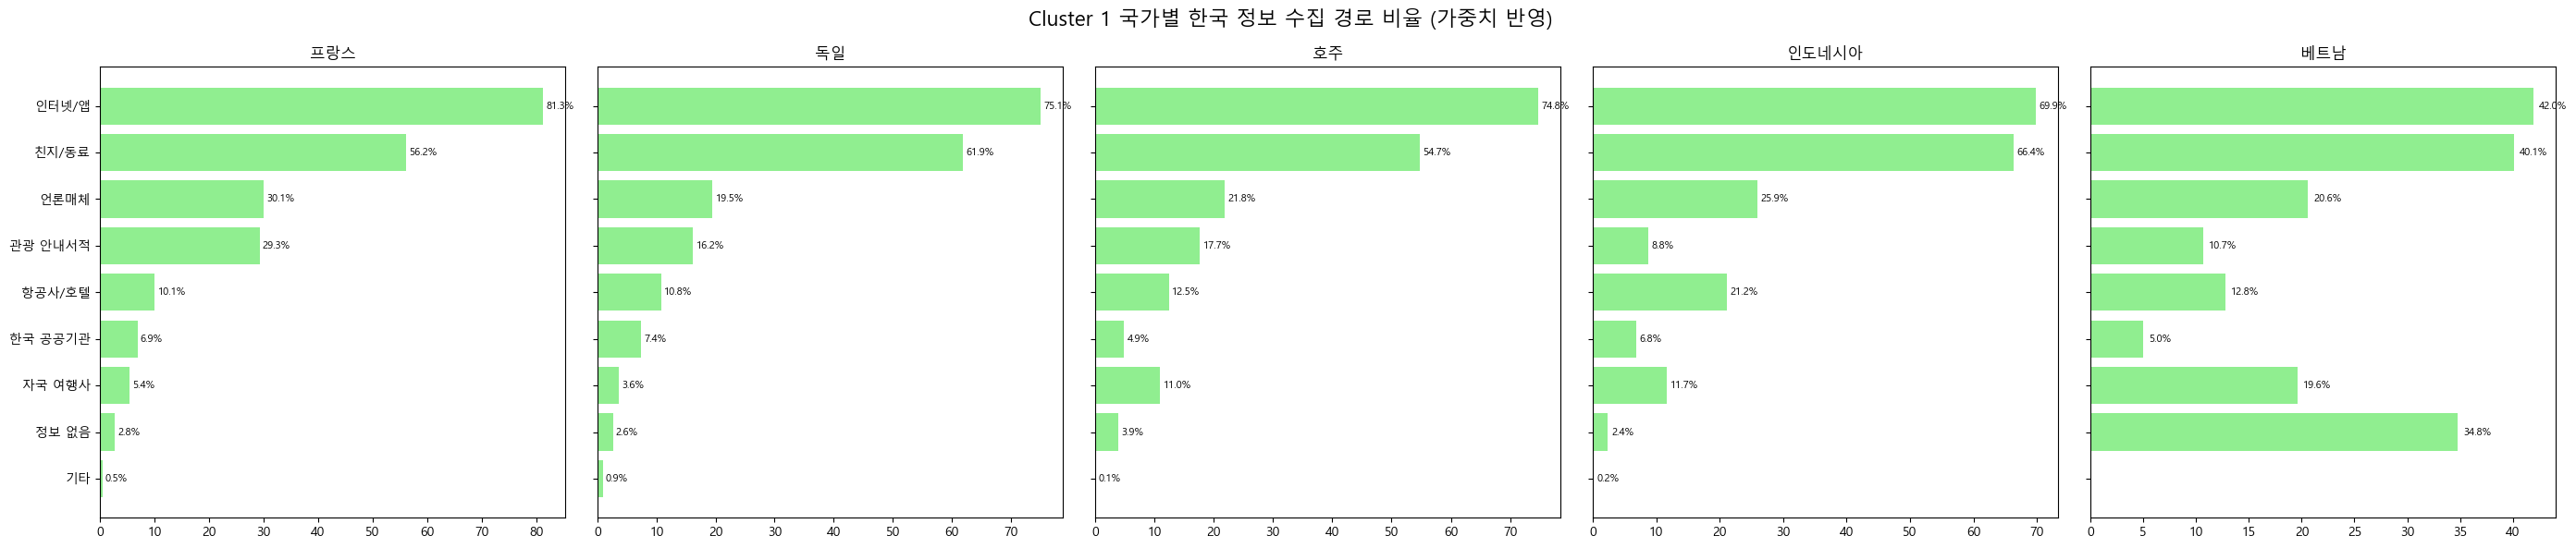

In [49]:
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

df_cluster1 = df[df['D_NAT'].isin(cluster1_codes.values())].copy()
df_cluster1['국가명'] = df_cluster1['D_NAT'].map({v: k for k, v in cluster1_codes.items()})

fig, axs = plt.subplots(1, len(cluster1_codes), figsize=(28, 6), sharey=True)

for i, country in enumerate(cluster1_codes.keys()):
    sub_df = df_cluster1[df_cluster1['국가명'] == country]
    total_weight = sub_df['weight'].sum()

    source_weights = defaultdict(float)

    for _, row in sub_df.iterrows():
        # 정보 없음
        if row.get('Q4a_dk') == 9:
            source_weights['정보 없음'] += row['weight']
        else:
            selected = [row[col] for col in q4_source_cols if pd.notnull(row[col])]
            for code in selected:
                if code in q4_source_map:
                    source_weights[q4_source_map[code]] += row['weight']

    ratio_series = pd.Series(source_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='lightgreen')
    axs[i].set_title(country)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.5, y, f"{width:.1f}%", va='center', ha='left', fontsize=8)

plt.suptitle('Cluster 1 국가별 한국 정보 수집 경로 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


#### 결과

대체로 인터넷을 통해서 정보를 얻는 모습

#### 특이한 점

베트남이 정보없이 그냥 오는 경우가 3등임. 뭘까..?

### (2) 클러스터별

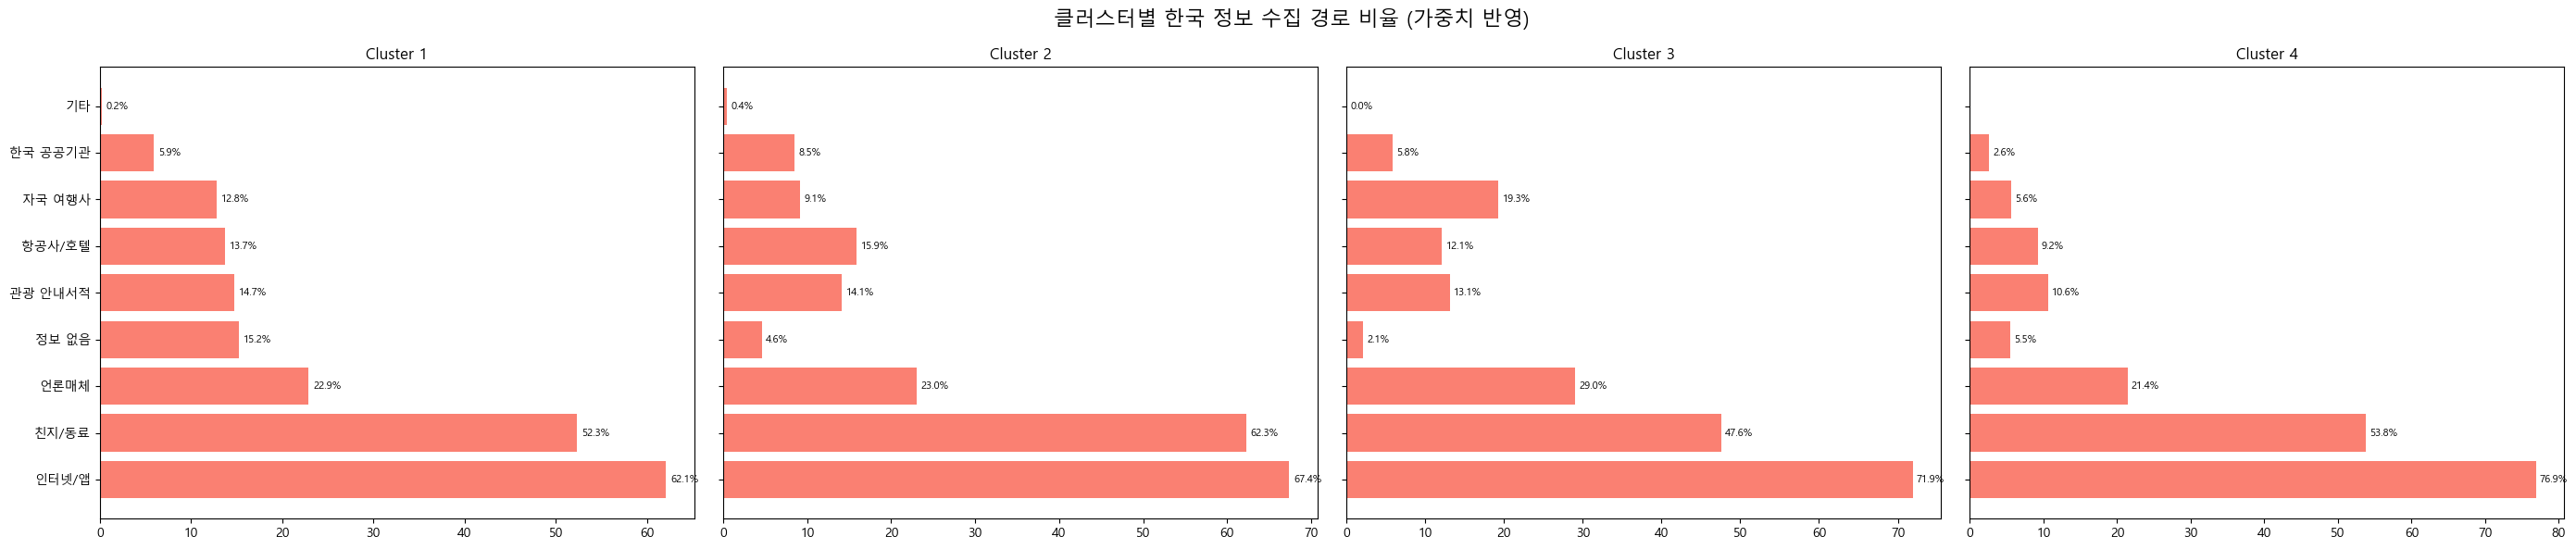

In [50]:
fig, axs = plt.subplots(1, len(clusters), figsize=(28, 6), sharey=True)

for i, (cluster_name, country_codes) in enumerate(clusters.items()):
    sub_df = df[df['D_NAT'].isin(country_codes)].copy()
    total_weight = sub_df['weight'].sum()

    source_weights = defaultdict(float)

    for _, row in sub_df.iterrows():
        if row.get('Q4a_dk') == 9:
            source_weights['정보 없음'] += row['weight']
        else:
            selected = [row[col] for col in q4_source_cols if pd.notnull(row[col])]
            for code in selected:
                if code in q4_source_map:
                    source_weights[q4_source_map[code]] += row['weight']

    ratio_series = pd.Series(source_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='salmon')
    axs[i].set_title(cluster_name)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.5, y, f"{width:.1f}%", va='center', ha='left', fontsize=8)

plt.suptitle('클러스터별 한국 정보 수집 경로 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


### 결과

인터넷을 통한 정보 습득이 특이한 점은 아님.

#### 특이한 점

정보 없이 오는 비율이 다른 클러스터에 비해 높은데 아마 베트남 때문인듯?? 

베트남이 가족 보러 많이 온다 했는데 그 영향도 있어보여서 나중에 검정해봐야겟다

## 12. 주로 이용한 사이트

## 13. 부족했던 정보 

In [51]:
from collections import defaultdict

q4_lack_map = {
    1: '방문지 정보',
    2: '교통정보',
    3: '음식/맛집',
    4: '쇼핑 정보',
    5: '숙박 정보',
    6: '축제/행사',
    7: '한류 체험 정보',
    8: '금융 정보',
    9: '통신 정보',
    10: '기타',
    11: '없음'
}

q4_lack_cols = ['Q4_2a1', 'Q4_2a2', 'Q4_2a3']


### (1) 클러스터1 국가별

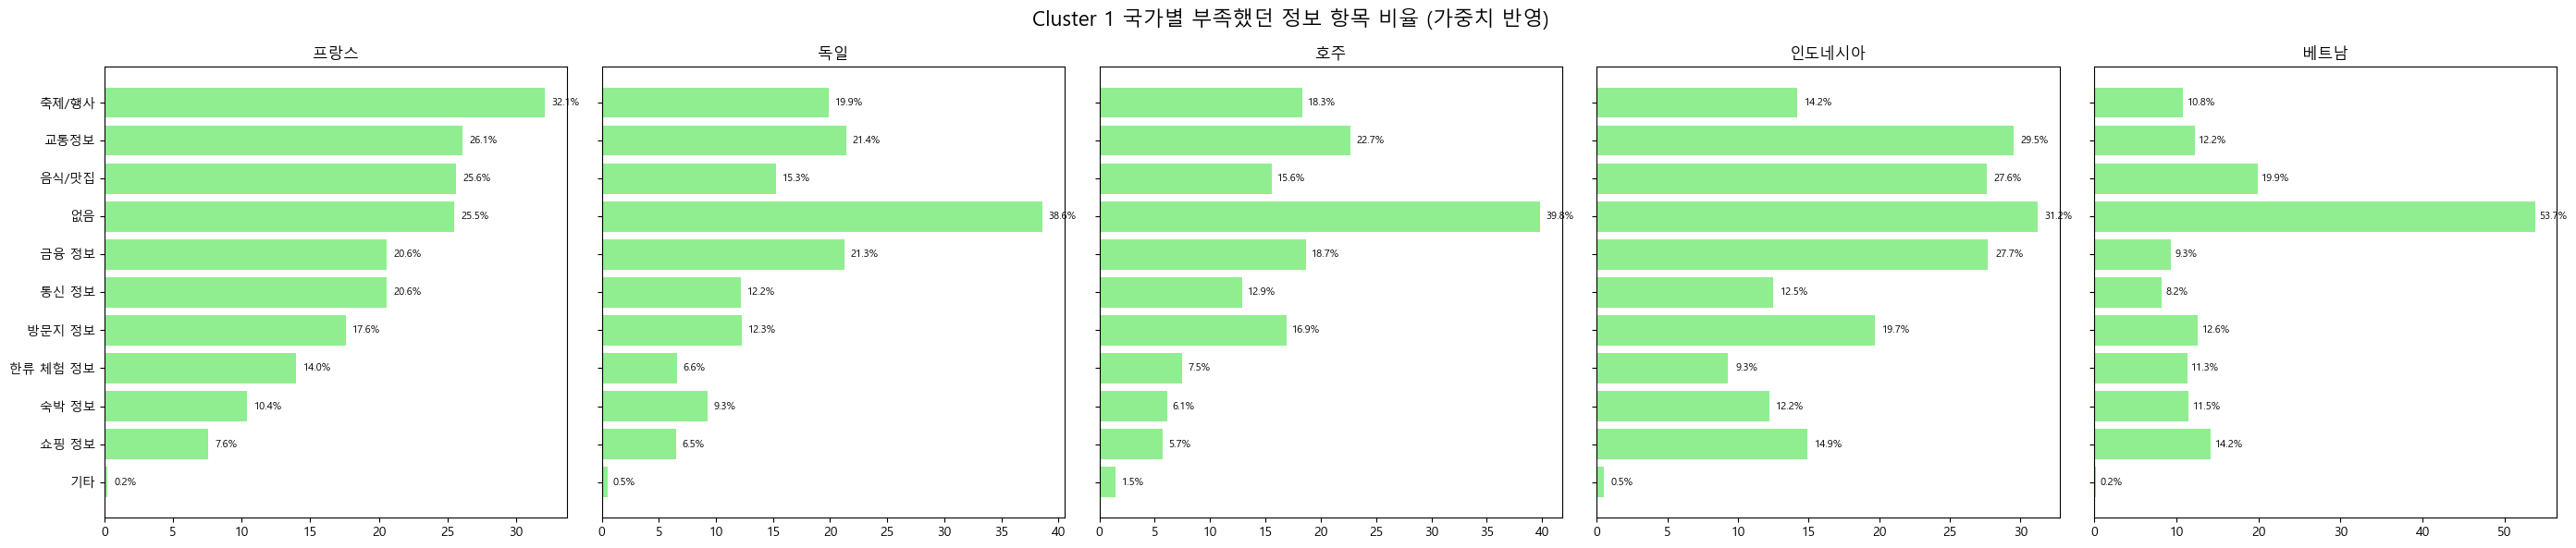

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

df_cluster1 = df[df['D_NAT'].isin(cluster1_codes.values())].copy()
df_cluster1['국가명'] = df_cluster1['D_NAT'].map({v: k for k, v in cluster1_codes.items()})

fig, axs = plt.subplots(1, len(cluster1_codes), figsize=(28, 6), sharey=True)

for i, country in enumerate(cluster1_codes.keys()):
    sub_df = df_cluster1[df_cluster1['국가명'] == country]
    total_weight = sub_df['weight'].sum()

    lack_weights = defaultdict(float)

    for _, row in sub_df.iterrows():
        # 정보 없음
        if row.get('Q4_2a_dk') == 11:
            lack_weights['없음'] += row['weight']
        else:
            selected = [row[col] for col in q4_lack_cols if pd.notnull(row[col])]
            for code in selected:
                if code in q4_lack_map:
                    lack_weights[q4_lack_map[code]] += row['weight']

    ratio_series = pd.Series(lack_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='lightgreen')
    axs[i].set_title(country)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.5, y, f"{width:.1f}%", va='center', ha='left', fontsize=8)

plt.suptitle('Cluster 1 국가별 부족했던 정보 항목 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


#### 특이한 점

이 부분은 나라별로 되게 다양함.

프랑스 외 국가들은 없다가 1등. 프랑스는 축제/행사데 대한 비율이 1등.

베트남은 없다가 압도적 1등

### (2) 클러스터별

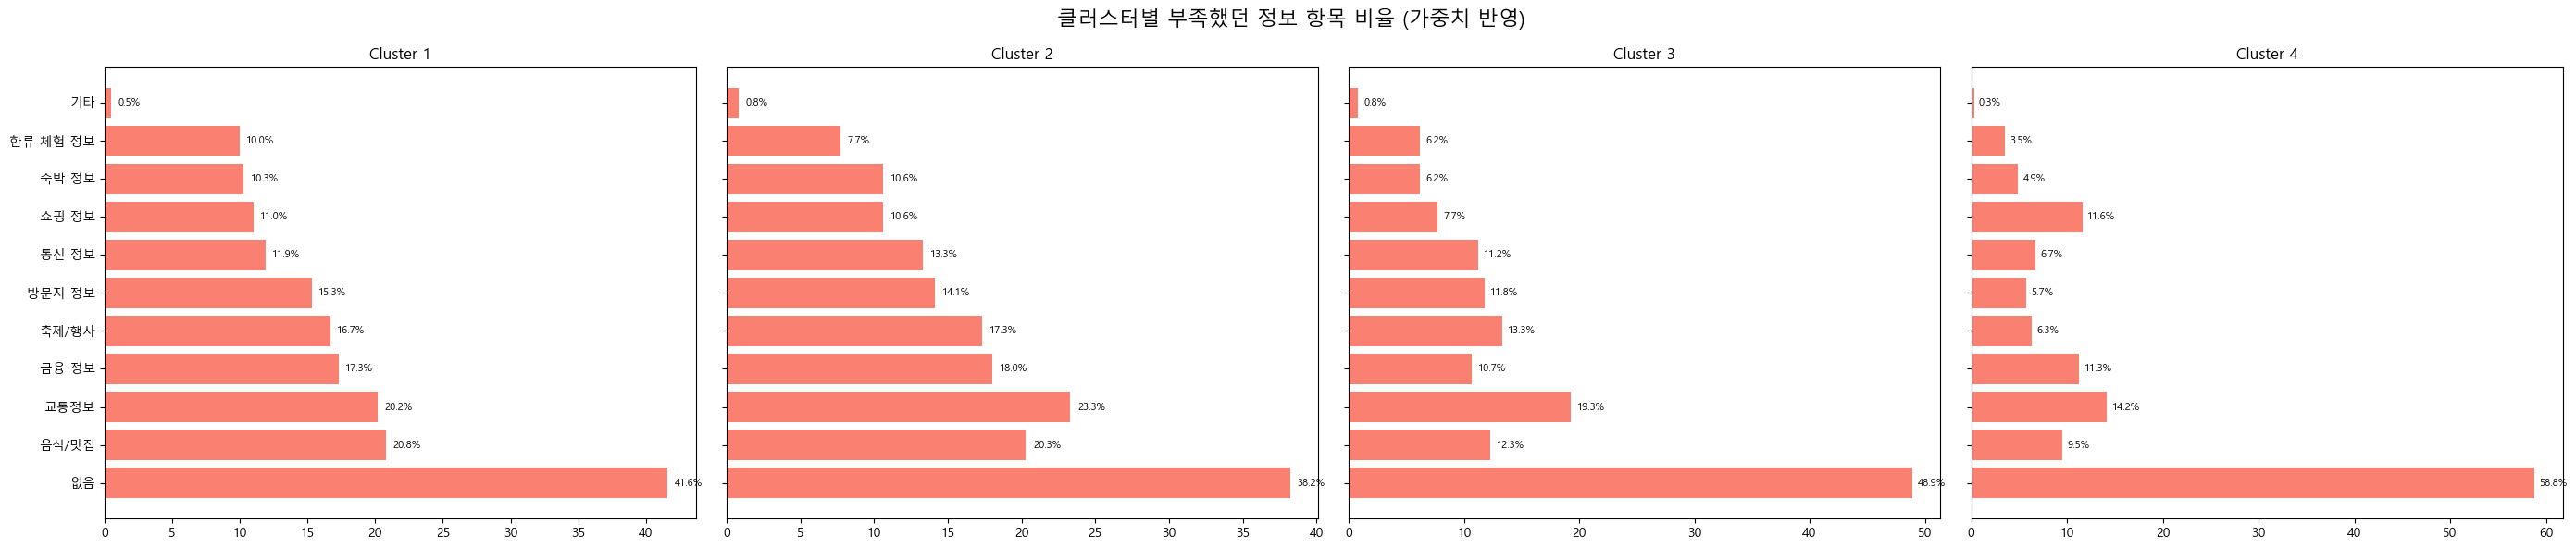

In [53]:
fig, axs = plt.subplots(1, len(clusters), figsize=(28, 6), sharey=True)

for i, (cluster_name, country_codes) in enumerate(clusters.items()):
    sub_df = df[df['D_NAT'].isin(country_codes)].copy()
    total_weight = sub_df['weight'].sum()

    lack_weights = defaultdict(float)

    for _, row in sub_df.iterrows():
        if row.get('Q4_2a_dk') == 11:
            lack_weights['없음'] += row['weight']
        else:
            selected = [row[col] for col in q4_lack_cols if pd.notnull(row[col])]
            for code in selected:
                if code in q4_lack_map:
                    lack_weights[q4_lack_map[code]] += row['weight']

    ratio_series = pd.Series(lack_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='salmon')
    axs[i].set_title(cluster_name)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.5, y, f"{width:.1f}%", va='center', ha='left', fontsize=8)

plt.suptitle('클러스터별 부족했던 정보 항목 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


#### 결과

없다가 많은게 일반적인 특징. 

프랑스와 인도네시아를 위주로 부족했던 정보를 정리하고 이를 개선하면 좋을듯함.

##  14. 왕복 항공권 및 여행상품 예약 시기

## 15.  개별 예약 항목

In [54]:
from collections import defaultdict

q5_booking_map = {
    1: '숙박시설',
    2: '관광지 예약',
    3: '렌터카',
    4: '철도',
    5: '국내 항공권',
    6: '체험 상품',
    7: '공연/티켓',
    8: '식당',
    9: '단기/일일투어',
    10: '기타',
    99: '없음'
}

# 컬럼명 리스트
q5_cols = [col for col in df.columns if col.startswith('Q5_1a') and col != 'Q5_1a_dk']


### (1) 클러스터1 국가별

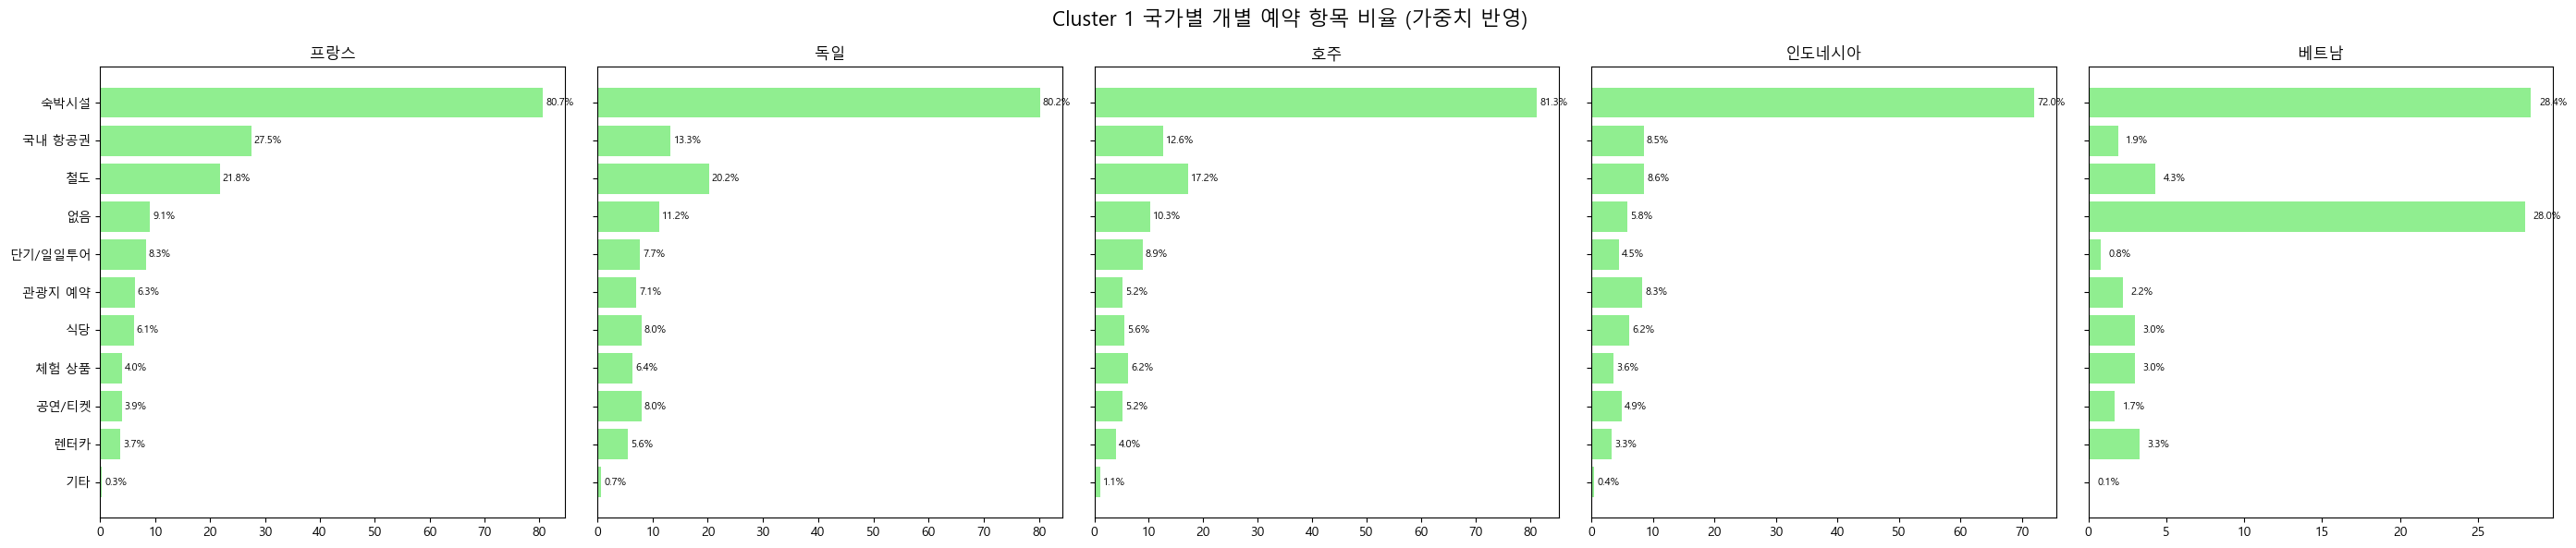

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

df_cluster1 = df[df['D_NAT'].isin(cluster1_codes.values())].copy()
df_cluster1['국가명'] = df_cluster1['D_NAT'].map({v: k for k, v in cluster1_codes.items()})

fig, axs = plt.subplots(1, len(cluster1_codes), figsize=(28, 6), sharey=True)

for i, country in enumerate(cluster1_codes.keys()):
    sub_df = df_cluster1[df_cluster1['국가명'] == country]
    total_weight = sub_df['weight'].sum()

    booking_weights = defaultdict(float)

    for _, row in sub_df.iterrows():
        # '없음' 처리
        if row.get('Q5_1a_dk') == 99:
            booking_weights['없음'] += row['weight']
        else:
            selected = [row[col] for col in q5_cols if pd.notnull(row[col])]
            for code in selected:
                if code in q5_booking_map:
                    booking_weights[q5_booking_map[code]] += row['weight']

    ratio_series = pd.Series(booking_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='lightgreen')
    axs[i].set_title(country)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.5, y, f"{width:.1f}%", va='center', ha='left', fontsize=8)

plt.suptitle('Cluster 1 국가별 개별 예약 항목 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


### 결과

숙박 시설이 가장 높은 비율. 해외여행이니 당연슨 ~

베트남은 가족 방문 비율이 높아서 그런지 없을 비율과 숙박시설 비율이 거의 같음. 이것도 검정 필요

### (2) 클러스터별

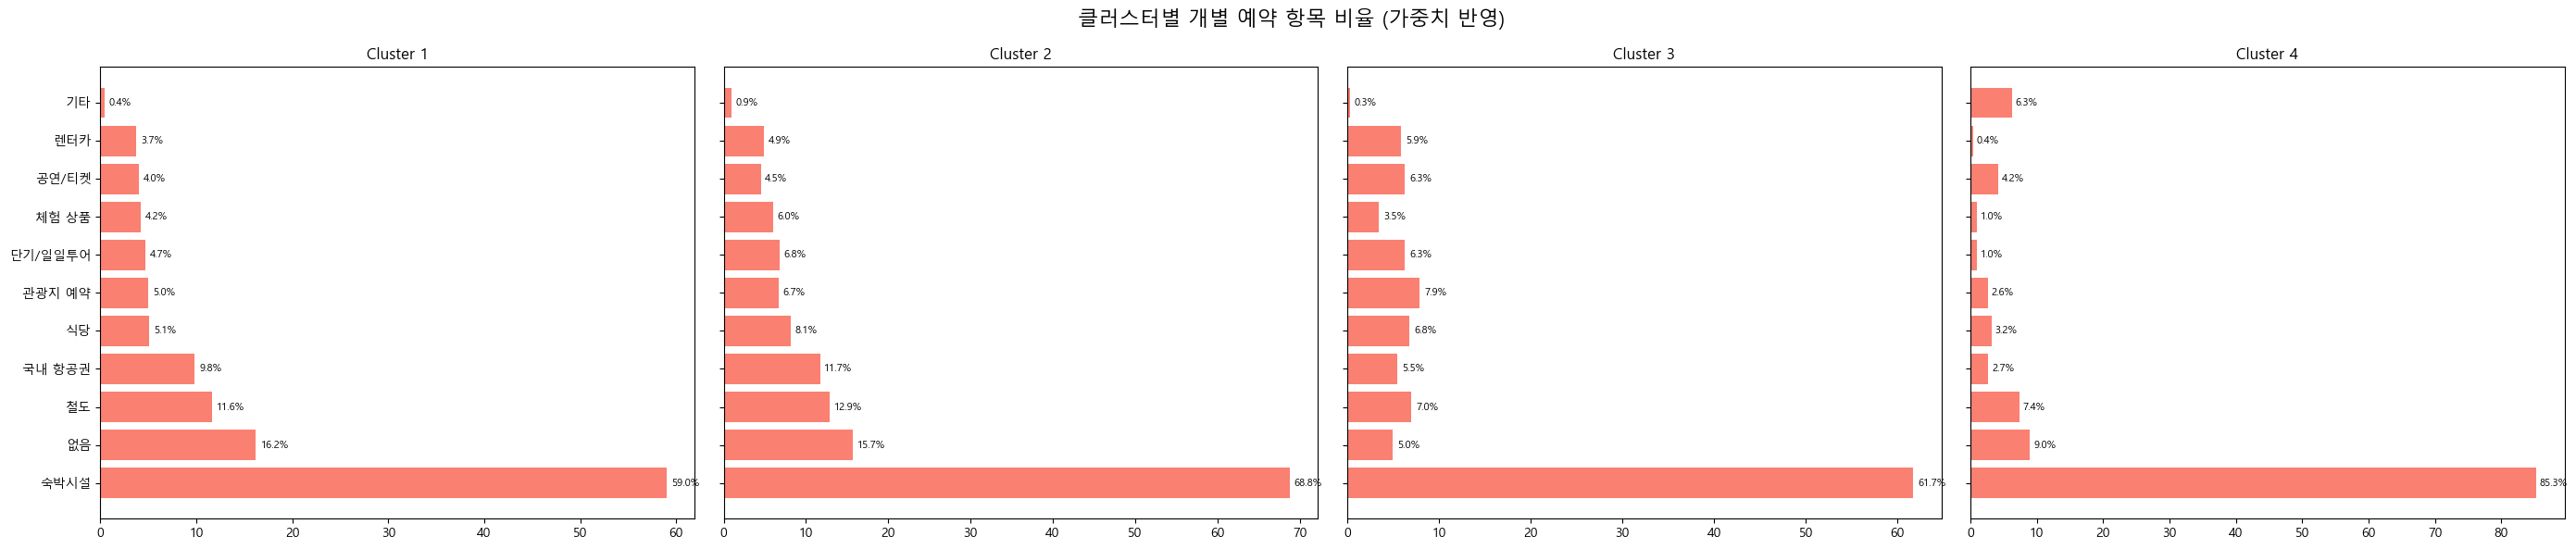

In [56]:
fig, axs = plt.subplots(1, len(clusters), figsize=(28, 6), sharey=True)

for i, (cluster_name, country_codes) in enumerate(clusters.items()):
    sub_df = df[df['D_NAT'].isin(country_codes)].copy()
    total_weight = sub_df['weight'].sum()

    booking_weights = defaultdict(float)

    for _, row in sub_df.iterrows():
        if row.get('Q5_1a_dk') == 99:
            booking_weights['없음'] += row['weight']
        else:
            selected = [row[col] for col in q5_cols if pd.notnull(row[col])]
            for code in selected:
                if code in q5_booking_map:
                    booking_weights[q5_booking_map[code]] += row['weight']

    ratio_series = pd.Series(booking_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='salmon')
    axs[i].set_title(cluster_name)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.5, y, f"{width:.1f}%", va='center', ha='left', fontsize=8)

plt.suptitle('클러스터별 개별 예약 항목 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


### 결과

숙박시설 비율이 높은게 일반적인 모습

## 16. 동반자 유무

### (1) 클러스터1 국가별

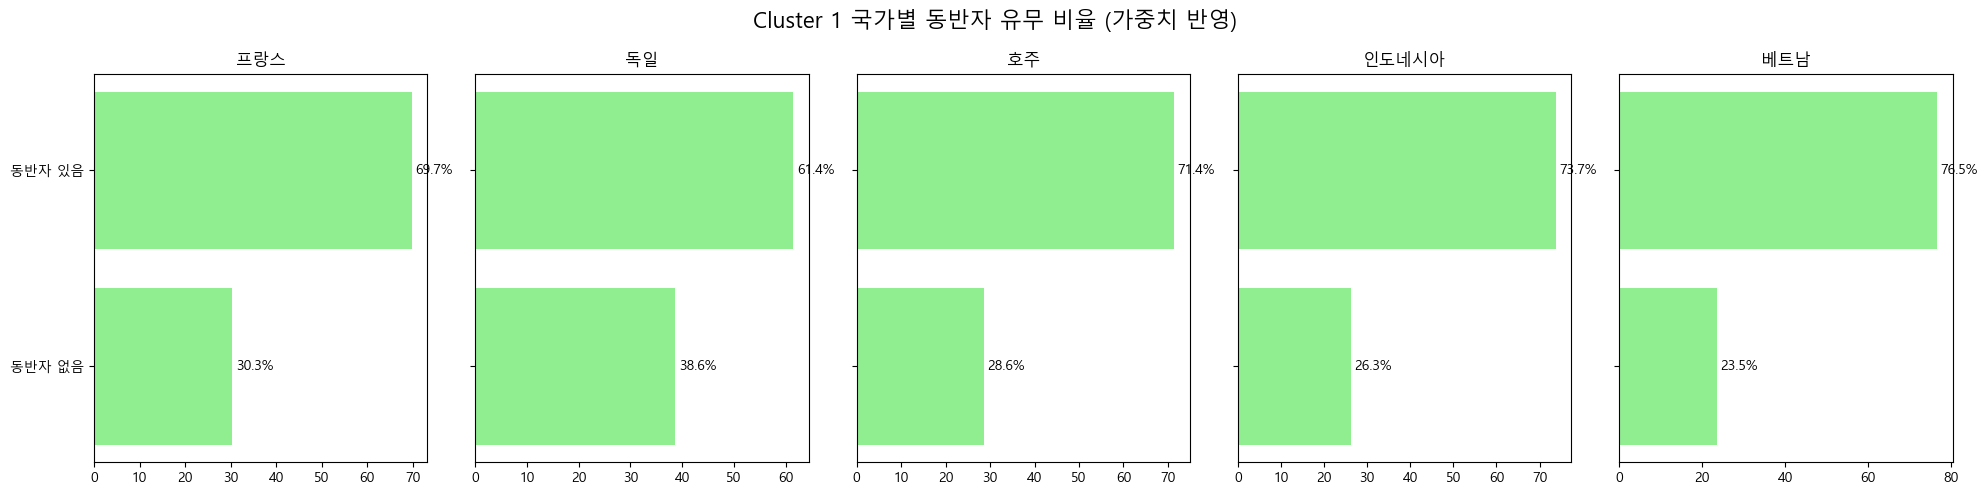

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

# 동반자 유무 매핑
companion_map = {1: '동반자 없음', 2: '동반자 있음'}

# 데이터 필터링
df_cluster1 = df[df['D_NAT'].isin(cluster1_codes.values())].copy()
df_cluster1['국가명'] = df_cluster1['D_NAT'].map({v: k for k, v in cluster1_codes.items()})
df_cluster1['동반자유무'] = df_cluster1['Q7A'].map(companion_map)

# 시각화
fig, axs = plt.subplots(1, len(cluster1_codes), figsize=(20, 5), sharey=True)

for i, country in enumerate(cluster1_codes.keys()):
    sub_df = df_cluster1[df_cluster1['국가명'] == country]
    total_weight = sub_df['weight'].sum()
    
    weighted = sub_df.groupby('동반자유무')['weight'].sum()
    ratio = (weighted / total_weight * 100).round(1).sort_values(ascending=False)

    bars = axs[i].barh(ratio.index, ratio.values, color='lightgreen')
    axs[i].set_title(country)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.8, y, f"{width:.1f}%", va='center', ha='left')

plt.suptitle('Cluster 1 국가별 동반자 유무 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


#### 결과

대체로 동반자가 있다. 70%~75% 사이로 차이도 크지 않은 편.

### (2) 클러스터별

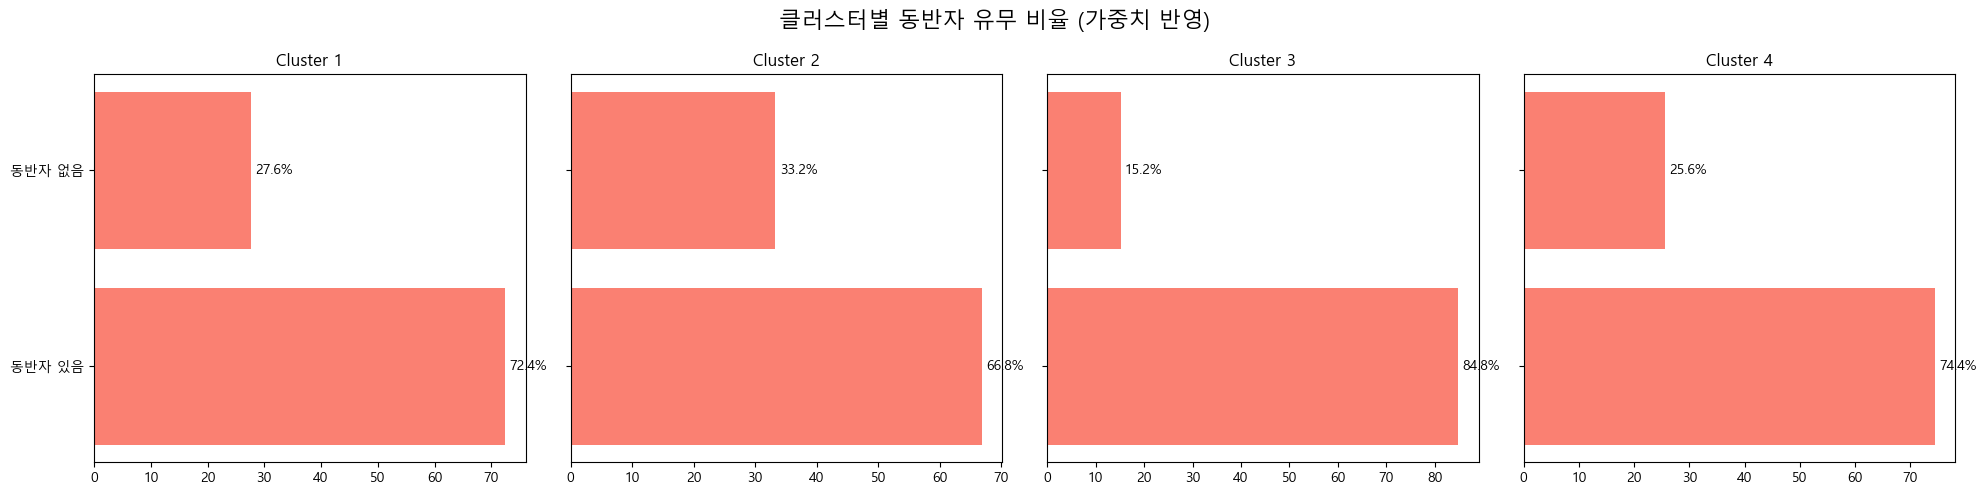

In [58]:
fig, axs = plt.subplots(1, len(clusters), figsize=(20, 5), sharey=True)

for i, (cluster_name, country_codes) in enumerate(clusters.items()):
    sub_df = df[df['D_NAT'].isin(country_codes)].copy()
    sub_df['동반자유무'] = sub_df['Q7A'].map(companion_map)
    total_weight = sub_df['weight'].sum()

    weighted = sub_df.groupby('동반자유무')['weight'].sum()
    ratio = (weighted / total_weight * 100).round(1).sort_values(ascending=False)

    bars = axs[i].barh(ratio.index, ratio.values, color='salmon')
    axs[i].set_title(cluster_name)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.8, y, f"{width:.1f}%", va='center', ha='left')

plt.suptitle('클러스터별 동반자 유무 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


#### 결과

동반자 있는게 일반적. 클러스터3은 유독 적네?

## 17. 동반자 유형

In [59]:
from collections import defaultdict

q7a_map = {
    2: '배우자/연인',
    3: '자녀',
    4: '부모',
    5: '형제자매',
    6: '친구/동료',
    7: '친지',
    8: '기타',
    1: '동반자 없음'  # Q7a_dk 전용
}

q7a_cols = ['Q7a2', 'Q7a3', 'Q7a4', 'Q7a5', 'Q7a6', 'Q7a7', 'Q7a8']


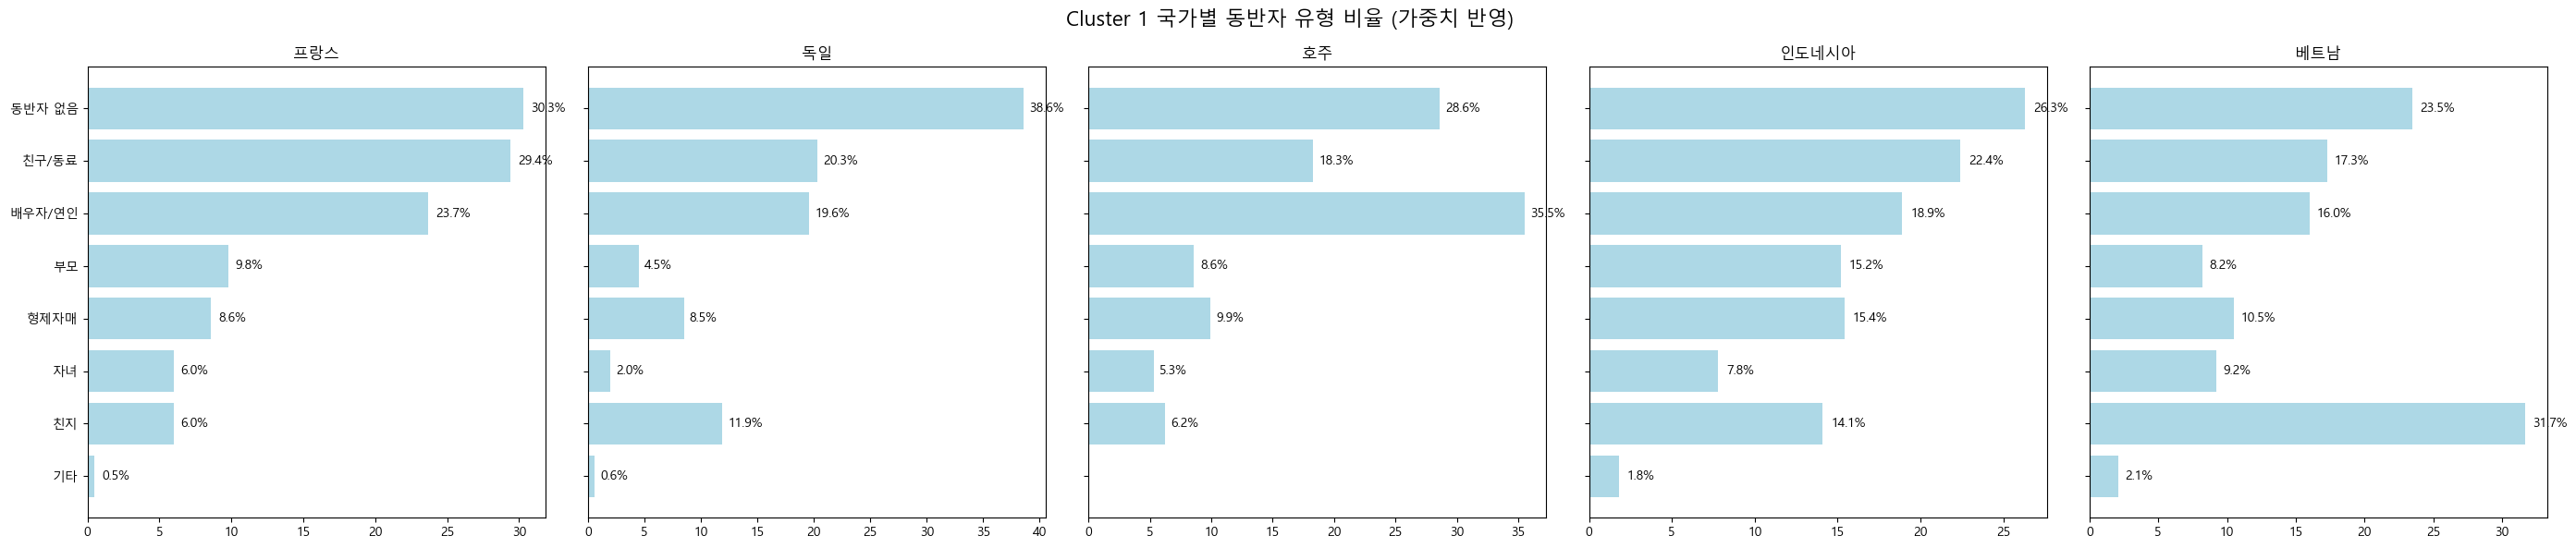

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

df_cluster1 = df[df['D_NAT'].isin(cluster1_codes.values())].copy()
df_cluster1['국가명'] = df_cluster1['D_NAT'].map({v: k for k, v in cluster1_codes.items()})

fig, axs = plt.subplots(1, len(cluster1_codes), figsize=(28, 6), sharey=True)

for i, country in enumerate(cluster1_codes.keys()):
    sub_df = df_cluster1[df_cluster1['국가명'] == country]
    total_weight = sub_df['weight'].sum()

    companion_weights = defaultdict(float)

    for _, row in sub_df.iterrows():
        # 혼자 온 경우
        if row.get('Q7a_dk') == 1:
            companion_weights['동반자 없음'] += row['weight']
        else:
            selected = [row[col] for col in q7a_cols if pd.notnull(row[col])]
            for code in selected:
                if code in q7a_map:
                    companion_weights[q7a_map[code]] += row['weight']

    ratio_series = pd.Series(companion_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='lightblue')
    axs[i].set_title(country)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.5, y, f"{width:.1f}%", va='center', ha='left')

plt.suptitle('Cluster 1 국가별 동반자 유형 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


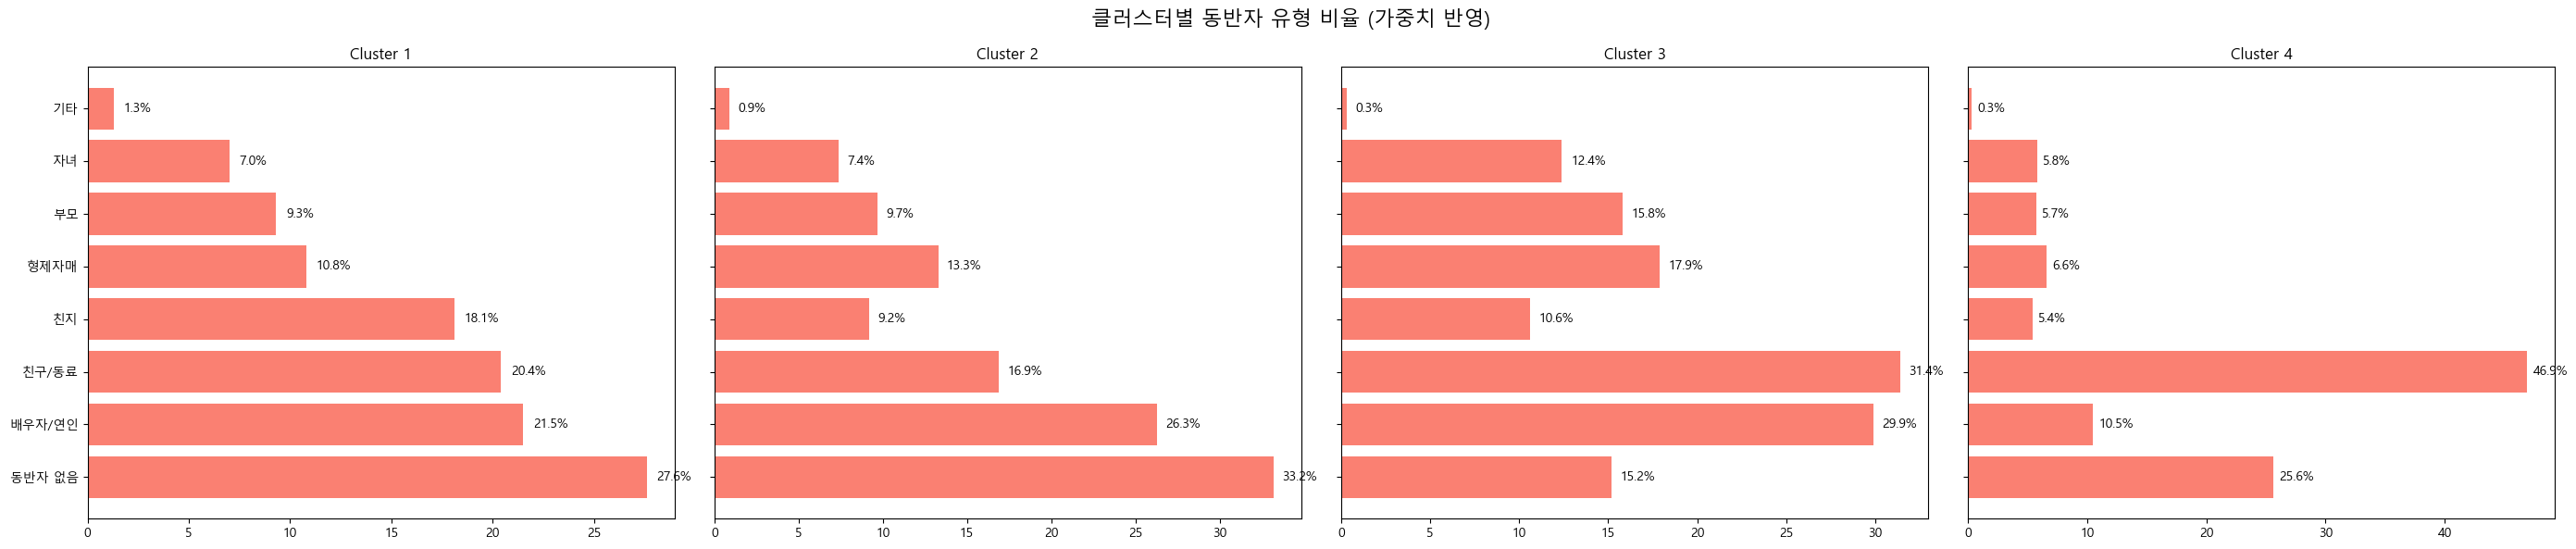

In [61]:
fig, axs = plt.subplots(1, len(clusters), figsize=(28, 6), sharey=True)

for i, (cluster_name, country_codes) in enumerate(clusters.items()):
    sub_df = df[df['D_NAT'].isin(country_codes)].copy()
    total_weight = sub_df['weight'].sum()

    companion_weights = defaultdict(float)

    for _, row in sub_df.iterrows():
        if row.get('Q7a_dk') == 1:
            companion_weights['동반자 없음'] += row['weight']
        else:
            selected = [row[col] for col in q7a_cols if pd.notnull(row[col])]
            for code in selected:
                if code in q7a_map:
                    companion_weights[q7a_map[code]] += row['weight']

    ratio_series = pd.Series(companion_weights).sort_values(ascending=False)
    ratio_series = (ratio_series / total_weight * 100).round(1)

    bars = axs[i].barh(ratio_series.index, ratio_series.values, color='salmon')
    axs[i].set_title(cluster_name)
    axs[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        axs[i].text(width + 0.5, y, f"{width:.1f}%", va='center', ha='left')

plt.suptitle('클러스터별 동반자 유형 비율 (가중치 반영)', fontsize=16)
plt.tight_layout()
plt.show()


## 18. 참여한 활동

In [63]:
# 참여활동 관련 변수 (Q8a01 ~ Q8a20)
activity_cols = [f"Q8a{str(i).zfill(2)}" for i in range(1, 21)]

# 활동 항목 매핑
activity_map = {
    1: "식도락", 2: "쇼핑", 3: "자연경관", 4: "휴양/휴식", 5: "고궁/역사유적",
    6: "전통문화", 7: "박물관/전시관", 8: "K-POP/촬영지", 9: "공연관람",
    10: "지역축제", 11: "유흥", 12: "오락", 13: "뷰티/미용", 14: "치료/건강",
    15: "스포츠관람", 16: "스포츠참가", 17: "국제회의", 18: "비즈니스",
    19: "연수/교육", 20: "기타"
}


### (1) 클러스터1 국가별

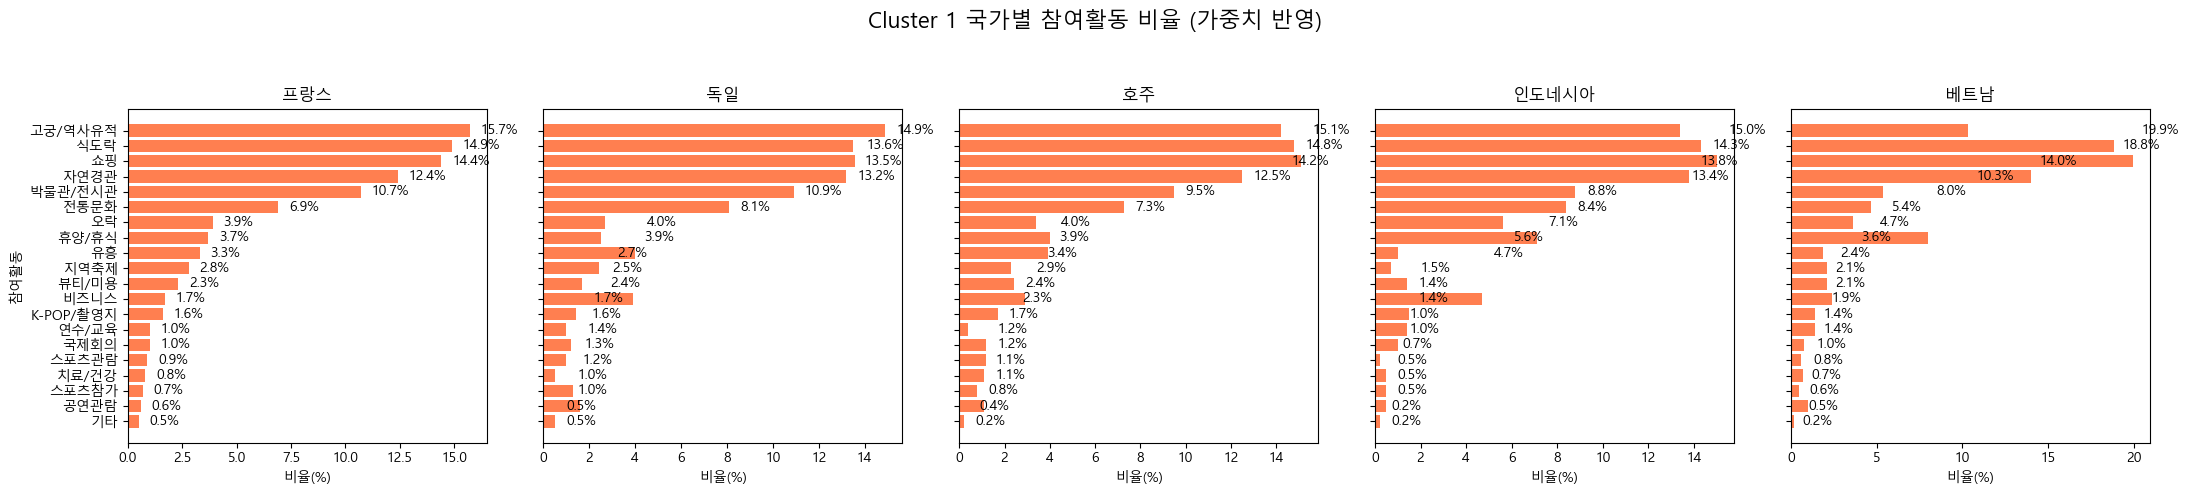

In [64]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(cluster1_codes), figsize=(22, 5), sharey=True)

for i, (country, code) in enumerate(cluster1_codes.items()):
    subset = df[df["D_NAT"] == code]
    melted = subset[activity_cols + ["weight"]].melt(id_vars="weight", value_name="activity").dropna()
    
    counts = melted.groupby("activity")["weight"].sum()
    rates = (counts / counts.sum() * 100).round(1)
    rates.index = rates.index.map(activity_map)
    rates = rates.sort_values()

    ax = axes[i]
    ax.barh(rates.index, rates.values, color="coral")
    for j, val in enumerate(rates.values):
        ax.text(val + 0.5, j, f"{val:.1f}%", va="center")
    
    ax.set_title(country)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("참여활동")
    else:
        ax.set_ylabel("")

plt.suptitle("Cluster 1 국가별 참여활동 비율 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


### 클러스터별

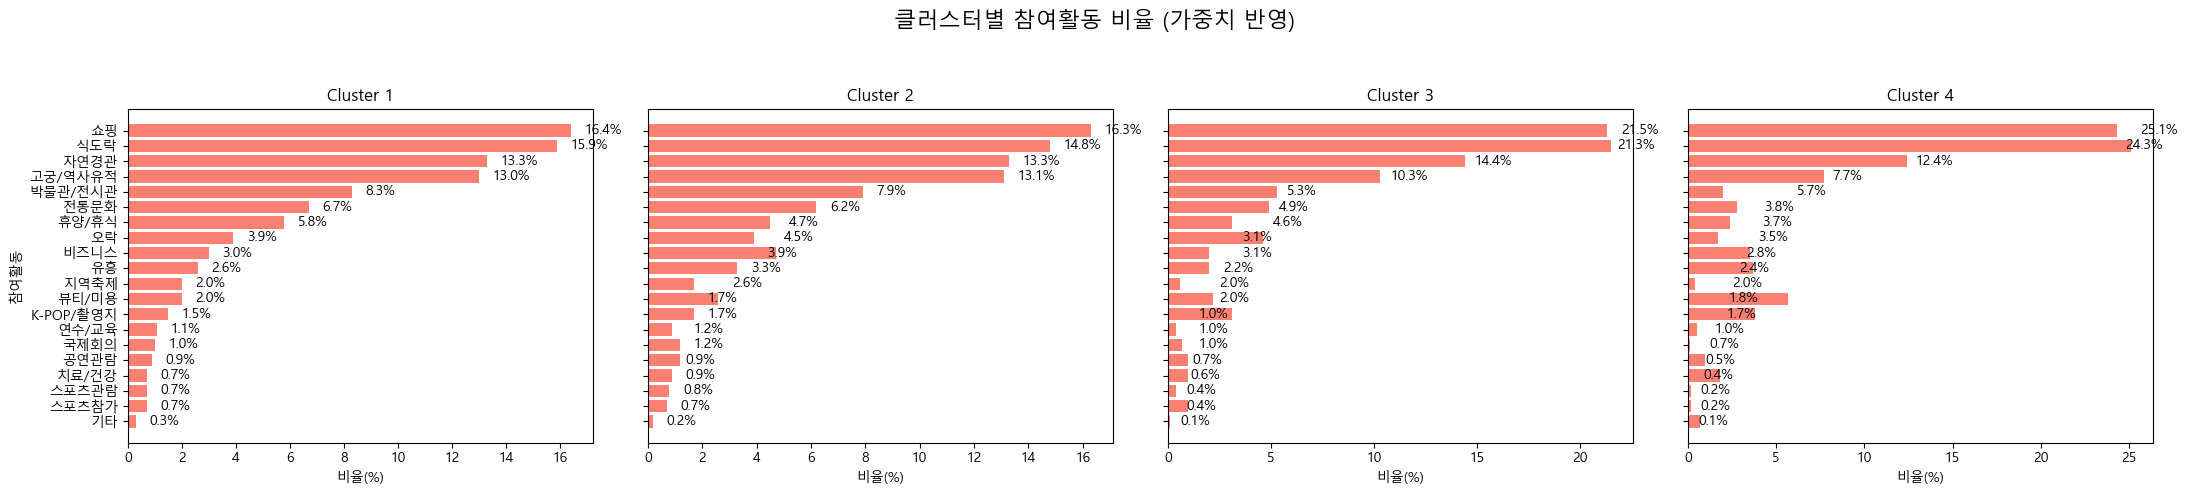

In [65]:
fig, axes = plt.subplots(1, len(clusters), figsize=(22, 5), sharey=True)

for i, (cluster_name, country_codes) in enumerate(clusters.items()):
    subset = df[df["D_NAT"].isin(country_codes)]
    melted = subset[activity_cols + ["weight"]].melt(id_vars="weight", value_name="activity").dropna()
    
    counts = melted.groupby("activity")["weight"].sum()
    rates = (counts / counts.sum() * 100).round(1)
    rates.index = rates.index.map(activity_map)
    rates = rates.sort_values()

    ax = axes[i]
    ax.barh(rates.index, rates.values, color="salmon")
    for j, val in enumerate(rates.values):
        ax.text(val + 0.5, j, f"{val:.1f}%", va="center")
    
    ax.set_title(cluster_name)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("참여활동")
    else:
        ax.set_ylabel("")

plt.suptitle("클러스터별 참여활동 비율 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


## 19. 만족한 활동

In [66]:
# 만족한 활동 변수
satisfaction_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 활동 항목 매핑 동일 (1~20)
activity_map = {
    1: "식도락", 2: "쇼핑", 3: "자연경관", 4: "휴양/휴식", 5: "고궁/역사유적",
    6: "전통문화", 7: "박물관/전시관", 8: "K-POP/촬영지", 9: "공연관람",
    10: "지역축제", 11: "유흥", 12: "오락", 13: "뷰티/미용", 14: "치료/건강",
    15: "스포츠관람", 16: "스포츠참가", 17: "국제회의", 18: "비즈니스",
    19: "연수/교육", 20: "기타"
}


### (1) 클러스터1 국가별

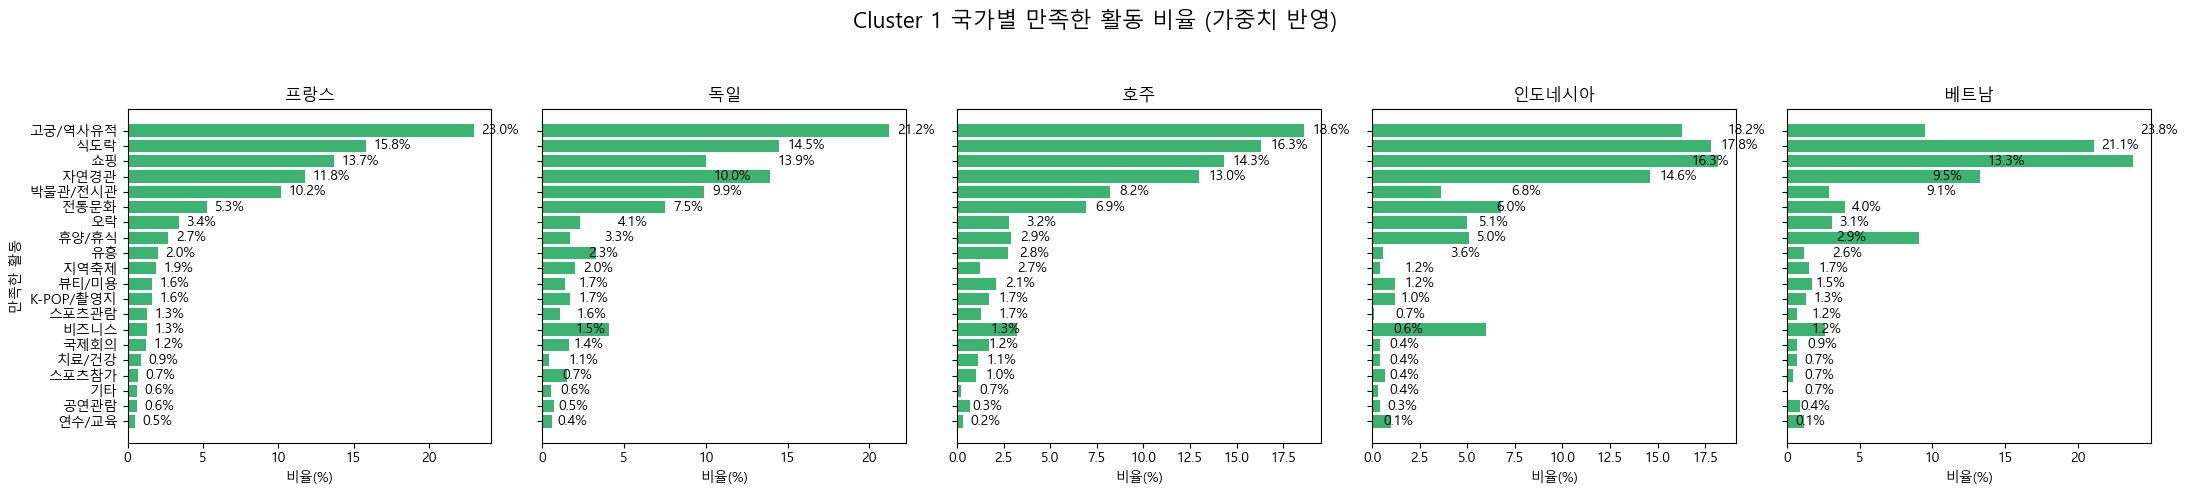

In [67]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(cluster1_codes), figsize=(22, 5), sharey=True)

for i, (country, code) in enumerate(cluster1_codes.items()):
    subset = df[df["D_NAT"] == code]
    melted = subset[satisfaction_cols + ["weight"]].melt(id_vars="weight", value_name="activity").dropna()

    counts = melted.groupby("activity")["weight"].sum()
    rates = (counts / counts.sum() * 100).round(1)
    rates.index = rates.index.map(activity_map)
    rates = rates.sort_values()

    ax = axes[i]
    ax.barh(rates.index, rates.values, color="mediumseagreen")
    for j, val in enumerate(rates.values):
        ax.text(val + 0.5, j, f"{val:.1f}%", va="center")
    
    ax.set_title(country)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("만족한 활동")
    else:
        ax.set_ylabel("")

plt.suptitle("Cluster 1 국가별 만족한 활동 비율 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


### (2) 클러스터별

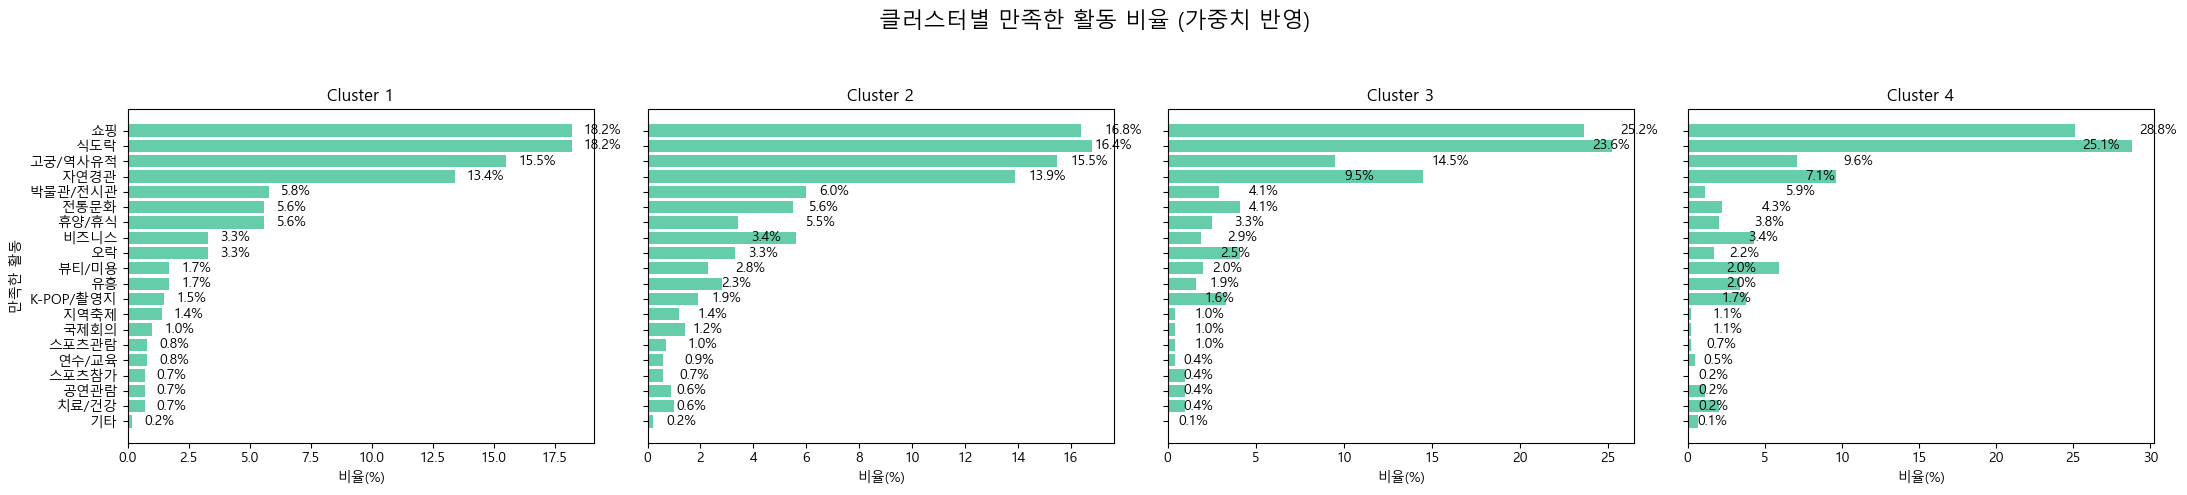

In [68]:
fig, axes = plt.subplots(1, len(clusters), figsize=(22, 5), sharey=True)

for i, (cluster_name, country_codes) in enumerate(clusters.items()):
    subset = df[df["D_NAT"].isin(country_codes)]
    melted = subset[satisfaction_cols + ["weight"]].melt(id_vars="weight", value_name="activity").dropna()

    counts = melted.groupby("activity")["weight"].sum()
    rates = (counts / counts.sum() * 100).round(1)
    rates.index = rates.index.map(activity_map)
    rates = rates.sort_values()

    ax = axes[i]
    ax.barh(rates.index, rates.values, color="mediumaquamarine")
    for j, val in enumerate(rates.values):
        ax.text(val + 0.5, j, f"{val:.1f}%", va="center")
    
    ax.set_title(cluster_name)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("만족한 활동")
    else:
        ax.set_ylabel("")

plt.suptitle("클러스터별 만족한 활동 비율 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


만족도 높은 활동은 실제 소비지출과 연결되는가를 이후 세부 분석할 예정

## 20. 가장 좋았던 곳

이거 숫자코드 어떻게 해석하는지 어디에 나와있지..?

### (1) 클러스터1 국가별

### (2) 클러스터별

## 21. 방문 지역

In [73]:
# 방문지역 변수 (다중응답)
visit_area_cols = [f"Q9_2a{str(i).zfill(2)}" for i in range(1, 18)]

# 지역 코드 매핑
area_map = {
    1: "서울", 2: "경기", 3: "인천", 4: "강원", 5: "대전", 6: "충북", 7: "충남", 8: "세종",
    9: "경북", 10: "경남", 11: "대구", 12: "울산", 13: "부산", 14: "광주", 15: "전북",
    16: "전남", 17: "제주"
}


### (1) 클러스터1 국가별

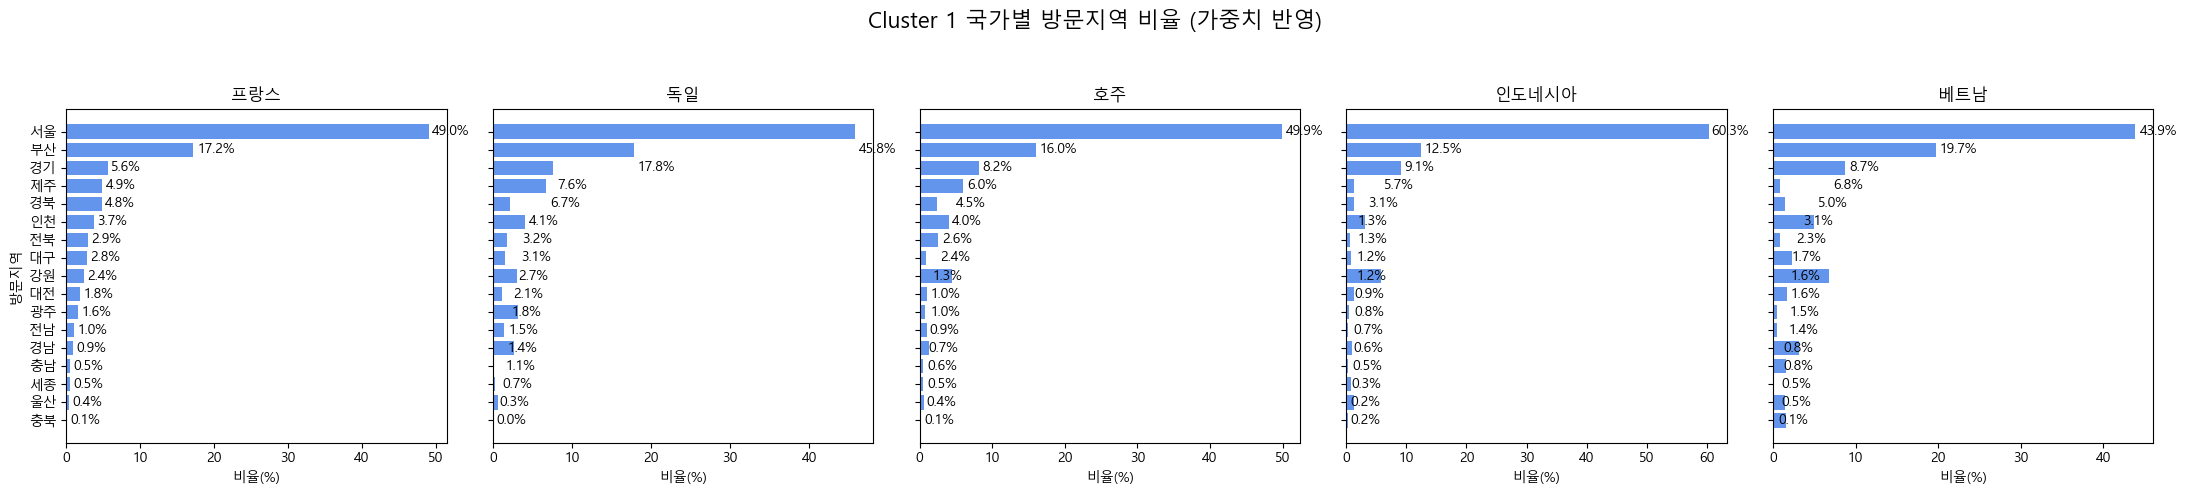

In [77]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(cluster1_codes), figsize=(22, 5), sharey=True)

for i, (country, code) in enumerate(cluster1_codes.items()):
    subset = df[df["D_NAT"] == code]
    melted = subset[visit_area_cols + ["weight"]].melt(id_vars="weight", value_name="area").dropna()
    
    counts = melted.groupby("area")["weight"].sum()
    rates = (counts / counts.sum() * 100).round(1)
    rates.index = rates.index.map(area_map)
    rates = rates.sort_values()

    ax = axes[i]
    ax.barh(rates.index, rates.values, color="cornflowerblue")
    for j, val in enumerate(rates.values):
        ax.text(val + 0.5, j, f"{val:.1f}%", va="center")
    
    ax.set_title(country)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("방문지역")
    else:
        ax.set_ylabel("")

plt.suptitle("Cluster 1 국가별 방문지역 비율 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


### (2) 클러스터별

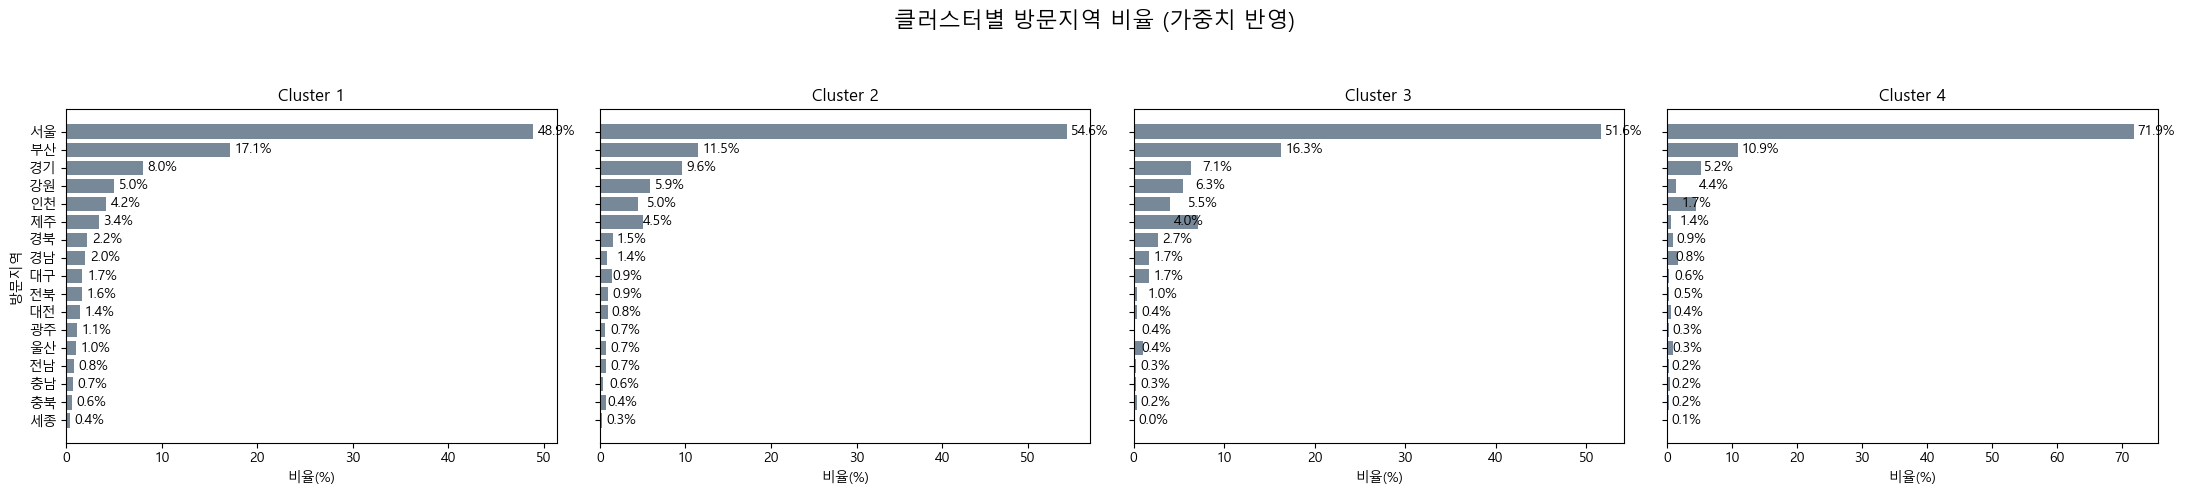

In [76]:
fig, axes = plt.subplots(1, len(clusters), figsize=(22, 5), sharey=True)

for i, (cluster_name, country_codes) in enumerate(clusters.items()):
    subset = df[df["D_NAT"].isin(country_codes)]
    melted = subset[visit_area_cols + ["weight"]].melt(id_vars="weight", value_name="area").dropna()
    
    counts = melted.groupby("area")["weight"].sum()
    rates = (counts / counts.sum() * 100).round(1)
    rates.index = rates.index.map(area_map)
    rates = rates.sort_values()

    ax = axes[i]
    ax.barh(rates.index, rates.values, color="lightslategray")
    for j, val in enumerate(rates.values):
        ax.text(val + 0.5, j, f"{val:.1f}%", va="center")
    
    ax.set_title(cluster_name)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("방문지역")
    else:
        ax.set_ylabel("")

plt.suptitle("클러스터별 방문지역 비율 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


## 22. 총 체재기간(카테고리)

In [87]:
# 체류기간 매핑 (6, 12 → 61일 이상으로 통합)
stay_map = {
    1: "1~3일", 2: "4~7일", 3: "8~10일",
    4: "11~30일", 5: "31~60일",
    6: "61일 이상", 12: "61일 이상"
}

# 정렬 순서
stay_order = ["1~3일", "4~7일", "8~10일", "11~30일", "31~60일", "61일 이상"]


### (1) 클러스터1 국가별

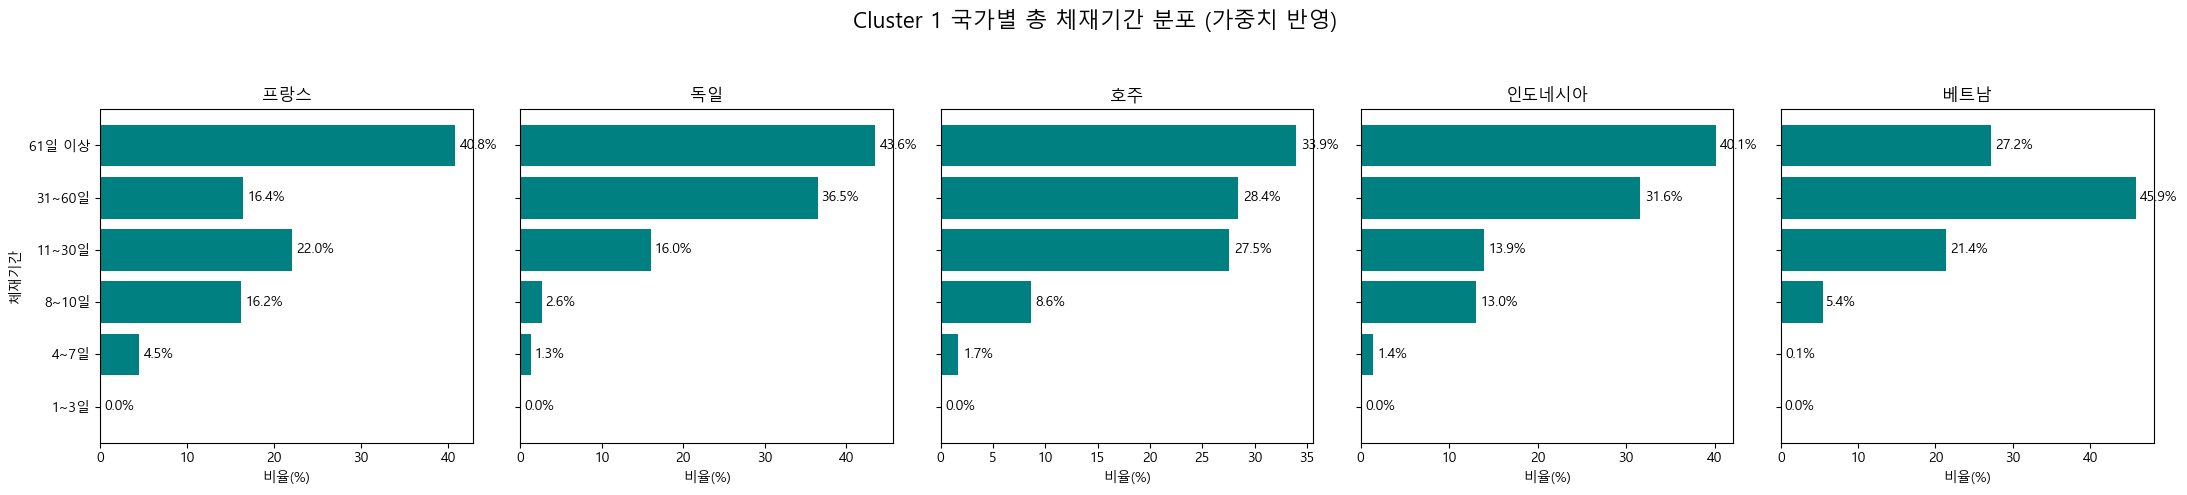

In [88]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(cluster1_codes), figsize=(22, 5), sharey=True)

for i, (country, code) in enumerate(cluster1_codes.items()):
    subset = df[df["D_NAT"] == code].copy()
    subset["체재기간"] = subset["R일HAP"].map(stay_map)
    
    weighted = subset.groupby("체재기간")["weight"].sum()
    percent = (weighted / weighted.sum() * 100).reindex(stay_order).fillna(0).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="teal")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")
    
    ax.set_title(country)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("체재기간")
    else:
        ax.set_ylabel("")

plt.suptitle("Cluster 1 국가별 총 체재기간 분포 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


### (2) 클러스터별

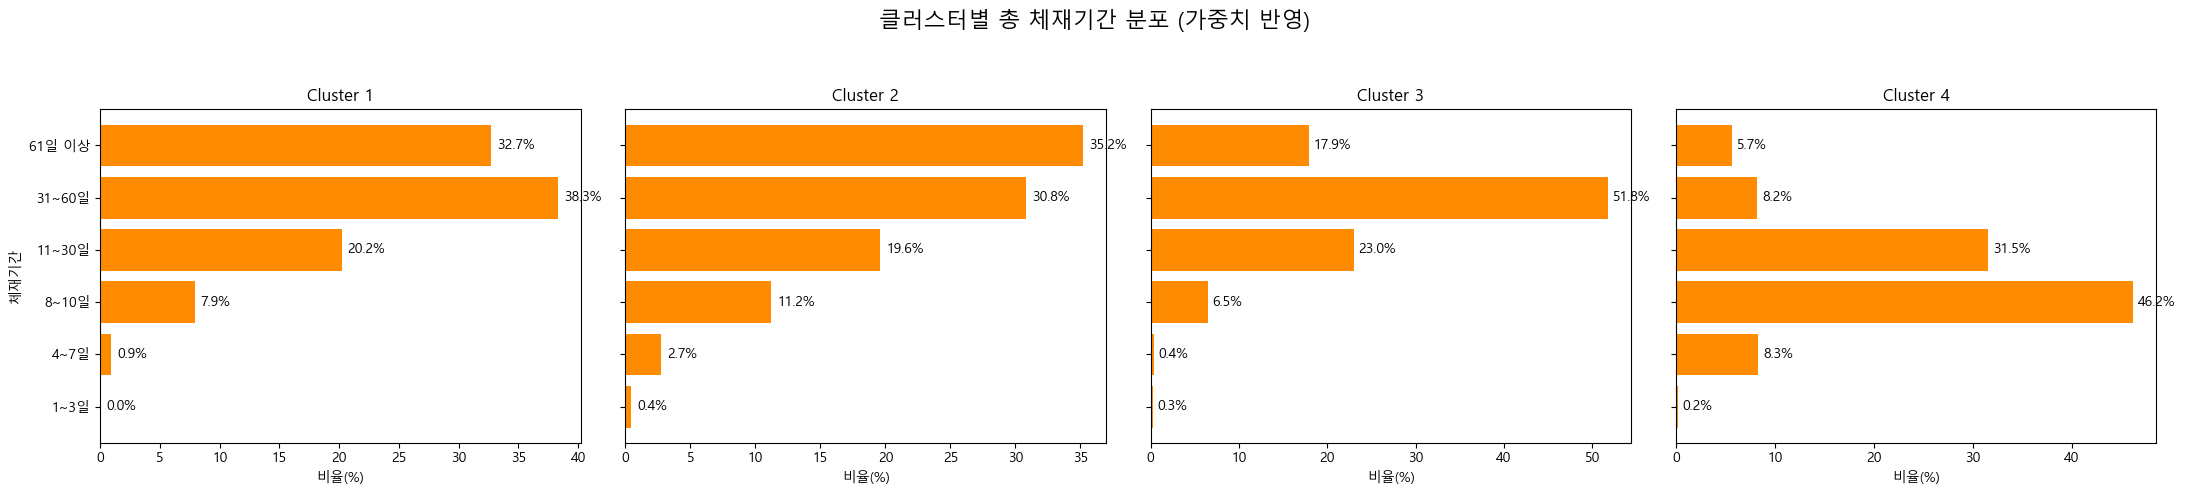

In [89]:
fig, axes = plt.subplots(1, len(clusters), figsize=(22, 5), sharey=True)

for i, (cluster_name, codes) in enumerate(clusters.items()):
    subset = df[df["D_NAT"].isin(codes)].copy()
    subset["체재기간"] = subset["R일HAP"].map(stay_map)

    weighted = subset.groupby("체재기간")["weight"].sum()
    percent = (weighted / weighted.sum() * 100).reindex(stay_order).fillna(0).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="darkorange")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")
    
    ax.set_title(cluster_name)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("체재기간")
    else:
        ax.set_ylabel("")

plt.suptitle("클러스터별 총 체재기간 분포 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


## 23. 주요 이용 숙박시설

### (1) 클러스터1 국가별

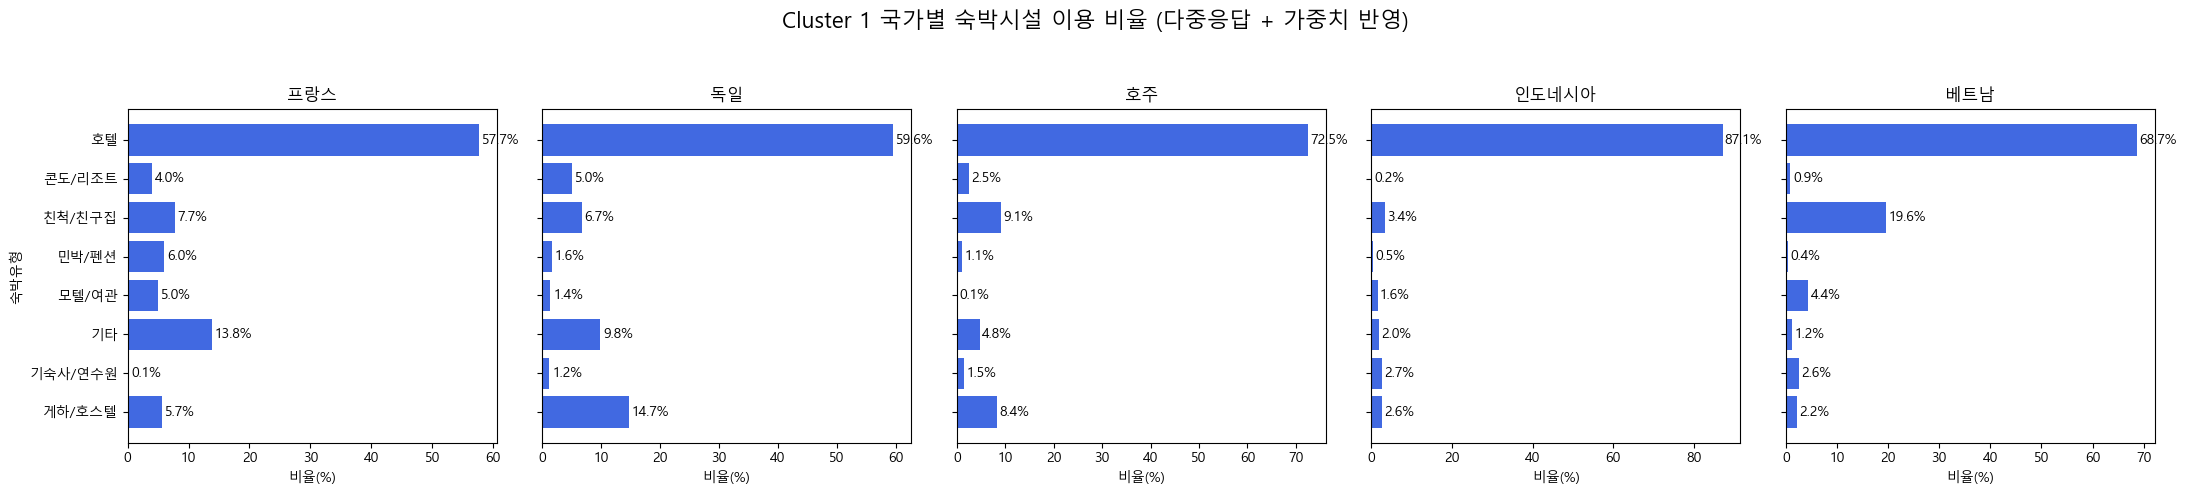

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

# 숙박유형 코드 → 이름 매핑
lodging_map = {
    1: "호텔", 2: "모텔/여관", 3: "콘도/리조트", 4: "게하/호스텔",
    5: "민박/펜션", 6: "기숙사/연수원", 7: "친척/친구집", 8: "기타", 9: "숙박 안함"
}
lodging_cols = [f"Q9_5A{i}" for i in range(1, 10)]

# 시각화 시작
fig, axes = plt.subplots(1, len(cluster1_codes), figsize=(22, 5), sharey=True)

for i, (country, code) in enumerate(cluster1_codes.items()):
    subset = df[df["D_NAT"] == code][lodging_cols + ["weight"]].copy()

    # 다중응답 펼치기
    melted = subset.melt(id_vars="weight", value_name="숙박코드")
    melted = melted.dropna()
    melted["숙박코드"] = melted["숙박코드"].astype(int)
    melted["숙박유형"] = melted["숙박코드"].map(lodging_map)

    # 비율 계산 (가중합)
    weighted = melted.groupby("숙박유형")["weight"].sum()
    percent = (weighted / weighted.sum() * 100).round(1)

    # 시각화
    ax = axes[i]
    ax.barh(percent.index, percent.values, color="royalblue")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(country)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("숙박유형")
    else:
        ax.set_ylabel("")

plt.suptitle("Cluster 1 국가별 숙박시설 이용 비율 (다중응답 + 가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


### (2) 클러스터별

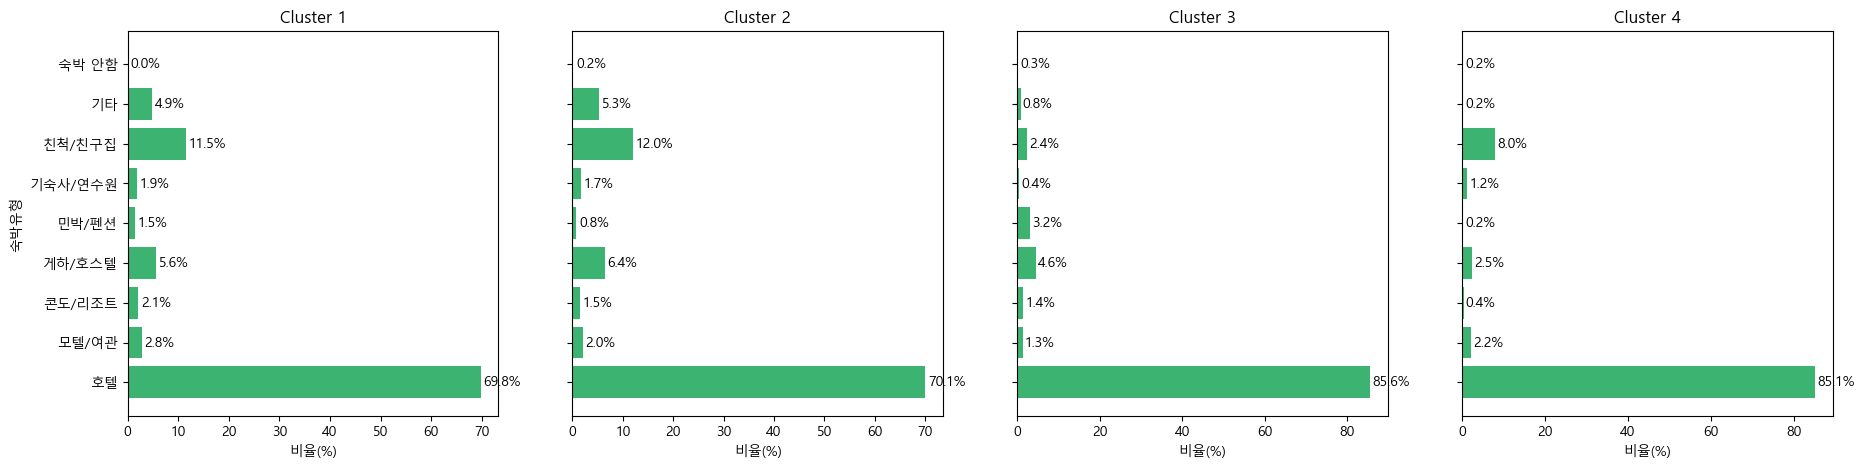

In [102]:
lodging_labels = ["호텔", "모텔/여관", "콘도/리조트", "게하/호스텔", 
                  "민박/펜션", "기숙사/연수원", "친척/친구집", "기타", "숙박 안함"]

fig, axes = plt.subplots(1, len(clusters), figsize=(22, 5), sharey=True)

for i, (cluster_name, codes) in enumerate(clusters.items()):
    subset = df[df["D_NAT"].isin(codes)][lodging_cols + ["weight"]].copy()
    melted = subset.melt(id_vars="weight", value_name="숙박코드").dropna()
    melted["숙박코드"] = melted["숙박코드"].astype(int)
    melted["숙박유형"] = melted["숙박코드"].map(lodging_map)

    weighted = melted.groupby("숙박유형")["weight"].sum()
    percent = (weighted / weighted.sum() * 100).round(1)
    percent = percent.reindex(lodging_labels).fillna(0)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="mediumseagreen")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")
    
    ax.set_title(cluster_name)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("숙박유형")
    else:
        ax.set_ylabel("")


## 24.  [국제교통비 제외] 1인 지출 경비(상하위 1% 대체, 카테고리)

In [104]:
# 변수명
spend_col = "C총액1인TOT_개별국제교통비제외2"

# 지출금액 구간 매핑
spend_map = {
    1: "≤$1,000", 2: "$1K~2K", 3: "$2K~3K", 4: "$3K~5K",
    5: "$5K~10K", 6: ">$10K", 98: "최대 초과"
}

# 시각화 순서 (값 기준 정렬)
spend_order = ["≤$1,000", "$1K~2K", "$2K~3K", "$3K~5K", "$5K~10K", ">$10K", "최대 초과"]


### (1) 클러스터1 국가별

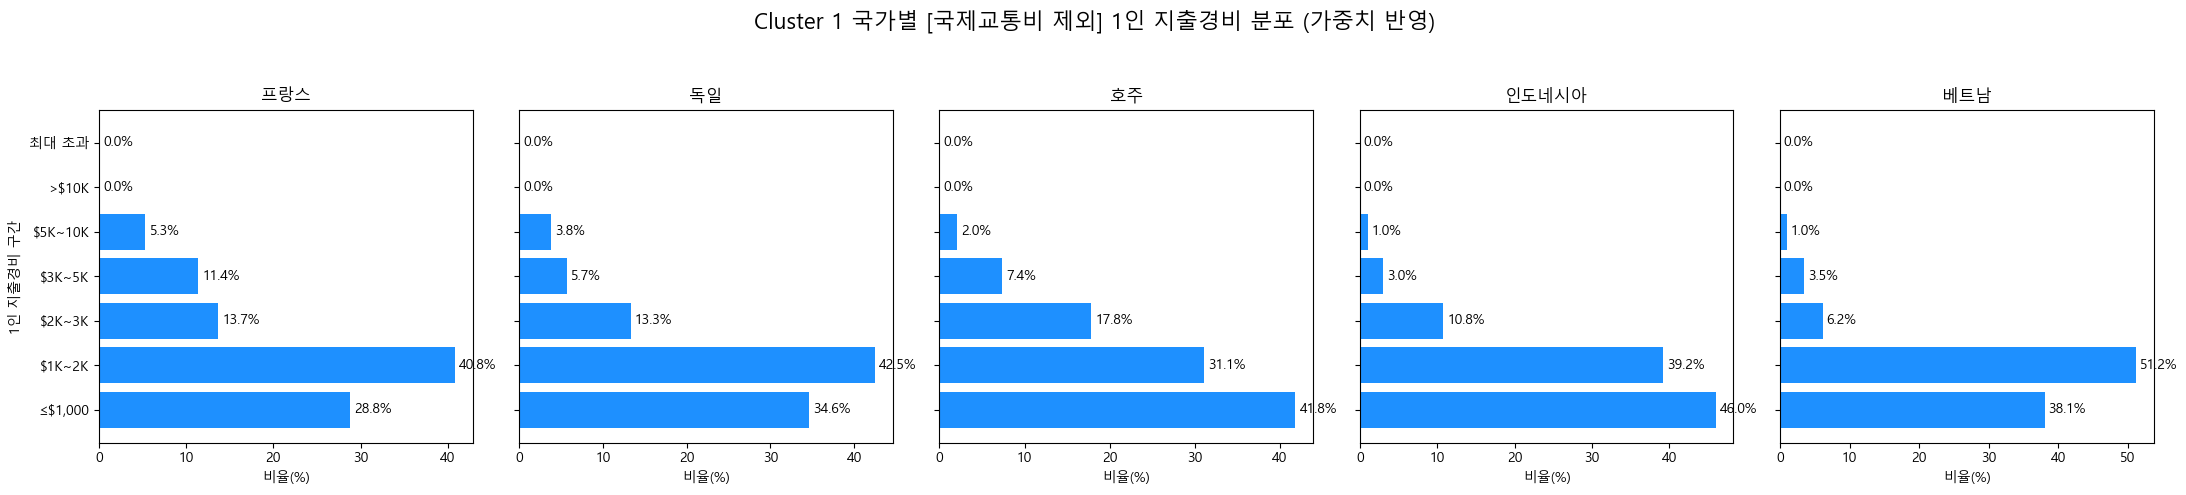

In [105]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(cluster1_codes), figsize=(22, 5), sharey=True)

for i, (country, code) in enumerate(cluster1_codes.items()):
    subset = df[df["D_NAT"] == code].copy()
    subset["지출구간"] = subset[spend_col].map(spend_map)

    grouped = subset.groupby("지출구간")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).reindex(spend_order).fillna(0).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="dodgerblue")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(country)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("1인 지출경비 구간")
    else:
        ax.set_ylabel("")

plt.suptitle("Cluster 1 국가별 [국제교통비 제외] 1인 지출경비 분포 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


### (2) 클러스터별

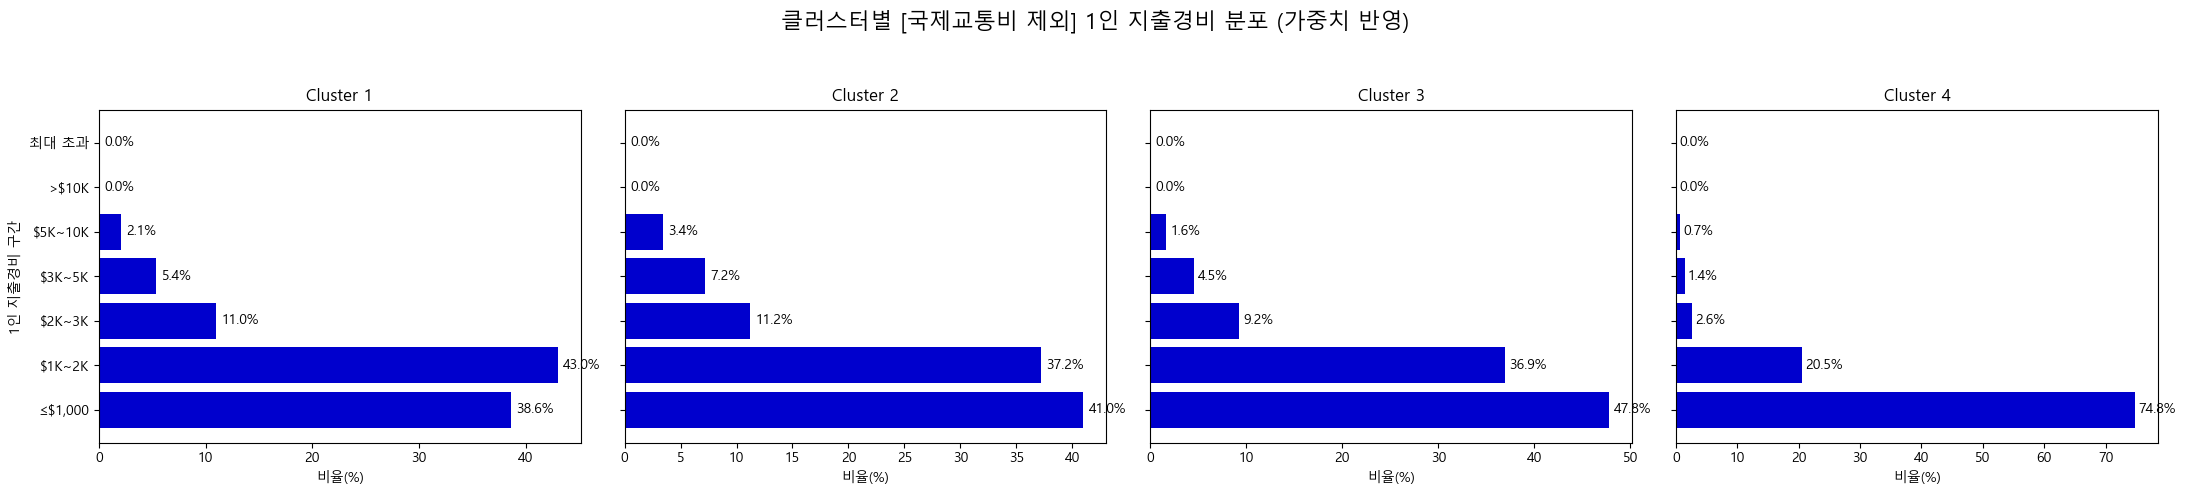

In [106]:
fig, axes = plt.subplots(1, len(clusters), figsize=(22, 5), sharey=True)

for i, (cluster_name, codes) in enumerate(clusters.items()):
    subset = df[df["D_NAT"].isin(codes)].copy()
    subset["지출구간"] = subset[spend_col].map(spend_map)

    grouped = subset.groupby("지출구간")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).reindex(spend_order).fillna(0).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="mediumblue")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(cluster_name)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("1인 지출경비 구간")
    else:
        ax.set_ylabel("")

plt.suptitle("클러스터별 [국제교통비 제외] 1인 지출경비 분포 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


## 25.  [국제교통비 제외] 1인 1일 지출경비(상하위 1% 대체, 61일 이상  결측, 카테고리)

In [107]:
# 변수명
daily_spend_col = "RDAY전체_개별국제교통비제외61"

# 구간 매핑
daily_spend_map = {
    1: "≤$50", 2: "$50~100", 3: "$100~300", 4: "$300~500", 5: ">$500"
}
daily_spend_order = ["≤$50", "$50~100", "$100~300", "$300~500", ">$500"]


### (1) 클러스터1 국가별

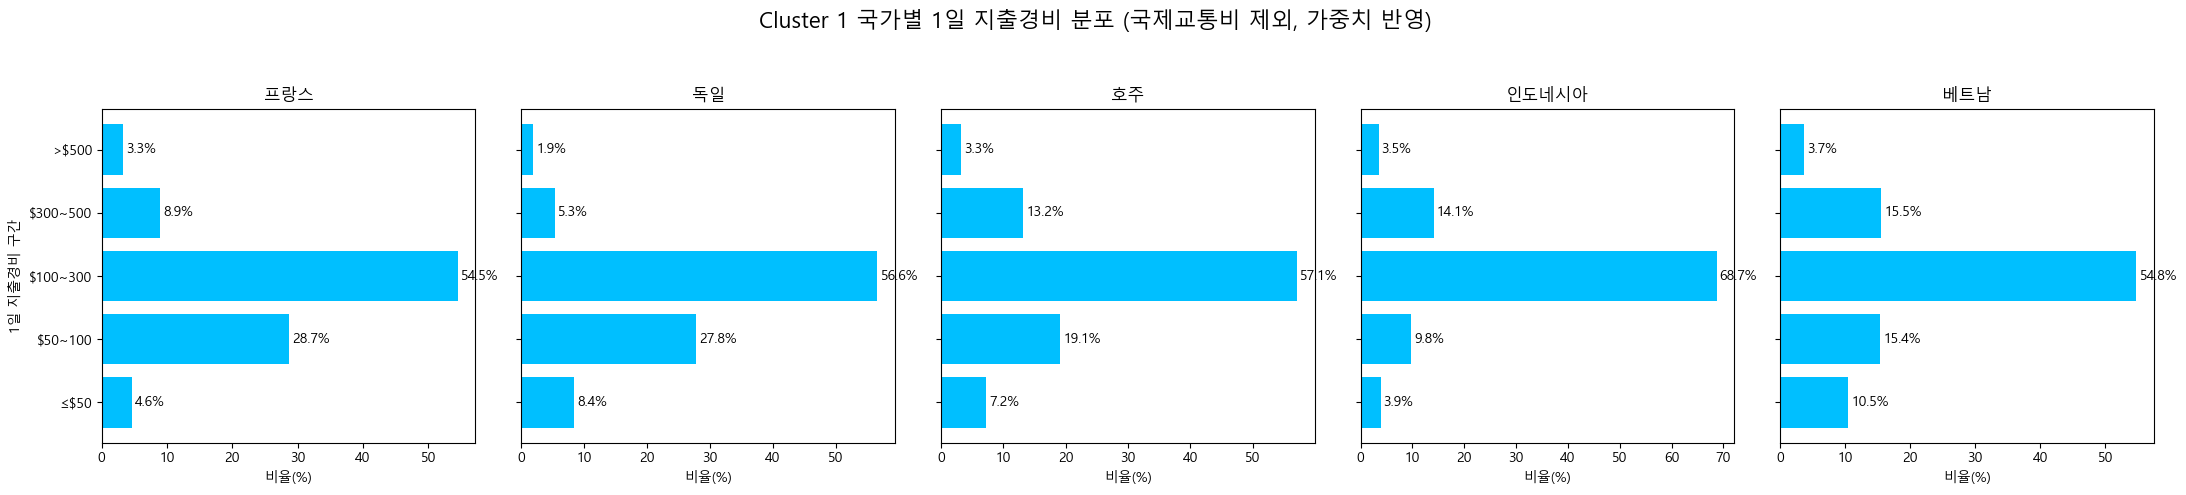

In [109]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(cluster1_codes), figsize=(22, 5), sharey=True)

for i, (country, code) in enumerate(cluster1_codes.items()):
    subset = df[df["D_NAT"] == code].copy()
    subset["1일지출"] = subset[daily_spend_col].map(daily_spend_map)

    grouped = subset.groupby("1일지출")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).reindex(daily_spend_order).fillna(0).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="deepskyblue")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(country)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("1일 지출경비 구간")
    else:
        ax.set_ylabel("")

plt.suptitle("Cluster 1 국가별 1일 지출경비 분포 (국제교통비 제외, 가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


### (2) 클러스터별

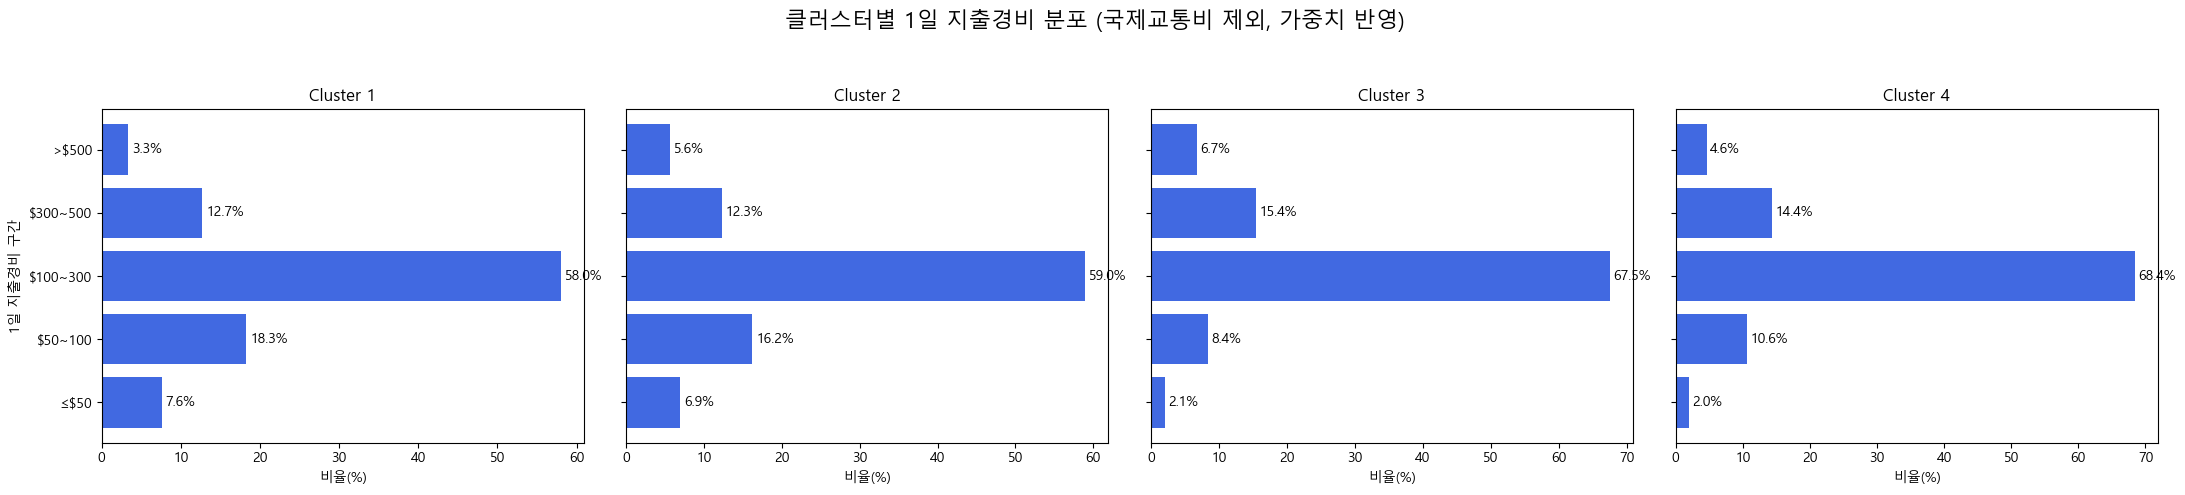

In [110]:
fig, axes = plt.subplots(1, len(clusters), figsize=(22, 5), sharey=True)

for i, (cluster_name, codes) in enumerate(clusters.items()):
    subset = df[df["D_NAT"].isin(codes)].copy()
    subset["1일지출"] = subset[daily_spend_col].map(daily_spend_map)

    grouped = subset.groupby("1일지출")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).reindex(daily_spend_order).fillna(0).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="royalblue")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(cluster_name)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("1일 지출경비 구간")
    else:
        ax.set_ylabel("")

plt.suptitle("클러스터별 1일 지출경비 분포 (국제교통비 제외, 가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


## 자세한 지출 경비 목록 이후 세부 분석 예정

## 26. 쇼핑 항목

In [111]:
shopping_cols = [f"Q10_2a{str(i).zfill(2)}" for i in range(1, 14)]

shopping_map = {
    1: "향수/화장품", 2: "식료품", 3: "의류", 4: "신발류", 5: "가방류",
    6: "보석/악세서리", 7: "인삼/한약재", 8: "주류", 9: "담배", 10: "전통민예품",
    11: "한류굿즈", 12: "전자제품", 13: "기타"
}


### (1) 클러스터1 국가별

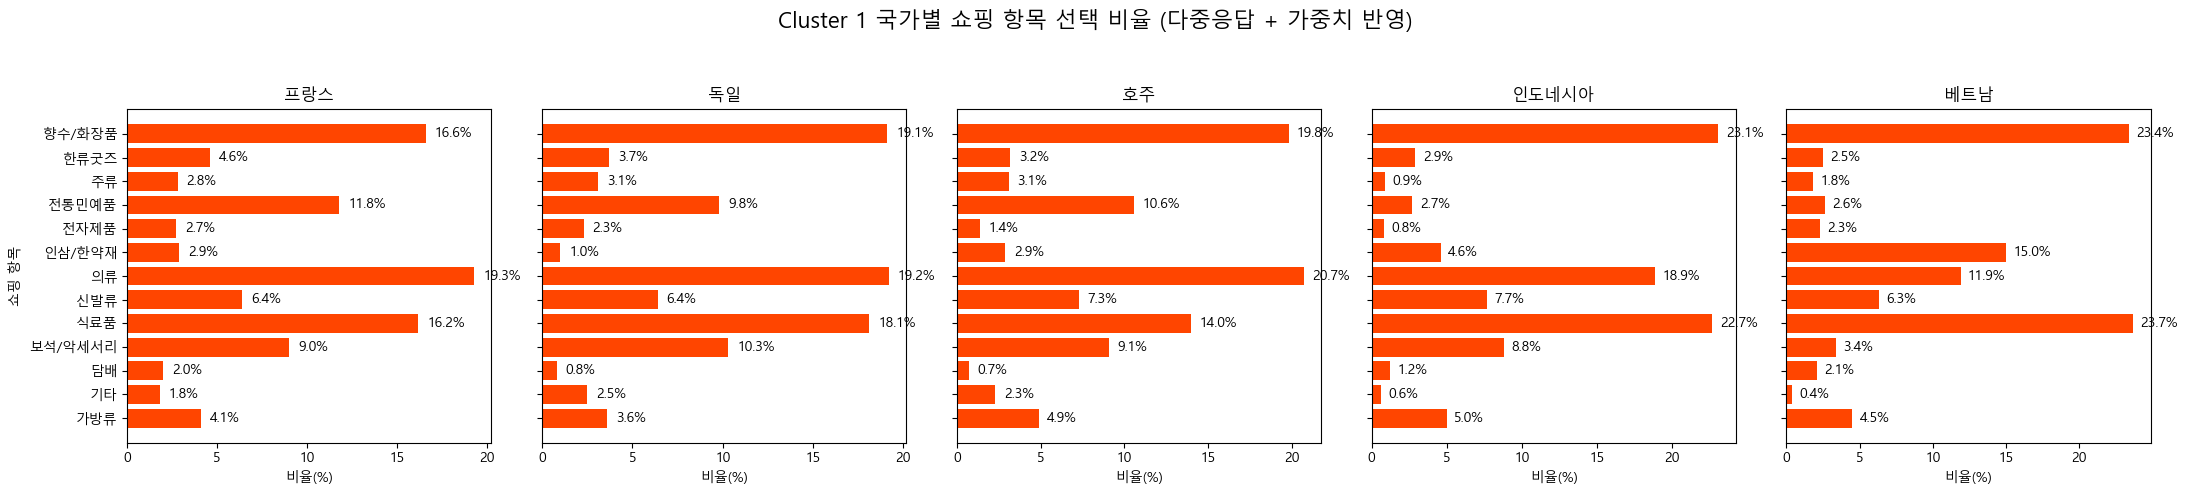

In [112]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(cluster1_codes), figsize=(22, 5), sharey=True)

for i, (country, code) in enumerate(cluster1_codes.items()):
    subset = df[df["D_NAT"] == code][shopping_cols + ["weight"]].copy()

    melted = subset.melt(id_vars="weight", value_name="쇼핑코드").dropna()
    melted["쇼핑코드"] = melted["쇼핑코드"].astype(int)
    melted["쇼핑항목"] = melted["쇼핑코드"].map(shopping_map)

    grouped = melted.groupby("쇼핑항목")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="orangered")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(country)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("쇼핑 항목")
    else:
        ax.set_ylabel("")

plt.suptitle("Cluster 1 국가별 쇼핑 항목 선택 비율 (다중응답 + 가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


### (2) 클러스터별

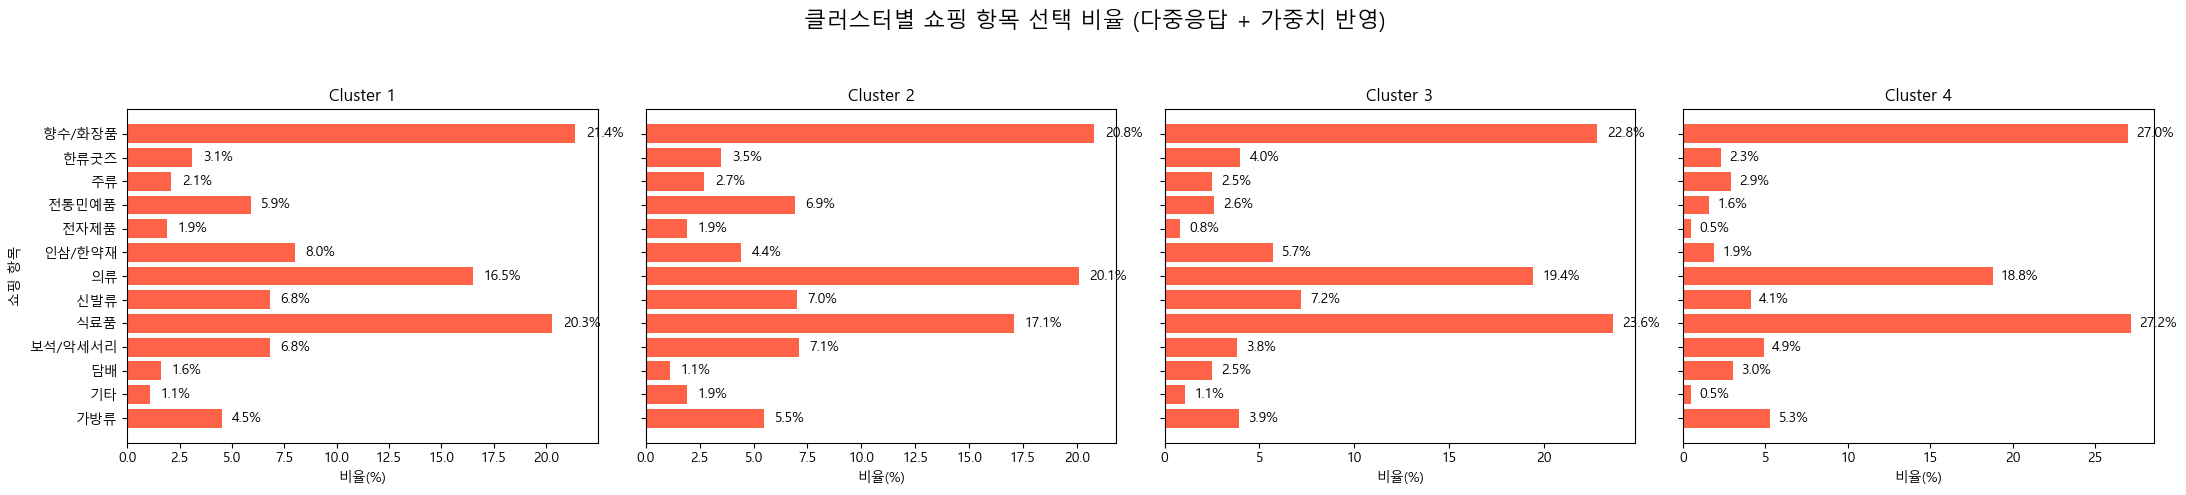

In [113]:
fig, axes = plt.subplots(1, len(clusters), figsize=(22, 5), sharey=True)

for i, (cluster_name, codes) in enumerate(clusters.items()):
    subset = df[df["D_NAT"].isin(codes)][shopping_cols + ["weight"]].copy()

    melted = subset.melt(id_vars="weight", value_name="쇼핑코드").dropna()
    melted["쇼핑코드"] = melted["쇼핑코드"].astype(int)
    melted["쇼핑항목"] = melted["쇼핑코드"].map(shopping_map)

    grouped = melted.groupby("쇼핑항목")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="tomato")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(cluster_name)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("쇼핑 항목")
    else:
        ax.set_ylabel("")

plt.suptitle("클러스터별 쇼핑 항목 선택 비율 (다중응답 + 가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


## 27. 쇼핑 장소

In [114]:
shopping_place_cols = ["Q10_3a1", "Q10_3a2", "Q10_3a3"]

shopping_place_map = {
    1: "공항 면세점", 2: "시내 면세점", 3: "로드샵", 4: "전통시장",
    5: "백화점", 6: "대형 쇼핑몰", 7: "대형마트", 8: "기타"
}


### (1) 클러스터1 국가별

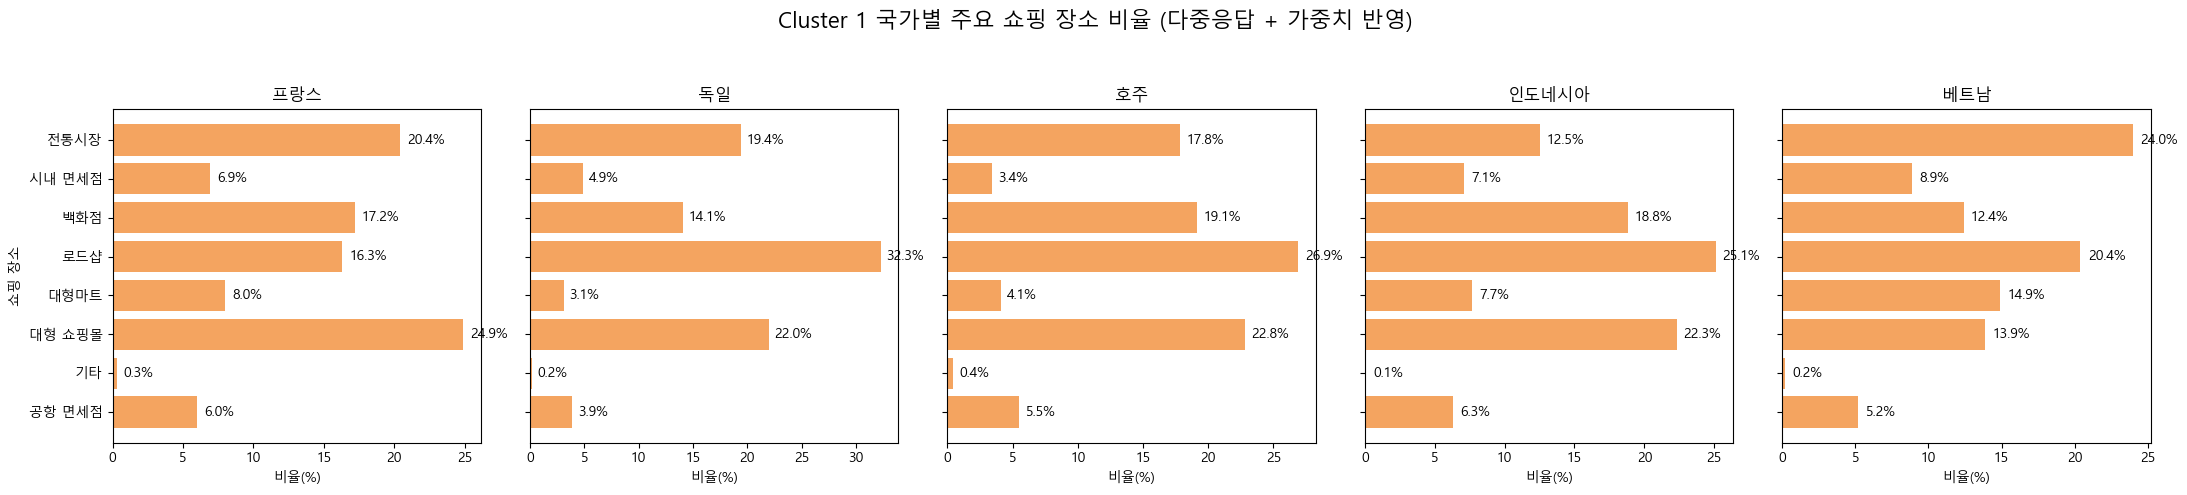

In [115]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(cluster1_codes), figsize=(22, 5), sharey=True)

for i, (country, code) in enumerate(cluster1_codes.items()):
    subset = df[df["D_NAT"] == code][shopping_place_cols + ["weight"]].copy()

    melted = subset.melt(id_vars="weight", value_name="쇼핑장소코드").dropna()
    melted["쇼핑장소코드"] = melted["쇼핑장소코드"].astype(int)
    melted["쇼핑장소"] = melted["쇼핑장소코드"].map(shopping_place_map)

    grouped = melted.groupby("쇼핑장소")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="sandybrown")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(country)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("쇼핑 장소")
    else:
        ax.set_ylabel("")

plt.suptitle("Cluster 1 국가별 주요 쇼핑 장소 비율 (다중응답 + 가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


### (2) 클러스터별

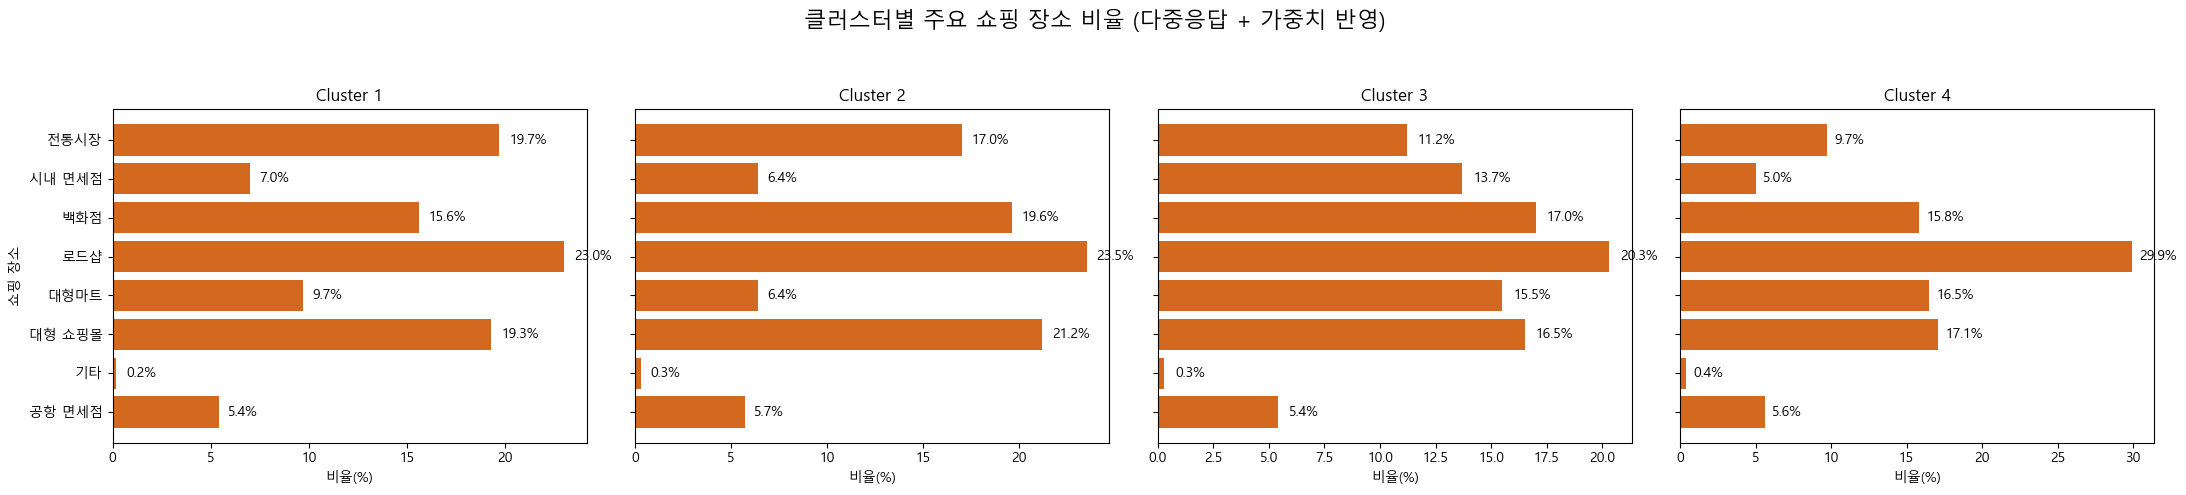

In [116]:
fig, axes = plt.subplots(1, len(clusters), figsize=(22, 5), sharey=True)

for i, (cluster_name, codes) in enumerate(clusters.items()):
    subset = df[df["D_NAT"].isin(codes)][shopping_place_cols + ["weight"]].copy()

    melted = subset.melt(id_vars="weight", value_name="쇼핑장소코드").dropna()
    melted["쇼핑장소코드"] = melted["쇼핑장소코드"].astype(int)
    melted["쇼핑장소"] = melted["쇼핑장소코드"].map(shopping_place_map)

    grouped = melted.groupby("쇼핑장소")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="chocolate")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(cluster_name)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("쇼핑 장소")
    else:
        ax.set_ylabel("")

plt.suptitle("클러스터별 주요 쇼핑 장소 비율 (다중응답 + 가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


## 28. 전반적 만족도

In [117]:
satisfaction_col = "Q11"

satisfaction_map = {
    1: "매우 불만족",
    2: "불만족",
    3: "보통",
    4: "만족",
    5: "매우 만족"
}

satisfaction_order = ["매우 불만족", "불만족", "보통", "만족", "매우 만족"]


### (1) 클러스터1 국가별

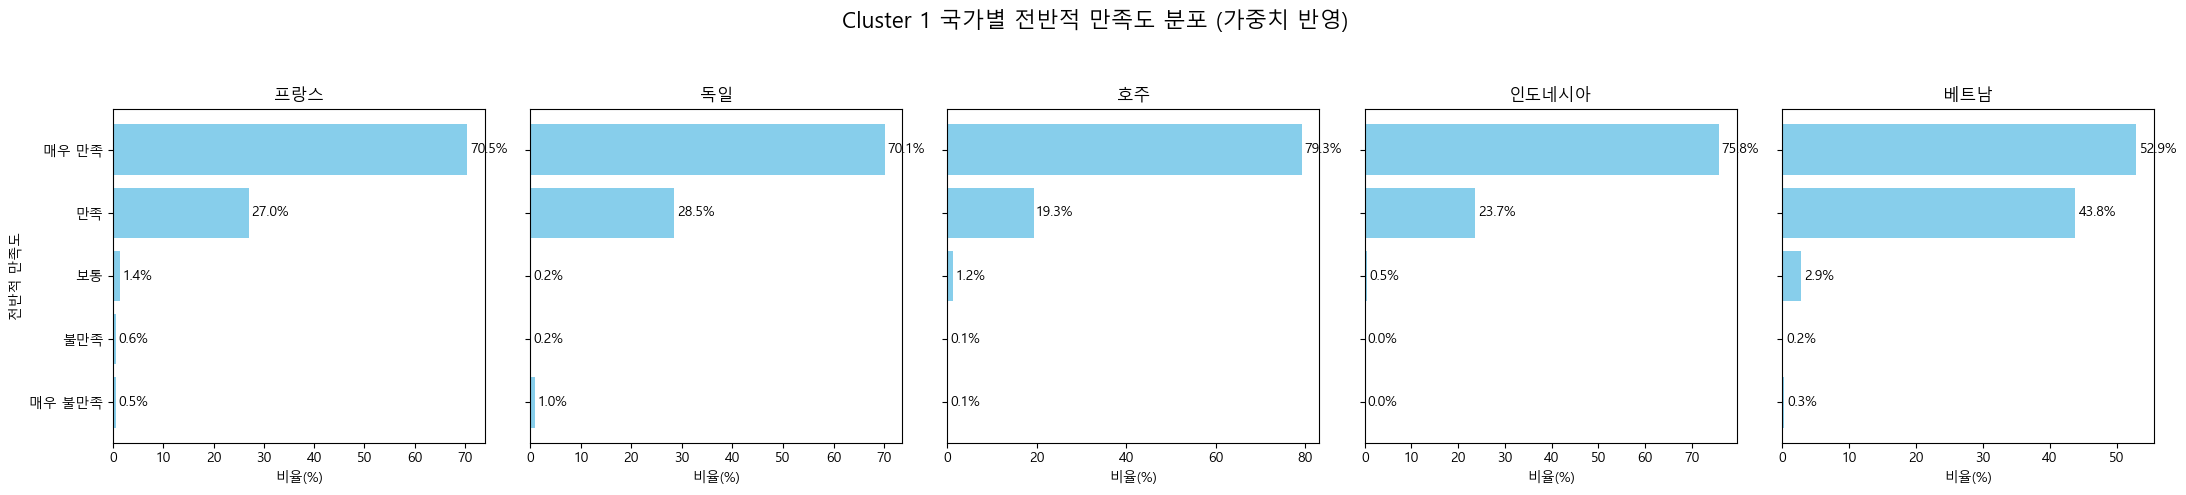

In [119]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(cluster1_codes), figsize=(22, 5), sharey=True)

for i, (country, code) in enumerate(cluster1_codes.items()):
    subset = df[df["D_NAT"] == code].copy()
    subset["만족도"] = subset[satisfaction_col].map(satisfaction_map)

    grouped = subset.groupby("만족도")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).reindex(satisfaction_order).fillna(0).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="skyblue")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(country)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("전반적 만족도")
    else:
        ax.set_ylabel("")

plt.suptitle("Cluster 1 국가별 전반적 만족도 분포 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


### (2) 클러스터별

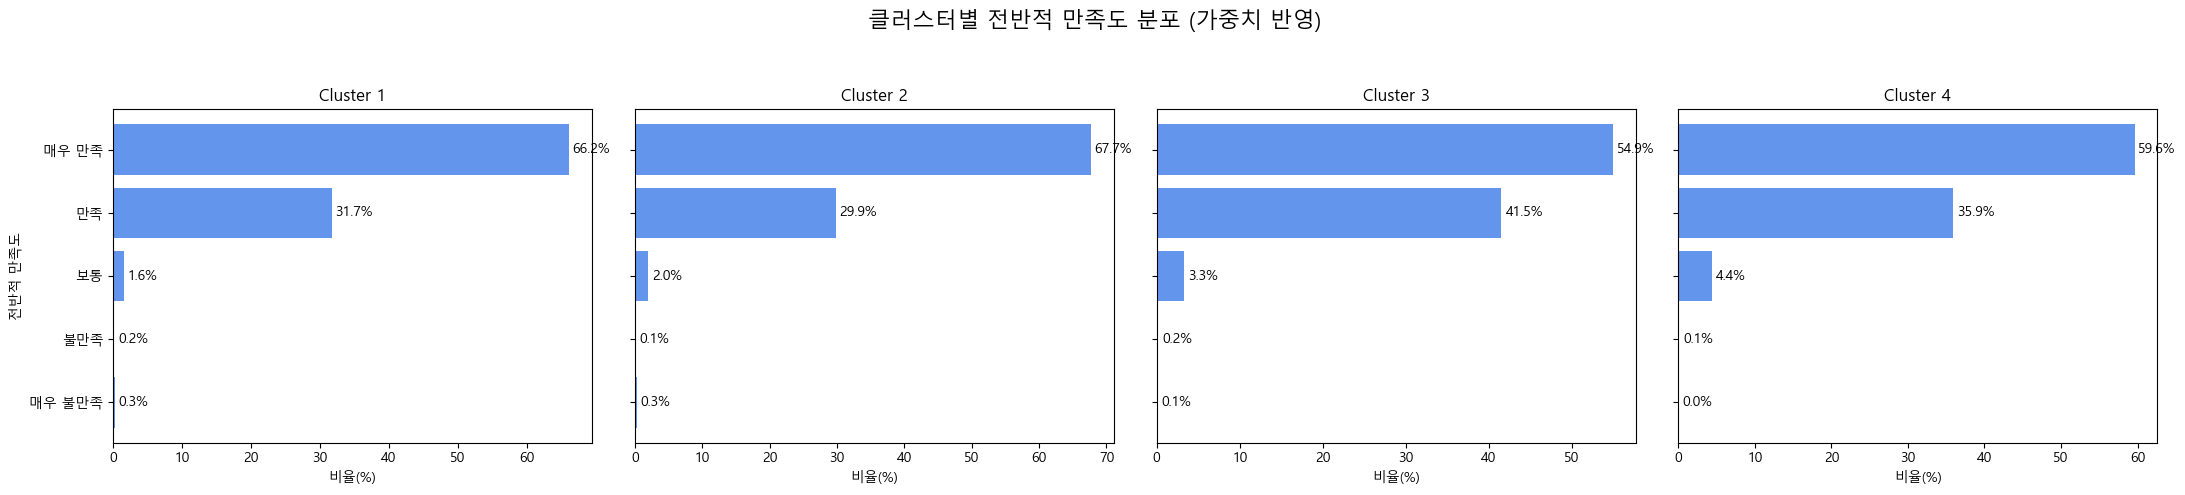

In [120]:
fig, axes = plt.subplots(1, len(clusters), figsize=(22, 5), sharey=True)

for i, (cluster_name, codes) in enumerate(clusters.items()):
    subset = df[df["D_NAT"].isin(codes)].copy()
    subset["만족도"] = subset[satisfaction_col].map(satisfaction_map)

    grouped = subset.groupby("만족도")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).reindex(satisfaction_order).fillna(0).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="cornflowerblue")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(cluster_name)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("전반적 만족도")
    else:
        ax.set_ylabel("")

plt.suptitle("클러스터별 전반적 만족도 분포 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


## 29. 타인 추천 의향

In [121]:
recommend_col = "Q14"

recommend_map = {
    1: "전혀 그렇지 않다",
    2: "별로 그렇지 않다",
    3: "보통",
    4: "대체로 그렇다",
    5: "매우 그렇다"
}

recommend_order = [
    "전혀 그렇지 않다", "별로 그렇지 않다", "보통", "대체로 그렇다", "매우 그렇다"
]


### (1) 클러스터1 국가별

In [122]:
recommend_col = "Q14"

recommend_map = {
    1: "전혀 그렇지 않다",
    2: "별로 그렇지 않다",
    3: "보통",
    4: "대체로 그렇다",
    5: "매우 그렇다"
}

recommend_order = [
    "전혀 그렇지 않다", "별로 그렇지 않다", "보통", "대체로 그렇다", "매우 그렇다"
]


### (2) 클러스터별

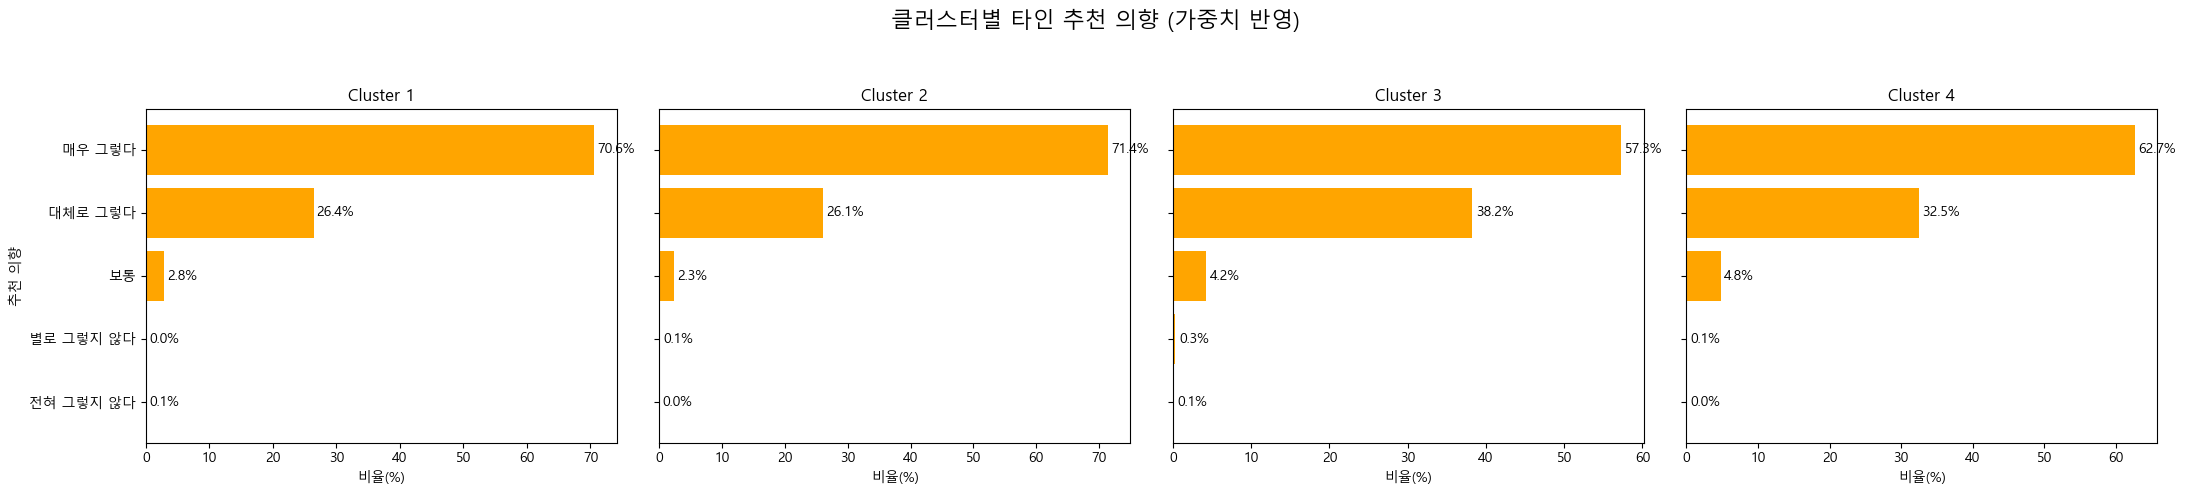

In [123]:
fig, axes = plt.subplots(1, len(clusters), figsize=(22, 5), sharey=True)

for i, (cluster_name, codes) in enumerate(clusters.items()):
    subset = df[df["D_NAT"].isin(codes)].copy()
    subset["추천의향"] = subset[recommend_col].map(recommend_map)

    grouped = subset.groupby("추천의향")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).reindex(recommend_order).fillna(0).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="orange")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(cluster_name)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("추천 의향")
    else:
        ax.set_ylabel("")

plt.suptitle("클러스터별 타인 추천 의향 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


## 30. 성별

In [124]:
sex_col = "D_SEX"

sex_map = {
    1: "남성",
    2: "여성"
}


### (1) 클러스터1 국가별

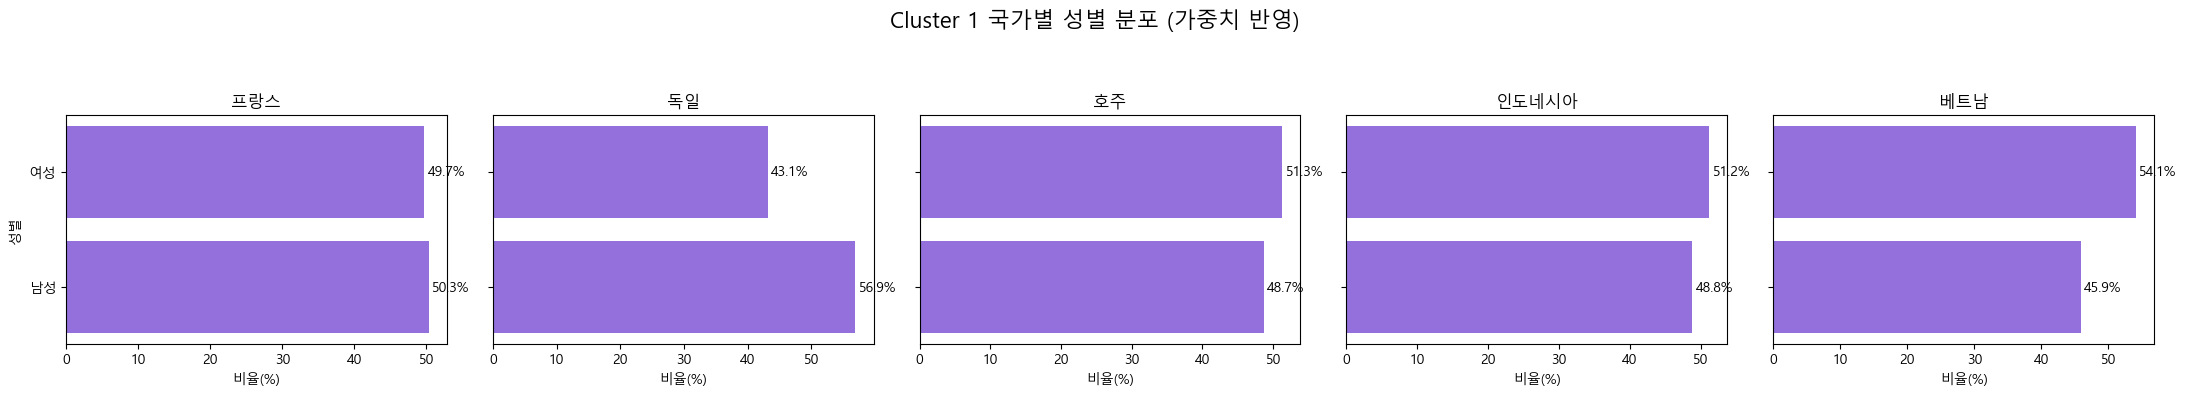

In [125]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(cluster1_codes), figsize=(22, 4), sharey=True)

for i, (country, code) in enumerate(cluster1_codes.items()):
    subset = df[df["D_NAT"] == code].copy()
    subset["성별"] = subset[sex_col].map(sex_map)

    grouped = subset.groupby("성별")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="mediumpurple")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(country)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("성별")
    else:
        ax.set_ylabel("")

plt.suptitle("Cluster 1 국가별 성별 분포 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


### (2) 클러스터별

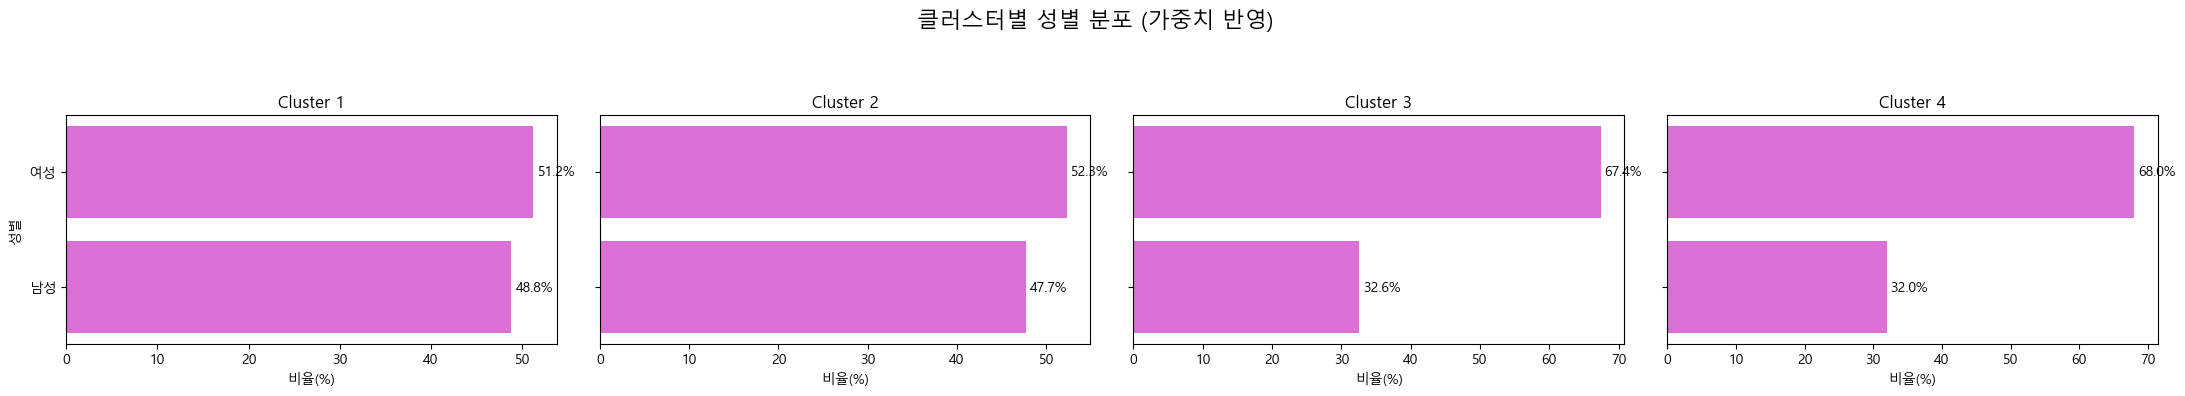

In [126]:
fig, axes = plt.subplots(1, len(clusters), figsize=(22, 4), sharey=True)

for i, (cluster_name, codes) in enumerate(clusters.items()):
    subset = df[df["D_NAT"].isin(codes)].copy()
    subset["성별"] = subset[sex_col].map(sex_map)

    grouped = subset.groupby("성별")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="orchid")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(cluster_name)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("성별")
    else:
        ax.set_ylabel("")

plt.suptitle("클러스터별 성별 분포 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


## 31. 연령별

In [127]:
age_col = "D_AGE"

age_map = {
    1: "15~19세", 2: "20대", 3: "30대", 4: "40대", 5: "50대", 6: "60대+"
}

age_order = ["15~19세", "20대", "30대", "40대", "50대", "60대+"]


### (1) 클러스터1 국가별

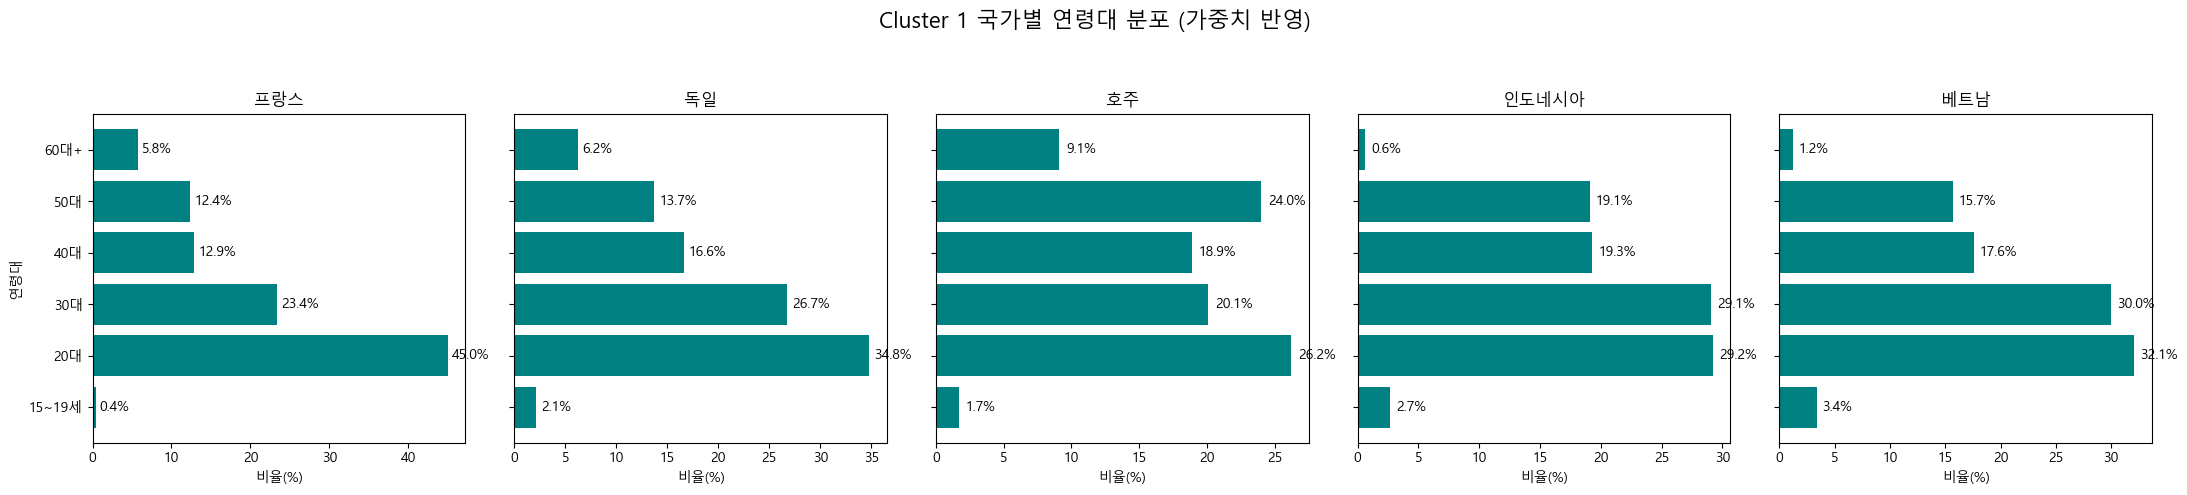

In [128]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(cluster1_codes), figsize=(22, 5), sharey=True)

for i, (country, code) in enumerate(cluster1_codes.items()):
    subset = df[df["D_NAT"] == code].copy()
    subset["연령대"] = subset[age_col].map(age_map)

    grouped = subset.groupby("연령대")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).reindex(age_order).fillna(0).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="teal")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(country)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("연령대")
    else:
        ax.set_ylabel("")

plt.suptitle("Cluster 1 국가별 연령대 분포 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


### (2) 클러스터별

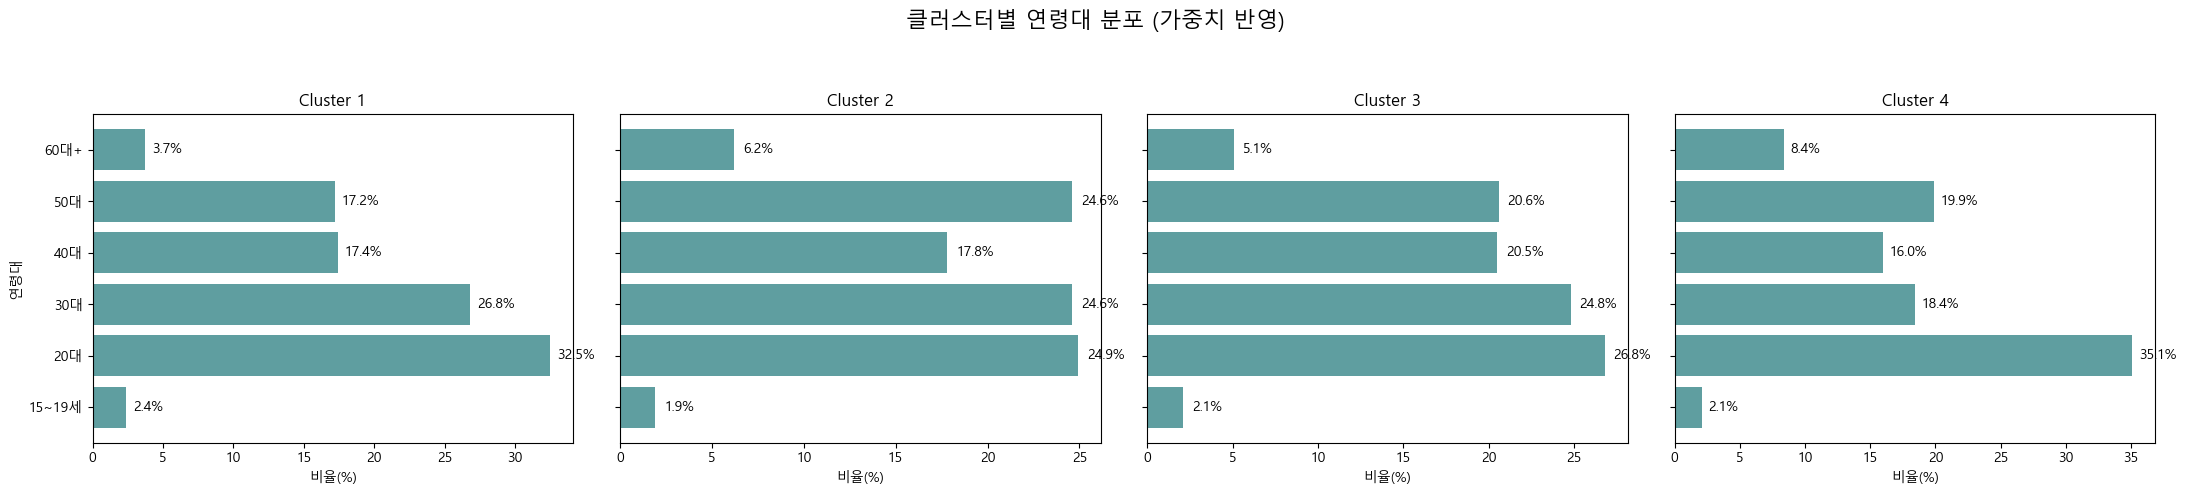

In [129]:
fig, axes = plt.subplots(1, len(clusters), figsize=(22, 5), sharey=True)

for i, (cluster_name, codes) in enumerate(clusters.items()):
    subset = df[df["D_NAT"].isin(codes)].copy()
    subset["연령대"] = subset[age_col].map(age_map)

    grouped = subset.groupby("연령대")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).reindex(age_order).fillna(0).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="cadetblue")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(cluster_name)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("연령대")
    else:
        ax.set_ylabel("")

plt.suptitle("클러스터별 연령대 분포 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


## 32. 재방문 의사

In [130]:
revisit_col = "Q13"

revisit_map = {
    1: "전혀 그렇지 않다",
    2: "별로 그렇지 않다",
    3: "보통",
    4: "대체로 그렇다",
    5: "매우 그렇다"
}

revisit_order = [
    "전혀 그렇지 않다", "별로 그렇지 않다", "보통", "대체로 그렇다", "매우 그렇다"
]


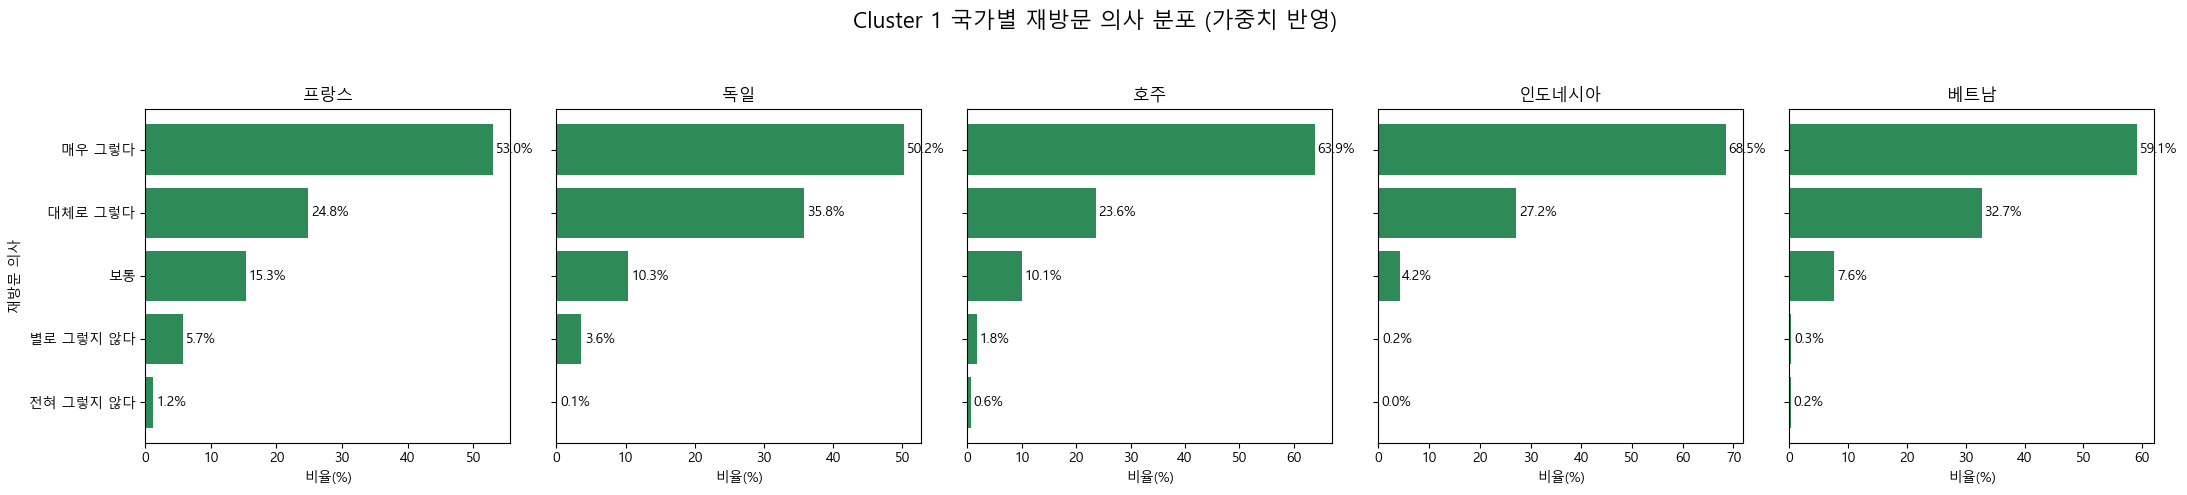

In [131]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(cluster1_codes), figsize=(22, 5), sharey=True)

for i, (country, code) in enumerate(cluster1_codes.items()):
    subset = df[df["D_NAT"] == code].copy()
    subset["재방문의향"] = subset[revisit_col].map(revisit_map)

    grouped = subset.groupby("재방문의향")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).reindex(revisit_order).fillna(0).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="seagreen")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(country)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("재방문 의사")
    else:
        ax.set_ylabel("")

plt.suptitle("Cluster 1 국가별 재방문 의사 분포 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


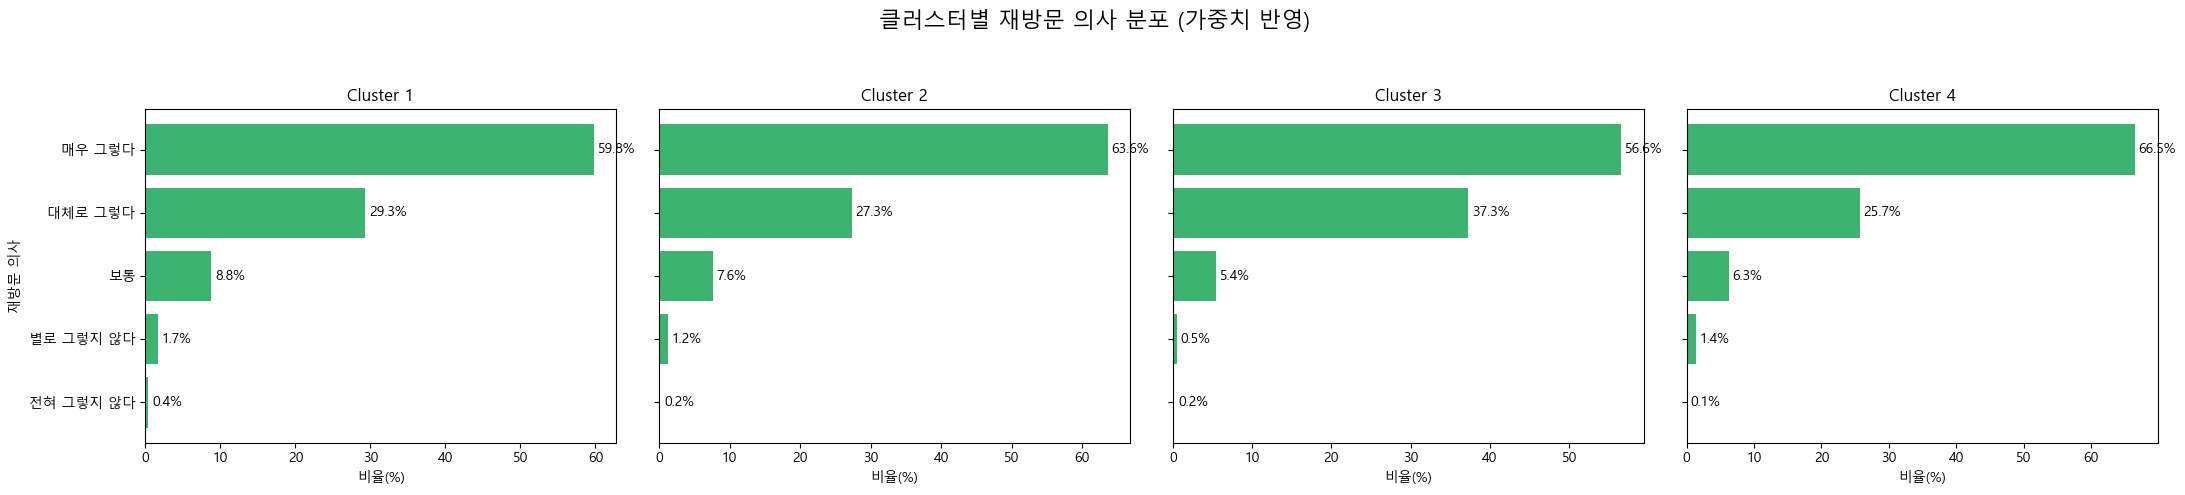

In [132]:
fig, axes = plt.subplots(1, len(clusters), figsize=(22, 5), sharey=True)

for i, (cluster_name, codes) in enumerate(clusters.items()):
    subset = df[df["D_NAT"].isin(codes)].copy()
    subset["재방문의향"] = subset[revisit_col].map(revisit_map)

    grouped = subset.groupby("재방문의향")["weight"].sum()
    percent = (grouped / grouped.sum() * 100).reindex(revisit_order).fillna(0).round(1)

    ax = axes[i]
    ax.barh(percent.index, percent.values, color="mediumseagreen")
    for j, val in enumerate(percent.values):
        ax.text(val + 0.5, j, f"{val}%", va="center")

    ax.set_title(cluster_name)
    ax.set_xlabel("비율(%)")
    if i == 0:
        ax.set_ylabel("재방문 의사")
    else:
        ax.set_ylabel("")

plt.suptitle("클러스터별 재방문 의사 분포 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()
